# Обучение моделей бустинга на числовых фичах

In [5]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import numpy as np
from joblib import dump

In [6]:
data = pd.read_csv(
    '../data/processed/numerical_train.csv',
    index_col = 'pair_id'
)

In [7]:
X = data.drop(['is_duplicate'], axis = 1)
y = data.is_duplicate

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 666,
    stratify = y,
    test_size = 0.2
)

## Catboost

In [79]:
catboost_model = CatBoostClassifier(thread_count = 3)

In [80]:
catboost_model.grid_search(
    X = X_train,
    y = y_train,
    cv = 3,
    verbose = 2,
    param_grid = {
        'eta': np.arange(0.1,0.5,0.1),
        'iterations': range(500,2500,500)
    }
)

0:	learn: 0.4414650	test: 0.4415767	best: 0.4415767 (0)	total: 50ms	remaining: 25s
1:	learn: 0.2840506	test: 0.2843936	best: 0.2843936 (1)	total: 94.3ms	remaining: 23.5s
2:	learn: 0.1916082	test: 0.1921038	best: 0.1921038 (2)	total: 144ms	remaining: 23.9s
3:	learn: 0.1354724	test: 0.1360673	best: 0.1360673 (3)	total: 186ms	remaining: 23s
4:	learn: 0.1000080	test: 0.1006329	best: 0.1006329 (4)	total: 227ms	remaining: 22.5s
5:	learn: 0.0774768	test: 0.0780690	best: 0.0780690 (5)	total: 278ms	remaining: 22.9s
6:	learn: 0.0629380	test: 0.0634874	best: 0.0634874 (6)	total: 334ms	remaining: 23.5s
7:	learn: 0.0526645	test: 0.0532078	best: 0.0532078 (7)	total: 391ms	remaining: 24.1s
8:	learn: 0.0457657	test: 0.0462924	best: 0.0462924 (8)	total: 447ms	remaining: 24.4s
9:	learn: 0.0410673	test: 0.0415929	best: 0.0415929 (9)	total: 497ms	remaining: 24.4s
10:	learn: 0.0373208	test: 0.0378485	best: 0.0378485 (10)	total: 554ms	remaining: 24.6s
11:	learn: 0.0351116	test: 0.0356384	best: 0.0356384 (11

95:	learn: 0.0216703	test: 0.0236713	best: 0.0236713 (95)	total: 4.75s	remaining: 20s
96:	learn: 0.0216594	test: 0.0236678	best: 0.0236678 (96)	total: 4.81s	remaining: 20s
97:	learn: 0.0216444	test: 0.0236679	best: 0.0236678 (96)	total: 4.85s	remaining: 19.9s
98:	learn: 0.0216323	test: 0.0236625	best: 0.0236625 (98)	total: 4.89s	remaining: 19.8s
99:	learn: 0.0216138	test: 0.0236605	best: 0.0236605 (99)	total: 4.94s	remaining: 19.8s
100:	learn: 0.0216035	test: 0.0236644	best: 0.0236605 (99)	total: 4.98s	remaining: 19.7s
101:	learn: 0.0215650	test: 0.0236233	best: 0.0236233 (101)	total: 5.03s	remaining: 19.6s
102:	learn: 0.0215383	test: 0.0236105	best: 0.0236105 (102)	total: 5.07s	remaining: 19.5s
103:	learn: 0.0215102	test: 0.0236044	best: 0.0236044 (103)	total: 5.11s	remaining: 19.5s
104:	learn: 0.0214922	test: 0.0235862	best: 0.0235862 (104)	total: 5.16s	remaining: 19.4s
105:	learn: 0.0214577	test: 0.0235589	best: 0.0235589 (105)	total: 5.21s	remaining: 19.4s
106:	learn: 0.0213991	tes

188:	learn: 0.0196127	test: 0.0225676	best: 0.0225676 (188)	total: 9.5s	remaining: 15.6s
189:	learn: 0.0195848	test: 0.0225567	best: 0.0225567 (189)	total: 9.56s	remaining: 15.6s
190:	learn: 0.0195689	test: 0.0225537	best: 0.0225537 (190)	total: 9.61s	remaining: 15.6s
191:	learn: 0.0195627	test: 0.0225532	best: 0.0225532 (191)	total: 9.66s	remaining: 15.5s
192:	learn: 0.0195490	test: 0.0225507	best: 0.0225507 (192)	total: 9.73s	remaining: 15.5s
193:	learn: 0.0195247	test: 0.0225356	best: 0.0225356 (193)	total: 9.8s	remaining: 15.5s
194:	learn: 0.0194951	test: 0.0225156	best: 0.0225156 (194)	total: 9.85s	remaining: 15.4s
195:	learn: 0.0194908	test: 0.0225106	best: 0.0225106 (195)	total: 9.9s	remaining: 15.4s
196:	learn: 0.0194494	test: 0.0224969	best: 0.0224969 (196)	total: 9.96s	remaining: 15.3s
197:	learn: 0.0194293	test: 0.0224872	best: 0.0224872 (197)	total: 10s	remaining: 15.3s
198:	learn: 0.0193952	test: 0.0224658	best: 0.0224658 (198)	total: 10.1s	remaining: 15.3s
199:	learn: 0.0

281:	learn: 0.0179046	test: 0.0217318	best: 0.0217318 (281)	total: 14.5s	remaining: 11.2s
282:	learn: 0.0178993	test: 0.0217282	best: 0.0217282 (282)	total: 14.5s	remaining: 11.1s
283:	learn: 0.0178957	test: 0.0217291	best: 0.0217282 (282)	total: 14.6s	remaining: 11.1s
284:	learn: 0.0178675	test: 0.0217169	best: 0.0217169 (284)	total: 14.6s	remaining: 11s
285:	learn: 0.0178397	test: 0.0217043	best: 0.0217043 (285)	total: 14.7s	remaining: 11s
286:	learn: 0.0178216	test: 0.0217012	best: 0.0217012 (286)	total: 14.8s	remaining: 10.9s
287:	learn: 0.0178027	test: 0.0216857	best: 0.0216857 (287)	total: 14.8s	remaining: 10.9s
288:	learn: 0.0177892	test: 0.0216734	best: 0.0216734 (288)	total: 14.8s	remaining: 10.8s
289:	learn: 0.0177582	test: 0.0216588	best: 0.0216588 (289)	total: 14.9s	remaining: 10.8s
290:	learn: 0.0177567	test: 0.0216583	best: 0.0216583 (290)	total: 14.9s	remaining: 10.7s
291:	learn: 0.0177484	test: 0.0216496	best: 0.0216496 (291)	total: 15s	remaining: 10.7s
292:	learn: 0.01

374:	learn: 0.0166726	test: 0.0212111	best: 0.0212111 (374)	total: 20.7s	remaining: 6.9s
375:	learn: 0.0166636	test: 0.0212082	best: 0.0212082 (375)	total: 20.9s	remaining: 6.88s
376:	learn: 0.0166587	test: 0.0212045	best: 0.0212045 (376)	total: 21s	remaining: 6.84s
377:	learn: 0.0166465	test: 0.0212048	best: 0.0212045 (376)	total: 21.1s	remaining: 6.8s
378:	learn: 0.0166394	test: 0.0212024	best: 0.0212024 (378)	total: 21.2s	remaining: 6.76s
379:	learn: 0.0166300	test: 0.0212061	best: 0.0212024 (378)	total: 21.3s	remaining: 6.72s
380:	learn: 0.0166173	test: 0.0212021	best: 0.0212021 (380)	total: 21.4s	remaining: 6.67s
381:	learn: 0.0165957	test: 0.0211859	best: 0.0211859 (381)	total: 21.4s	remaining: 6.62s
382:	learn: 0.0165899	test: 0.0211824	best: 0.0211824 (382)	total: 21.5s	remaining: 6.58s
383:	learn: 0.0165764	test: 0.0211708	best: 0.0211708 (383)	total: 21.6s	remaining: 6.53s
384:	learn: 0.0165694	test: 0.0211646	best: 0.0211646 (384)	total: 21.7s	remaining: 6.47s
385:	learn: 0.

467:	learn: 0.0155801	test: 0.0207528	best: 0.0207528 (467)	total: 29s	remaining: 1.98s
468:	learn: 0.0155701	test: 0.0207493	best: 0.0207493 (468)	total: 29.1s	remaining: 1.92s
469:	learn: 0.0155660	test: 0.0207481	best: 0.0207481 (469)	total: 29.2s	remaining: 1.86s
470:	learn: 0.0155528	test: 0.0207523	best: 0.0207481 (469)	total: 29.2s	remaining: 1.8s
471:	learn: 0.0155416	test: 0.0207467	best: 0.0207467 (471)	total: 29.3s	remaining: 1.74s
472:	learn: 0.0155323	test: 0.0207497	best: 0.0207467 (471)	total: 29.4s	remaining: 1.68s
473:	learn: 0.0155272	test: 0.0207485	best: 0.0207467 (471)	total: 29.5s	remaining: 1.62s
474:	learn: 0.0155240	test: 0.0207468	best: 0.0207467 (471)	total: 29.6s	remaining: 1.56s
475:	learn: 0.0155133	test: 0.0207379	best: 0.0207379 (475)	total: 29.8s	remaining: 1.5s
476:	learn: 0.0155088	test: 0.0207369	best: 0.0207369 (476)	total: 29.9s	remaining: 1.44s
477:	learn: 0.0154909	test: 0.0207240	best: 0.0207240 (477)	total: 30s	remaining: 1.38s
478:	learn: 0.01

61:	learn: 0.0207795	test: 0.0232722	best: 0.0232722 (61)	total: 4.93s	remaining: 34.8s
62:	learn: 0.0207350	test: 0.0232472	best: 0.0232472 (62)	total: 5.04s	remaining: 35s
63:	learn: 0.0207117	test: 0.0232434	best: 0.0232434 (63)	total: 5.14s	remaining: 35s
64:	learn: 0.0205815	test: 0.0231251	best: 0.0231251 (64)	total: 5.25s	remaining: 35.2s
65:	learn: 0.0205548	test: 0.0231092	best: 0.0231092 (65)	total: 5.33s	remaining: 35s
66:	learn: 0.0205217	test: 0.0230987	best: 0.0230987 (66)	total: 5.4s	remaining: 34.9s
67:	learn: 0.0204351	test: 0.0230644	best: 0.0230644 (67)	total: 5.48s	remaining: 34.8s
68:	learn: 0.0203769	test: 0.0230076	best: 0.0230076 (68)	total: 5.54s	remaining: 34.6s
69:	learn: 0.0203560	test: 0.0229825	best: 0.0229825 (69)	total: 5.62s	remaining: 34.5s
70:	learn: 0.0202796	test: 0.0229316	best: 0.0229316 (70)	total: 5.69s	remaining: 34.4s
71:	learn: 0.0202675	test: 0.0229223	best: 0.0229223 (71)	total: 5.77s	remaining: 34.3s
72:	learn: 0.0202121	test: 0.0228850	be

155:	learn: 0.0172599	test: 0.0215138	best: 0.0215138 (155)	total: 12.4s	remaining: 27.4s
156:	learn: 0.0172503	test: 0.0215135	best: 0.0215135 (156)	total: 12.5s	remaining: 27.3s
157:	learn: 0.0172238	test: 0.0215070	best: 0.0215070 (157)	total: 12.5s	remaining: 27.2s
158:	learn: 0.0171747	test: 0.0214832	best: 0.0214832 (158)	total: 12.6s	remaining: 27s
159:	learn: 0.0171689	test: 0.0214873	best: 0.0214832 (158)	total: 12.7s	remaining: 26.9s
160:	learn: 0.0171499	test: 0.0214791	best: 0.0214791 (160)	total: 12.7s	remaining: 26.8s
161:	learn: 0.0171249	test: 0.0214730	best: 0.0214730 (161)	total: 12.8s	remaining: 26.7s
162:	learn: 0.0170798	test: 0.0214438	best: 0.0214438 (162)	total: 12.8s	remaining: 26.6s
163:	learn: 0.0170433	test: 0.0214112	best: 0.0214112 (163)	total: 12.9s	remaining: 26.5s
164:	learn: 0.0170037	test: 0.0213959	best: 0.0213959 (164)	total: 13s	remaining: 26.3s
165:	learn: 0.0169979	test: 0.0213933	best: 0.0213933 (165)	total: 13s	remaining: 26.2s
166:	learn: 0.01

249:	learn: 0.0151228	test: 0.0206605	best: 0.0206605 (249)	total: 19.3s	remaining: 19.3s
250:	learn: 0.0151132	test: 0.0206630	best: 0.0206605 (249)	total: 19.4s	remaining: 19.3s
251:	learn: 0.0151115	test: 0.0206605	best: 0.0206605 (251)	total: 19.5s	remaining: 19.1s
252:	learn: 0.0150690	test: 0.0206317	best: 0.0206317 (252)	total: 19.5s	remaining: 19.1s
253:	learn: 0.0150538	test: 0.0206273	best: 0.0206273 (253)	total: 19.6s	remaining: 19s
254:	learn: 0.0150183	test: 0.0205908	best: 0.0205908 (254)	total: 19.6s	remaining: 18.9s
255:	learn: 0.0149965	test: 0.0205846	best: 0.0205846 (255)	total: 19.7s	remaining: 18.8s
256:	learn: 0.0149798	test: 0.0205765	best: 0.0205765 (256)	total: 19.8s	remaining: 18.7s
257:	learn: 0.0149601	test: 0.0205707	best: 0.0205707 (257)	total: 19.9s	remaining: 18.6s
258:	learn: 0.0149326	test: 0.0205685	best: 0.0205685 (258)	total: 19.9s	remaining: 18.6s
259:	learn: 0.0149149	test: 0.0205569	best: 0.0205569 (259)	total: 20s	remaining: 18.5s
260:	learn: 0.

341:	learn: 0.0134927	test: 0.0199662	best: 0.0199662 (341)	total: 26.1s	remaining: 12s
342:	learn: 0.0134870	test: 0.0199765	best: 0.0199662 (341)	total: 26.1s	remaining: 12s
343:	learn: 0.0134598	test: 0.0199700	best: 0.0199662 (341)	total: 26.2s	remaining: 11.9s
344:	learn: 0.0134431	test: 0.0199623	best: 0.0199623 (344)	total: 26.3s	remaining: 11.8s
345:	learn: 0.0133961	test: 0.0199465	best: 0.0199465 (345)	total: 26.4s	remaining: 11.7s
346:	learn: 0.0133826	test: 0.0199327	best: 0.0199327 (346)	total: 26.4s	remaining: 11.7s
347:	learn: 0.0133535	test: 0.0199306	best: 0.0199306 (347)	total: 26.5s	remaining: 11.6s
348:	learn: 0.0133236	test: 0.0199013	best: 0.0199013 (348)	total: 26.6s	remaining: 11.5s
349:	learn: 0.0133029	test: 0.0198945	best: 0.0198945 (349)	total: 26.7s	remaining: 11.4s
350:	learn: 0.0132891	test: 0.0198889	best: 0.0198889 (350)	total: 26.7s	remaining: 11.3s
351:	learn: 0.0132812	test: 0.0198909	best: 0.0198889 (350)	total: 26.8s	remaining: 11.3s
352:	learn: 0.

433:	learn: 0.0120015	test: 0.0196005	best: 0.0196005 (433)	total: 33.2s	remaining: 5.05s
434:	learn: 0.0119960	test: 0.0196005	best: 0.0196005 (434)	total: 33.3s	remaining: 4.97s
435:	learn: 0.0119920	test: 0.0196012	best: 0.0196005 (434)	total: 33.4s	remaining: 4.9s
436:	learn: 0.0119905	test: 0.0196027	best: 0.0196005 (434)	total: 33.5s	remaining: 4.82s
437:	learn: 0.0119579	test: 0.0195880	best: 0.0195880 (437)	total: 33.6s	remaining: 4.75s
438:	learn: 0.0119500	test: 0.0195858	best: 0.0195858 (438)	total: 33.7s	remaining: 4.69s
439:	learn: 0.0119378	test: 0.0195793	best: 0.0195793 (439)	total: 33.8s	remaining: 4.61s
440:	learn: 0.0118912	test: 0.0195553	best: 0.0195553 (440)	total: 33.9s	remaining: 4.54s
441:	learn: 0.0118890	test: 0.0195543	best: 0.0195543 (441)	total: 34s	remaining: 4.46s
442:	learn: 0.0118629	test: 0.0195488	best: 0.0195488 (442)	total: 34.1s	remaining: 4.39s
443:	learn: 0.0118540	test: 0.0195499	best: 0.0195488 (442)	total: 34.2s	remaining: 4.31s
444:	learn: 0

27:	learn: 0.0223434	test: 0.0240132	best: 0.0240132 (27)	total: 1.88s	remaining: 31.7s
28:	learn: 0.0221217	test: 0.0238697	best: 0.0238697 (28)	total: 1.96s	remaining: 31.8s
29:	learn: 0.0220738	test: 0.0238882	best: 0.0238697 (28)	total: 2.03s	remaining: 31.8s
30:	learn: 0.0220503	test: 0.0238737	best: 0.0238697 (28)	total: 2.13s	remaining: 32.2s
31:	learn: 0.0219448	test: 0.0238164	best: 0.0238164 (31)	total: 2.24s	remaining: 32.8s
32:	learn: 0.0218672	test: 0.0237486	best: 0.0237486 (32)	total: 2.32s	remaining: 32.8s
33:	learn: 0.0217689	test: 0.0236889	best: 0.0236889 (33)	total: 2.4s	remaining: 32.9s
34:	learn: 0.0215940	test: 0.0235285	best: 0.0235285 (34)	total: 2.48s	remaining: 33s
35:	learn: 0.0215216	test: 0.0235038	best: 0.0235038 (35)	total: 2.55s	remaining: 32.8s
36:	learn: 0.0214905	test: 0.0234877	best: 0.0234877 (36)	total: 2.62s	remaining: 32.7s
37:	learn: 0.0213011	test: 0.0233470	best: 0.0233470 (37)	total: 2.71s	remaining: 32.9s
38:	learn: 0.0212253	test: 0.023305

121:	learn: 0.0168954	test: 0.0215057	best: 0.0215057 (121)	total: 8.73s	remaining: 27.1s
122:	learn: 0.0168399	test: 0.0214648	best: 0.0214648 (122)	total: 8.82s	remaining: 27s
123:	learn: 0.0168263	test: 0.0214614	best: 0.0214614 (123)	total: 8.89s	remaining: 27s
124:	learn: 0.0167697	test: 0.0214437	best: 0.0214437 (124)	total: 8.98s	remaining: 26.9s
125:	learn: 0.0167388	test: 0.0214348	best: 0.0214348 (125)	total: 9.06s	remaining: 26.9s
126:	learn: 0.0166967	test: 0.0214165	best: 0.0214165 (126)	total: 9.15s	remaining: 26.9s
127:	learn: 0.0166875	test: 0.0214088	best: 0.0214088 (127)	total: 9.21s	remaining: 26.8s
128:	learn: 0.0166511	test: 0.0213943	best: 0.0213943 (128)	total: 9.26s	remaining: 26.6s
129:	learn: 0.0166263	test: 0.0214009	best: 0.0213943 (128)	total: 9.32s	remaining: 26.5s
130:	learn: 0.0166001	test: 0.0214061	best: 0.0213943 (128)	total: 9.38s	remaining: 26.4s
131:	learn: 0.0165734	test: 0.0213971	best: 0.0213943 (128)	total: 9.44s	remaining: 26.3s
132:	learn: 0.

216:	learn: 0.0138671	test: 0.0206009	best: 0.0205822 (213)	total: 15.6s	remaining: 20.4s
217:	learn: 0.0138267	test: 0.0205754	best: 0.0205754 (217)	total: 15.7s	remaining: 20.3s
218:	learn: 0.0138087	test: 0.0205658	best: 0.0205658 (218)	total: 15.8s	remaining: 20.3s
219:	learn: 0.0137830	test: 0.0205602	best: 0.0205602 (219)	total: 15.9s	remaining: 20.2s
220:	learn: 0.0137369	test: 0.0205649	best: 0.0205602 (219)	total: 16s	remaining: 20.2s
221:	learn: 0.0136985	test: 0.0205409	best: 0.0205409 (221)	total: 16.1s	remaining: 20.1s
222:	learn: 0.0136877	test: 0.0205586	best: 0.0205409 (221)	total: 16.2s	remaining: 20.1s
223:	learn: 0.0136521	test: 0.0205496	best: 0.0205409 (221)	total: 16.3s	remaining: 20s
224:	learn: 0.0136182	test: 0.0205374	best: 0.0205374 (224)	total: 16.3s	remaining: 19.9s
225:	learn: 0.0135663	test: 0.0205412	best: 0.0205374 (224)	total: 16.4s	remaining: 19.9s
226:	learn: 0.0135416	test: 0.0205189	best: 0.0205189 (226)	total: 16.4s	remaining: 19.8s
227:	learn: 0.

310:	learn: 0.0116260	test: 0.0198160	best: 0.0198160 (310)	total: 22.7s	remaining: 13.8s
311:	learn: 0.0116166	test: 0.0198113	best: 0.0198113 (311)	total: 22.7s	remaining: 13.7s
312:	learn: 0.0116130	test: 0.0198177	best: 0.0198113 (311)	total: 22.8s	remaining: 13.6s
313:	learn: 0.0115918	test: 0.0197994	best: 0.0197994 (313)	total: 22.8s	remaining: 13.5s
314:	learn: 0.0115409	test: 0.0197634	best: 0.0197634 (314)	total: 22.9s	remaining: 13.5s
315:	learn: 0.0115316	test: 0.0197736	best: 0.0197634 (314)	total: 23s	remaining: 13.4s
316:	learn: 0.0115186	test: 0.0197757	best: 0.0197634 (314)	total: 23s	remaining: 13.3s
317:	learn: 0.0114921	test: 0.0197512	best: 0.0197512 (317)	total: 23.1s	remaining: 13.2s
318:	learn: 0.0114780	test: 0.0197532	best: 0.0197512 (317)	total: 23.2s	remaining: 13.1s
319:	learn: 0.0114522	test: 0.0197390	best: 0.0197390 (319)	total: 23.2s	remaining: 13.1s
320:	learn: 0.0114470	test: 0.0197378	best: 0.0197378 (320)	total: 23.3s	remaining: 13s
321:	learn: 0.01

403:	learn: 0.0101015	test: 0.0193900	best: 0.0193900 (403)	total: 30.1s	remaining: 7.14s
404:	learn: 0.0100659	test: 0.0193927	best: 0.0193900 (403)	total: 30.1s	remaining: 7.07s
405:	learn: 0.0100627	test: 0.0193929	best: 0.0193900 (403)	total: 30.2s	remaining: 6.99s
406:	learn: 0.0100523	test: 0.0193902	best: 0.0193900 (403)	total: 30.2s	remaining: 6.91s
407:	learn: 0.0100341	test: 0.0193912	best: 0.0193900 (403)	total: 30.3s	remaining: 6.84s
408:	learn: 0.0100138	test: 0.0194034	best: 0.0193900 (403)	total: 30.5s	remaining: 6.78s
409:	learn: 0.0100058	test: 0.0194026	best: 0.0193900 (403)	total: 30.6s	remaining: 6.71s
410:	learn: 0.0099726	test: 0.0193766	best: 0.0193766 (410)	total: 30.7s	remaining: 6.64s
411:	learn: 0.0099722	test: 0.0193753	best: 0.0193753 (411)	total: 30.8s	remaining: 6.57s
412:	learn: 0.0099327	test: 0.0193453	best: 0.0193453 (412)	total: 30.8s	remaining: 6.5s
413:	learn: 0.0099069	test: 0.0193418	best: 0.0193418 (413)	total: 30.9s	remaining: 6.42s
414:	learn:

498:	learn: 0.0084948	test: 0.0190877	best: 0.0190877 (498)	total: 37.1s	remaining: 74.3ms
499:	learn: 0.0084795	test: 0.0190746	best: 0.0190746 (499)	total: 37.2s	remaining: 0us

bestTest = 0.01907459748
bestIteration = 499

2:	loss: 0.0190746	best: 0.0190746 (2)	total: 1m 49s	remaining: 7m 52s
0:	learn: 0.1081328	test: 0.1085355	best: 0.1085355 (0)	total: 79.4ms	remaining: 39.6s
1:	learn: 0.0419832	test: 0.0424107	best: 0.0424107 (1)	total: 149ms	remaining: 37s
2:	learn: 0.0315789	test: 0.0321719	best: 0.0321719 (2)	total: 222ms	remaining: 36.7s
3:	learn: 0.0288079	test: 0.0295284	best: 0.0295284 (3)	total: 301ms	remaining: 37.3s
4:	learn: 0.0275414	test: 0.0283457	best: 0.0283457 (4)	total: 363ms	remaining: 35.9s
5:	learn: 0.0271170	test: 0.0280196	best: 0.0280196 (5)	total: 419ms	remaining: 34.5s
6:	learn: 0.0267662	test: 0.0277409	best: 0.0277409 (6)	total: 482ms	remaining: 34s
7:	learn: 0.0257375	test: 0.0268800	best: 0.0268800 (7)	total: 559ms	remaining: 34.4s
8:	learn: 0.025119

92:	learn: 0.0164547	test: 0.0218726	best: 0.0218726 (92)	total: 6.79s	remaining: 29.7s
93:	learn: 0.0164240	test: 0.0218408	best: 0.0218408 (93)	total: 6.84s	remaining: 29.6s
94:	learn: 0.0163775	test: 0.0218585	best: 0.0218408 (93)	total: 6.92s	remaining: 29.5s
95:	learn: 0.0163507	test: 0.0218646	best: 0.0218408 (93)	total: 7s	remaining: 29.4s
96:	learn: 0.0163339	test: 0.0218620	best: 0.0218408 (93)	total: 7.04s	remaining: 29.3s
97:	learn: 0.0162897	test: 0.0218461	best: 0.0218408 (93)	total: 7.09s	remaining: 29.1s
98:	learn: 0.0162378	test: 0.0218235	best: 0.0218235 (98)	total: 7.14s	remaining: 28.9s
99:	learn: 0.0162066	test: 0.0218090	best: 0.0218090 (99)	total: 7.19s	remaining: 28.8s
100:	learn: 0.0161721	test: 0.0217999	best: 0.0217999 (100)	total: 7.25s	remaining: 28.6s
101:	learn: 0.0161364	test: 0.0217717	best: 0.0217717 (101)	total: 7.31s	remaining: 28.5s
102:	learn: 0.0160901	test: 0.0217460	best: 0.0217460 (102)	total: 7.36s	remaining: 28.4s
103:	learn: 0.0160100	test: 0

185:	learn: 0.0131636	test: 0.0208506	best: 0.0208356 (182)	total: 15.7s	remaining: 26.5s
186:	learn: 0.0131557	test: 0.0208660	best: 0.0208356 (182)	total: 15.8s	remaining: 26.4s
187:	learn: 0.0131468	test: 0.0208343	best: 0.0208343 (187)	total: 15.9s	remaining: 26.3s
188:	learn: 0.0131280	test: 0.0208395	best: 0.0208343 (187)	total: 16s	remaining: 26.3s
189:	learn: 0.0130627	test: 0.0208277	best: 0.0208277 (189)	total: 16.1s	remaining: 26.2s
190:	learn: 0.0130585	test: 0.0208314	best: 0.0208277 (189)	total: 16.1s	remaining: 26.1s
191:	learn: 0.0130360	test: 0.0208375	best: 0.0208277 (189)	total: 16.2s	remaining: 26s
192:	learn: 0.0130144	test: 0.0208365	best: 0.0208277 (189)	total: 16.3s	remaining: 25.9s
193:	learn: 0.0129713	test: 0.0208265	best: 0.0208265 (193)	total: 16.4s	remaining: 25.9s
194:	learn: 0.0129622	test: 0.0208250	best: 0.0208250 (194)	total: 16.5s	remaining: 25.8s
195:	learn: 0.0129422	test: 0.0208284	best: 0.0208250 (194)	total: 16.6s	remaining: 25.7s
196:	learn: 0.

278:	learn: 0.0107048	test: 0.0200022	best: 0.0199970 (277)	total: 23.7s	remaining: 18.8s
279:	learn: 0.0106823	test: 0.0200015	best: 0.0199970 (277)	total: 23.8s	remaining: 18.7s
280:	learn: 0.0106572	test: 0.0199870	best: 0.0199870 (280)	total: 23.9s	remaining: 18.6s
281:	learn: 0.0106321	test: 0.0199757	best: 0.0199757 (281)	total: 24s	remaining: 18.5s
282:	learn: 0.0106271	test: 0.0199702	best: 0.0199702 (282)	total: 24s	remaining: 18.4s
283:	learn: 0.0105949	test: 0.0199939	best: 0.0199702 (282)	total: 24.1s	remaining: 18.4s
284:	learn: 0.0105809	test: 0.0200240	best: 0.0199702 (282)	total: 24.2s	remaining: 18.3s
285:	learn: 0.0105613	test: 0.0200190	best: 0.0199702 (282)	total: 24.3s	remaining: 18.2s
286:	learn: 0.0105310	test: 0.0200118	best: 0.0199702 (282)	total: 24.4s	remaining: 18.1s
287:	learn: 0.0105004	test: 0.0199590	best: 0.0199590 (287)	total: 24.4s	remaining: 18s
288:	learn: 0.0104388	test: 0.0199487	best: 0.0199487 (288)	total: 24.5s	remaining: 17.9s
289:	learn: 0.01

372:	learn: 0.0088494	test: 0.0196199	best: 0.0196060 (370)	total: 31.1s	remaining: 10.6s
373:	learn: 0.0088355	test: 0.0196127	best: 0.0196060 (370)	total: 31.2s	remaining: 10.5s
374:	learn: 0.0088139	test: 0.0196166	best: 0.0196060 (370)	total: 31.2s	remaining: 10.4s
375:	learn: 0.0088016	test: 0.0195922	best: 0.0195922 (375)	total: 31.3s	remaining: 10.3s
376:	learn: 0.0087738	test: 0.0196094	best: 0.0195922 (375)	total: 31.4s	remaining: 10.2s
377:	learn: 0.0087604	test: 0.0196393	best: 0.0195922 (375)	total: 31.4s	remaining: 10.1s
378:	learn: 0.0087415	test: 0.0196382	best: 0.0195922 (375)	total: 31.5s	remaining: 10.1s
379:	learn: 0.0087257	test: 0.0196456	best: 0.0195922 (375)	total: 31.6s	remaining: 9.97s
380:	learn: 0.0087164	test: 0.0196528	best: 0.0195922 (375)	total: 31.7s	remaining: 9.88s
381:	learn: 0.0087119	test: 0.0196426	best: 0.0195922 (375)	total: 31.7s	remaining: 9.8s
382:	learn: 0.0087101	test: 0.0196411	best: 0.0195922 (375)	total: 31.8s	remaining: 9.71s
383:	learn:

465:	learn: 0.0073259	test: 0.0192870	best: 0.0192723 (461)	total: 38.3s	remaining: 2.79s
466:	learn: 0.0072930	test: 0.0192784	best: 0.0192723 (461)	total: 38.3s	remaining: 2.71s
467:	learn: 0.0072883	test: 0.0192721	best: 0.0192721 (467)	total: 38.4s	remaining: 2.63s
468:	learn: 0.0072539	test: 0.0192497	best: 0.0192497 (468)	total: 38.5s	remaining: 2.54s
469:	learn: 0.0072270	test: 0.0192583	best: 0.0192497 (468)	total: 38.6s	remaining: 2.46s
470:	learn: 0.0072253	test: 0.0192455	best: 0.0192455 (470)	total: 38.6s	remaining: 2.38s
471:	learn: 0.0072199	test: 0.0192439	best: 0.0192439 (471)	total: 38.7s	remaining: 2.3s
472:	learn: 0.0071967	test: 0.0192494	best: 0.0192439 (471)	total: 38.8s	remaining: 2.21s
473:	learn: 0.0071934	test: 0.0192518	best: 0.0192439 (471)	total: 38.9s	remaining: 2.13s
474:	learn: 0.0071773	test: 0.0192505	best: 0.0192439 (471)	total: 39s	remaining: 2.05s
475:	learn: 0.0071651	test: 0.0192426	best: 0.0192426 (475)	total: 39.1s	remaining: 1.97s
476:	learn: 0

57:	learn: 0.0232210	test: 0.0246340	best: 0.0246340 (57)	total: 4.49s	remaining: 1m 12s
58:	learn: 0.0231162	test: 0.0245488	best: 0.0245488 (58)	total: 4.56s	remaining: 1m 12s
59:	learn: 0.0230764	test: 0.0245128	best: 0.0245128 (59)	total: 4.63s	remaining: 1m 12s
60:	learn: 0.0230317	test: 0.0244750	best: 0.0244750 (60)	total: 4.71s	remaining: 1m 12s
61:	learn: 0.0229727	test: 0.0244550	best: 0.0244550 (61)	total: 4.8s	remaining: 1m 12s
62:	learn: 0.0228888	test: 0.0243966	best: 0.0243966 (62)	total: 4.9s	remaining: 1m 12s
63:	learn: 0.0228699	test: 0.0243803	best: 0.0243803 (63)	total: 4.98s	remaining: 1m 12s
64:	learn: 0.0228298	test: 0.0243589	best: 0.0243589 (64)	total: 5.05s	remaining: 1m 12s
65:	learn: 0.0228159	test: 0.0243532	best: 0.0243532 (65)	total: 5.11s	remaining: 1m 12s
66:	learn: 0.0227702	test: 0.0243221	best: 0.0243221 (66)	total: 5.18s	remaining: 1m 12s
67:	learn: 0.0227313	test: 0.0243001	best: 0.0243001 (67)	total: 5.27s	remaining: 1m 12s
68:	learn: 0.0227130	te

149:	learn: 0.0202621	test: 0.0228628	best: 0.0228486 (147)	total: 12.8s	remaining: 1m 12s
150:	learn: 0.0202311	test: 0.0228354	best: 0.0228354 (150)	total: 12.9s	remaining: 1m 12s
151:	learn: 0.0202035	test: 0.0228180	best: 0.0228180 (151)	total: 13s	remaining: 1m 12s
152:	learn: 0.0201835	test: 0.0228039	best: 0.0228039 (152)	total: 13.1s	remaining: 1m 12s
153:	learn: 0.0201676	test: 0.0227995	best: 0.0227995 (153)	total: 13.2s	remaining: 1m 12s
154:	learn: 0.0201563	test: 0.0227961	best: 0.0227961 (154)	total: 13.3s	remaining: 1m 12s
155:	learn: 0.0201405	test: 0.0227910	best: 0.0227910 (155)	total: 13.4s	remaining: 1m 12s
156:	learn: 0.0200989	test: 0.0227647	best: 0.0227647 (156)	total: 13.5s	remaining: 1m 12s
157:	learn: 0.0200713	test: 0.0227644	best: 0.0227644 (157)	total: 13.6s	remaining: 1m 12s
158:	learn: 0.0200594	test: 0.0227588	best: 0.0227588 (158)	total: 13.7s	remaining: 1m 12s
159:	learn: 0.0200561	test: 0.0227583	best: 0.0227583 (159)	total: 13.9s	remaining: 1m 12s
1

242:	learn: 0.0186612	test: 0.0220949	best: 0.0220949 (242)	total: 21.5s	remaining: 1m 7s
243:	learn: 0.0186514	test: 0.0220894	best: 0.0220894 (243)	total: 21.6s	remaining: 1m 6s
244:	learn: 0.0186251	test: 0.0220769	best: 0.0220769 (244)	total: 21.7s	remaining: 1m 6s
245:	learn: 0.0185772	test: 0.0220493	best: 0.0220493 (245)	total: 21.8s	remaining: 1m 6s
246:	learn: 0.0185476	test: 0.0220303	best: 0.0220303 (246)	total: 21.9s	remaining: 1m 6s
247:	learn: 0.0185343	test: 0.0220248	best: 0.0220248 (247)	total: 22s	remaining: 1m 6s
248:	learn: 0.0185071	test: 0.0219972	best: 0.0219972 (248)	total: 22.1s	remaining: 1m 6s
249:	learn: 0.0184782	test: 0.0219887	best: 0.0219887 (249)	total: 22.2s	remaining: 1m 6s
250:	learn: 0.0184640	test: 0.0219813	best: 0.0219813 (250)	total: 22.3s	remaining: 1m 6s
251:	learn: 0.0184301	test: 0.0219666	best: 0.0219666 (251)	total: 22.3s	remaining: 1m 6s
252:	learn: 0.0184194	test: 0.0219613	best: 0.0219613 (252)	total: 22.4s	remaining: 1m 6s
253:	learn: 

334:	learn: 0.0171801	test: 0.0214370	best: 0.0214370 (334)	total: 28.8s	remaining: 57.2s
335:	learn: 0.0171755	test: 0.0214373	best: 0.0214370 (334)	total: 28.9s	remaining: 57.1s
336:	learn: 0.0171606	test: 0.0214351	best: 0.0214351 (336)	total: 29s	remaining: 57s
337:	learn: 0.0171591	test: 0.0214334	best: 0.0214334 (337)	total: 29s	remaining: 56.9s
338:	learn: 0.0171490	test: 0.0214252	best: 0.0214252 (338)	total: 29.1s	remaining: 56.8s
339:	learn: 0.0171275	test: 0.0214137	best: 0.0214137 (339)	total: 29.2s	remaining: 56.7s
340:	learn: 0.0171267	test: 0.0214134	best: 0.0214134 (340)	total: 29.3s	remaining: 56.6s
341:	learn: 0.0171166	test: 0.0214098	best: 0.0214098 (341)	total: 29.4s	remaining: 56.5s
342:	learn: 0.0171090	test: 0.0214079	best: 0.0214079 (342)	total: 29.5s	remaining: 56.4s
343:	learn: 0.0170945	test: 0.0214016	best: 0.0214016 (343)	total: 29.5s	remaining: 56.3s
344:	learn: 0.0170727	test: 0.0213916	best: 0.0213916 (344)	total: 29.6s	remaining: 56.3s
345:	learn: 0.01

427:	learn: 0.0160611	test: 0.0209546	best: 0.0209546 (427)	total: 36.7s	remaining: 49s
428:	learn: 0.0160500	test: 0.0209494	best: 0.0209494 (428)	total: 36.7s	remaining: 48.9s
429:	learn: 0.0160470	test: 0.0209444	best: 0.0209444 (429)	total: 36.8s	remaining: 48.8s
430:	learn: 0.0160443	test: 0.0209444	best: 0.0209444 (429)	total: 36.9s	remaining: 48.7s
431:	learn: 0.0160292	test: 0.0209430	best: 0.0209430 (431)	total: 37s	remaining: 48.6s
432:	learn: 0.0160265	test: 0.0209439	best: 0.0209430 (431)	total: 37s	remaining: 48.5s
433:	learn: 0.0159958	test: 0.0209285	best: 0.0209285 (433)	total: 37.1s	remaining: 48.4s
434:	learn: 0.0159636	test: 0.0209118	best: 0.0209118 (434)	total: 37.2s	remaining: 48.4s
435:	learn: 0.0159558	test: 0.0209162	best: 0.0209118 (434)	total: 37.3s	remaining: 48.2s
436:	learn: 0.0159503	test: 0.0209099	best: 0.0209099 (436)	total: 37.4s	remaining: 48.2s
437:	learn: 0.0159380	test: 0.0209094	best: 0.0209094 (437)	total: 37.5s	remaining: 48.1s
438:	learn: 0.01

519:	learn: 0.0150752	test: 0.0205630	best: 0.0205630 (519)	total: 44.2s	remaining: 40.8s
520:	learn: 0.0150635	test: 0.0205703	best: 0.0205630 (519)	total: 44.3s	remaining: 40.7s
521:	learn: 0.0150586	test: 0.0205679	best: 0.0205630 (519)	total: 44.3s	remaining: 40.6s
522:	learn: 0.0150568	test: 0.0205629	best: 0.0205629 (522)	total: 44.4s	remaining: 40.5s
523:	learn: 0.0150497	test: 0.0205614	best: 0.0205614 (523)	total: 44.5s	remaining: 40.4s
524:	learn: 0.0150460	test: 0.0205611	best: 0.0205611 (524)	total: 44.6s	remaining: 40.3s
525:	learn: 0.0150311	test: 0.0205601	best: 0.0205601 (525)	total: 44.6s	remaining: 40.2s
526:	learn: 0.0150280	test: 0.0205591	best: 0.0205591 (526)	total: 44.7s	remaining: 40.1s
527:	learn: 0.0150235	test: 0.0205569	best: 0.0205569 (527)	total: 44.8s	remaining: 40s
528:	learn: 0.0150161	test: 0.0205524	best: 0.0205524 (528)	total: 44.9s	remaining: 39.9s
529:	learn: 0.0149896	test: 0.0205524	best: 0.0205524 (529)	total: 44.9s	remaining: 39.8s
530:	learn: 

611:	learn: 0.0141148	test: 0.0202445	best: 0.0202394 (608)	total: 51.4s	remaining: 32.6s
612:	learn: 0.0141131	test: 0.0202423	best: 0.0202394 (608)	total: 51.4s	remaining: 32.5s
613:	learn: 0.0141077	test: 0.0202428	best: 0.0202394 (608)	total: 51.5s	remaining: 32.4s
614:	learn: 0.0140857	test: 0.0202407	best: 0.0202394 (608)	total: 51.6s	remaining: 32.3s
615:	learn: 0.0140816	test: 0.0202395	best: 0.0202394 (608)	total: 51.7s	remaining: 32.2s
616:	learn: 0.0140736	test: 0.0202321	best: 0.0202321 (616)	total: 51.7s	remaining: 32.1s
617:	learn: 0.0140494	test: 0.0202143	best: 0.0202143 (617)	total: 51.8s	remaining: 32s
618:	learn: 0.0140402	test: 0.0202171	best: 0.0202143 (617)	total: 51.9s	remaining: 32s
619:	learn: 0.0140307	test: 0.0202174	best: 0.0202143 (617)	total: 52s	remaining: 31.9s
620:	learn: 0.0140124	test: 0.0202119	best: 0.0202119 (620)	total: 52.1s	remaining: 31.8s
621:	learn: 0.0140033	test: 0.0202049	best: 0.0202049 (621)	total: 52.2s	remaining: 31.7s
622:	learn: 0.01

704:	learn: 0.0132169	test: 0.0199248	best: 0.0199213 (703)	total: 58.7s	remaining: 24.6s
705:	learn: 0.0132147	test: 0.0199242	best: 0.0199213 (703)	total: 58.8s	remaining: 24.5s
706:	learn: 0.0131956	test: 0.0199047	best: 0.0199047 (706)	total: 58.9s	remaining: 24.4s
707:	learn: 0.0131906	test: 0.0199022	best: 0.0199022 (707)	total: 59s	remaining: 24.3s
708:	learn: 0.0131873	test: 0.0199070	best: 0.0199022 (707)	total: 59.1s	remaining: 24.2s
709:	learn: 0.0131773	test: 0.0199050	best: 0.0199022 (707)	total: 59.2s	remaining: 24.2s
710:	learn: 0.0131662	test: 0.0199000	best: 0.0199000 (710)	total: 59.3s	remaining: 24.1s
711:	learn: 0.0131508	test: 0.0198815	best: 0.0198815 (711)	total: 59.4s	remaining: 24s
712:	learn: 0.0131439	test: 0.0198823	best: 0.0198815 (711)	total: 59.5s	remaining: 23.9s
713:	learn: 0.0131270	test: 0.0198736	best: 0.0198736 (713)	total: 59.5s	remaining: 23.8s
714:	learn: 0.0131133	test: 0.0198662	best: 0.0198662 (714)	total: 59.6s	remaining: 23.8s
715:	learn: 0.

799:	learn: 0.0124529	test: 0.0196433	best: 0.0196433 (799)	total: 1m 6s	remaining: 16.5s
800:	learn: 0.0124457	test: 0.0196360	best: 0.0196360 (800)	total: 1m 6s	remaining: 16.4s
801:	learn: 0.0124416	test: 0.0196331	best: 0.0196331 (801)	total: 1m 6s	remaining: 16.4s
802:	learn: 0.0124367	test: 0.0196362	best: 0.0196331 (801)	total: 1m 6s	remaining: 16.3s
803:	learn: 0.0124293	test: 0.0196317	best: 0.0196317 (803)	total: 1m 6s	remaining: 16.2s
804:	learn: 0.0124268	test: 0.0196365	best: 0.0196317 (803)	total: 1m 6s	remaining: 16.1s
805:	learn: 0.0124158	test: 0.0196448	best: 0.0196317 (803)	total: 1m 6s	remaining: 16s
806:	learn: 0.0124105	test: 0.0196374	best: 0.0196317 (803)	total: 1m 6s	remaining: 15.9s
807:	learn: 0.0123847	test: 0.0196293	best: 0.0196293 (807)	total: 1m 6s	remaining: 15.8s
808:	learn: 0.0123786	test: 0.0196284	best: 0.0196284 (808)	total: 1m 6s	remaining: 15.8s
809:	learn: 0.0123734	test: 0.0196259	best: 0.0196259 (809)	total: 1m 6s	remaining: 15.7s
810:	learn: 

891:	learn: 0.0118794	test: 0.0194786	best: 0.0194786 (891)	total: 1m 11s	remaining: 8.63s
892:	learn: 0.0118592	test: 0.0194746	best: 0.0194746 (892)	total: 1m 11s	remaining: 8.54s
893:	learn: 0.0118431	test: 0.0194698	best: 0.0194698 (893)	total: 1m 11s	remaining: 8.46s
894:	learn: 0.0118380	test: 0.0194704	best: 0.0194698 (893)	total: 1m 11s	remaining: 8.38s
895:	learn: 0.0118233	test: 0.0194652	best: 0.0194652 (895)	total: 1m 11s	remaining: 8.29s
896:	learn: 0.0118170	test: 0.0194649	best: 0.0194649 (896)	total: 1m 11s	remaining: 8.21s
897:	learn: 0.0118151	test: 0.0194655	best: 0.0194649 (896)	total: 1m 11s	remaining: 8.13s
898:	learn: 0.0118093	test: 0.0194628	best: 0.0194628 (898)	total: 1m 11s	remaining: 8.05s
899:	learn: 0.0118073	test: 0.0194605	best: 0.0194605 (899)	total: 1m 11s	remaining: 7.97s
900:	learn: 0.0117950	test: 0.0194643	best: 0.0194605 (899)	total: 1m 11s	remaining: 7.88s
901:	learn: 0.0117941	test: 0.0194634	best: 0.0194605 (899)	total: 1m 11s	remaining: 7.8s


982:	learn: 0.0112727	test: 0.0192638	best: 0.0192601 (977)	total: 1m 18s	remaining: 1.36s
983:	learn: 0.0112685	test: 0.0192617	best: 0.0192601 (977)	total: 1m 18s	remaining: 1.28s
984:	learn: 0.0112670	test: 0.0192614	best: 0.0192601 (977)	total: 1m 18s	remaining: 1.2s
985:	learn: 0.0112651	test: 0.0192592	best: 0.0192592 (985)	total: 1m 18s	remaining: 1.12s
986:	learn: 0.0112641	test: 0.0192589	best: 0.0192589 (986)	total: 1m 18s	remaining: 1.04s
987:	learn: 0.0112620	test: 0.0192564	best: 0.0192564 (987)	total: 1m 18s	remaining: 959ms
988:	learn: 0.0112597	test: 0.0192562	best: 0.0192562 (988)	total: 1m 19s	remaining: 879ms
989:	learn: 0.0112490	test: 0.0192604	best: 0.0192562 (988)	total: 1m 19s	remaining: 799ms
990:	learn: 0.0112439	test: 0.0192662	best: 0.0192562 (988)	total: 1m 19s	remaining: 719ms
991:	learn: 0.0112426	test: 0.0192659	best: 0.0192562 (988)	total: 1m 19s	remaining: 639ms
992:	learn: 0.0112302	test: 0.0192656	best: 0.0192562 (988)	total: 1m 19s	remaining: 560ms


74:	learn: 0.0201497	test: 0.0228633	best: 0.0228633 (74)	total: 6.72s	remaining: 1m 22s
75:	learn: 0.0201150	test: 0.0228397	best: 0.0228397 (75)	total: 6.8s	remaining: 1m 22s
76:	learn: 0.0200379	test: 0.0228173	best: 0.0228173 (76)	total: 6.87s	remaining: 1m 22s
77:	learn: 0.0199903	test: 0.0228052	best: 0.0228052 (77)	total: 6.96s	remaining: 1m 22s
78:	learn: 0.0199572	test: 0.0227982	best: 0.0227982 (78)	total: 7.03s	remaining: 1m 21s
79:	learn: 0.0198929	test: 0.0227886	best: 0.0227886 (79)	total: 7.11s	remaining: 1m 21s
80:	learn: 0.0198372	test: 0.0227626	best: 0.0227626 (80)	total: 7.19s	remaining: 1m 21s
81:	learn: 0.0197817	test: 0.0227442	best: 0.0227442 (81)	total: 7.33s	remaining: 1m 22s
82:	learn: 0.0197560	test: 0.0227409	best: 0.0227409 (82)	total: 7.45s	remaining: 1m 22s
83:	learn: 0.0197287	test: 0.0227230	best: 0.0227230 (83)	total: 7.58s	remaining: 1m 22s
84:	learn: 0.0196737	test: 0.0226857	best: 0.0226857 (84)	total: 7.75s	remaining: 1m 23s
85:	learn: 0.0196304	t

167:	learn: 0.0169470	test: 0.0213680	best: 0.0213680 (167)	total: 14.8s	remaining: 1m 13s
168:	learn: 0.0169270	test: 0.0213691	best: 0.0213680 (167)	total: 14.9s	remaining: 1m 13s
169:	learn: 0.0169109	test: 0.0213654	best: 0.0213654 (169)	total: 15s	remaining: 1m 13s
170:	learn: 0.0168768	test: 0.0213467	best: 0.0213467 (170)	total: 15.1s	remaining: 1m 13s
171:	learn: 0.0168445	test: 0.0213490	best: 0.0213467 (170)	total: 15.2s	remaining: 1m 13s
172:	learn: 0.0168300	test: 0.0213505	best: 0.0213467 (170)	total: 15.3s	remaining: 1m 12s
173:	learn: 0.0167594	test: 0.0213108	best: 0.0213108 (173)	total: 15.4s	remaining: 1m 12s
174:	learn: 0.0167048	test: 0.0212762	best: 0.0212762 (174)	total: 15.4s	remaining: 1m 12s
175:	learn: 0.0166853	test: 0.0212751	best: 0.0212751 (175)	total: 15.5s	remaining: 1m 12s
176:	learn: 0.0166484	test: 0.0212622	best: 0.0212622 (176)	total: 15.7s	remaining: 1m 12s
177:	learn: 0.0166395	test: 0.0212607	best: 0.0212607 (177)	total: 15.8s	remaining: 1m 12s
1

260:	learn: 0.0149040	test: 0.0205382	best: 0.0205382 (260)	total: 20.6s	remaining: 58.4s
261:	learn: 0.0148990	test: 0.0205437	best: 0.0205382 (260)	total: 20.7s	remaining: 58.2s
262:	learn: 0.0148859	test: 0.0205393	best: 0.0205382 (260)	total: 20.7s	remaining: 58s
263:	learn: 0.0148769	test: 0.0205241	best: 0.0205241 (263)	total: 20.7s	remaining: 57.8s
264:	learn: 0.0148543	test: 0.0205149	best: 0.0205149 (264)	total: 20.8s	remaining: 57.7s
265:	learn: 0.0148475	test: 0.0205124	best: 0.0205124 (265)	total: 20.8s	remaining: 57.5s
266:	learn: 0.0148420	test: 0.0205112	best: 0.0205112 (266)	total: 20.9s	remaining: 57.3s
267:	learn: 0.0148351	test: 0.0205100	best: 0.0205100 (267)	total: 20.9s	remaining: 57.1s
268:	learn: 0.0148016	test: 0.0205111	best: 0.0205100 (267)	total: 21s	remaining: 57s
269:	learn: 0.0147996	test: 0.0205100	best: 0.0205100 (267)	total: 21s	remaining: 56.8s
270:	learn: 0.0147750	test: 0.0204978	best: 0.0204978 (270)	total: 21s	remaining: 56.6s
271:	learn: 0.014752

352:	learn: 0.0132715	test: 0.0198884	best: 0.0198884 (352)	total: 25.1s	remaining: 46s
353:	learn: 0.0132577	test: 0.0198825	best: 0.0198825 (353)	total: 25.1s	remaining: 45.9s
354:	learn: 0.0132507	test: 0.0198832	best: 0.0198825 (353)	total: 25.2s	remaining: 45.8s
355:	learn: 0.0132393	test: 0.0198849	best: 0.0198825 (353)	total: 25.3s	remaining: 45.7s
356:	learn: 0.0132203	test: 0.0198822	best: 0.0198822 (356)	total: 25.3s	remaining: 45.6s
357:	learn: 0.0131969	test: 0.0198632	best: 0.0198632 (357)	total: 25.4s	remaining: 45.6s
358:	learn: 0.0131761	test: 0.0198636	best: 0.0198632 (357)	total: 25.5s	remaining: 45.5s
359:	learn: 0.0131468	test: 0.0198617	best: 0.0198617 (359)	total: 25.6s	remaining: 45.5s
360:	learn: 0.0131239	test: 0.0198502	best: 0.0198502 (360)	total: 25.7s	remaining: 45.4s
361:	learn: 0.0131161	test: 0.0198501	best: 0.0198501 (361)	total: 25.8s	remaining: 45.4s
362:	learn: 0.0131079	test: 0.0198400	best: 0.0198400 (362)	total: 25.8s	remaining: 45.4s
363:	learn: 

447:	learn: 0.0118050	test: 0.0195311	best: 0.0195204 (446)	total: 31.6s	remaining: 39s
448:	learn: 0.0117857	test: 0.0195173	best: 0.0195173 (448)	total: 31.7s	remaining: 38.9s
449:	learn: 0.0117696	test: 0.0195239	best: 0.0195173 (448)	total: 31.7s	remaining: 38.8s
450:	learn: 0.0117485	test: 0.0195251	best: 0.0195173 (448)	total: 31.8s	remaining: 38.7s
451:	learn: 0.0117287	test: 0.0195127	best: 0.0195127 (451)	total: 31.8s	remaining: 38.6s
452:	learn: 0.0117138	test: 0.0195087	best: 0.0195087 (452)	total: 31.9s	remaining: 38.5s
453:	learn: 0.0116986	test: 0.0195321	best: 0.0195087 (452)	total: 31.9s	remaining: 38.4s
454:	learn: 0.0116567	test: 0.0195142	best: 0.0195087 (452)	total: 32s	remaining: 38.3s
455:	learn: 0.0116289	test: 0.0195069	best: 0.0195069 (455)	total: 32.1s	remaining: 38.3s
456:	learn: 0.0116267	test: 0.0195033	best: 0.0195033 (456)	total: 32.1s	remaining: 38.2s
457:	learn: 0.0116078	test: 0.0194947	best: 0.0194947 (457)	total: 32.2s	remaining: 38.1s
458:	learn: 0.

541:	learn: 0.0105298	test: 0.0192350	best: 0.0192350 (541)	total: 37.5s	remaining: 31.7s
542:	learn: 0.0105281	test: 0.0192347	best: 0.0192347 (542)	total: 37.5s	remaining: 31.6s
543:	learn: 0.0105105	test: 0.0192218	best: 0.0192218 (543)	total: 37.6s	remaining: 31.5s
544:	learn: 0.0105101	test: 0.0192207	best: 0.0192207 (544)	total: 37.6s	remaining: 31.4s
545:	learn: 0.0105085	test: 0.0192203	best: 0.0192203 (545)	total: 37.7s	remaining: 31.3s
546:	learn: 0.0104910	test: 0.0192147	best: 0.0192147 (546)	total: 37.7s	remaining: 31.2s
547:	learn: 0.0104689	test: 0.0192006	best: 0.0192006 (547)	total: 37.8s	remaining: 31.2s
548:	learn: 0.0104560	test: 0.0191977	best: 0.0191977 (548)	total: 37.8s	remaining: 31.1s
549:	learn: 0.0104525	test: 0.0191901	best: 0.0191901 (549)	total: 37.9s	remaining: 31s
550:	learn: 0.0104350	test: 0.0191721	best: 0.0191721 (550)	total: 37.9s	remaining: 30.9s
551:	learn: 0.0104310	test: 0.0191675	best: 0.0191675 (551)	total: 38s	remaining: 30.8s
552:	learn: 0.

635:	learn: 0.0094240	test: 0.0188990	best: 0.0188990 (635)	total: 42.3s	remaining: 24.2s
636:	learn: 0.0094162	test: 0.0189233	best: 0.0188990 (635)	total: 42.3s	remaining: 24.1s
637:	learn: 0.0094024	test: 0.0189094	best: 0.0188990 (635)	total: 42.4s	remaining: 24s
638:	learn: 0.0093938	test: 0.0189119	best: 0.0188990 (635)	total: 42.4s	remaining: 24s
639:	learn: 0.0093887	test: 0.0189098	best: 0.0188990 (635)	total: 42.5s	remaining: 23.9s
640:	learn: 0.0093670	test: 0.0189027	best: 0.0188990 (635)	total: 42.5s	remaining: 23.8s
641:	learn: 0.0093569	test: 0.0189025	best: 0.0188990 (635)	total: 42.6s	remaining: 23.7s
642:	learn: 0.0093538	test: 0.0188962	best: 0.0188962 (642)	total: 42.6s	remaining: 23.7s
643:	learn: 0.0093515	test: 0.0188943	best: 0.0188943 (643)	total: 42.7s	remaining: 23.6s
644:	learn: 0.0093348	test: 0.0188756	best: 0.0188756 (644)	total: 42.7s	remaining: 23.5s
645:	learn: 0.0092987	test: 0.0188616	best: 0.0188616 (645)	total: 42.8s	remaining: 23.4s
646:	learn: 0.

731:	learn: 0.0084698	test: 0.0186104	best: 0.0185974 (730)	total: 47.2s	remaining: 17.3s
732:	learn: 0.0084530	test: 0.0186196	best: 0.0185974 (730)	total: 47.2s	remaining: 17.2s
733:	learn: 0.0084414	test: 0.0186224	best: 0.0185974 (730)	total: 47.3s	remaining: 17.1s
734:	learn: 0.0084357	test: 0.0186195	best: 0.0185974 (730)	total: 47.3s	remaining: 17.1s
735:	learn: 0.0084203	test: 0.0186191	best: 0.0185974 (730)	total: 47.4s	remaining: 17s
736:	learn: 0.0084034	test: 0.0186065	best: 0.0185974 (730)	total: 47.4s	remaining: 16.9s
737:	learn: 0.0083909	test: 0.0185977	best: 0.0185974 (730)	total: 47.5s	remaining: 16.9s
738:	learn: 0.0083890	test: 0.0185949	best: 0.0185949 (738)	total: 47.5s	remaining: 16.8s
739:	learn: 0.0083880	test: 0.0185945	best: 0.0185945 (739)	total: 47.6s	remaining: 16.7s
740:	learn: 0.0083840	test: 0.0185933	best: 0.0185933 (740)	total: 47.6s	remaining: 16.6s
741:	learn: 0.0083823	test: 0.0185986	best: 0.0185933 (740)	total: 47.6s	remaining: 16.6s
742:	learn: 

825:	learn: 0.0077681	test: 0.0184532	best: 0.0184524 (821)	total: 51.8s	remaining: 10.9s
826:	learn: 0.0077637	test: 0.0184533	best: 0.0184524 (821)	total: 51.9s	remaining: 10.9s
827:	learn: 0.0077579	test: 0.0184545	best: 0.0184524 (821)	total: 52.1s	remaining: 10.8s
828:	learn: 0.0077565	test: 0.0184505	best: 0.0184505 (828)	total: 52.2s	remaining: 10.8s
829:	learn: 0.0077543	test: 0.0184495	best: 0.0184495 (829)	total: 52.3s	remaining: 10.7s
830:	learn: 0.0077518	test: 0.0184515	best: 0.0184495 (829)	total: 52.4s	remaining: 10.7s
831:	learn: 0.0077439	test: 0.0184513	best: 0.0184495 (829)	total: 52.5s	remaining: 10.6s
832:	learn: 0.0077285	test: 0.0184536	best: 0.0184495 (829)	total: 52.6s	remaining: 10.5s
833:	learn: 0.0077020	test: 0.0184498	best: 0.0184495 (829)	total: 52.7s	remaining: 10.5s
834:	learn: 0.0076945	test: 0.0184607	best: 0.0184495 (829)	total: 52.7s	remaining: 10.4s
835:	learn: 0.0076884	test: 0.0184544	best: 0.0184495 (829)	total: 52.8s	remaining: 10.4s
836:	learn

917:	learn: 0.0069993	test: 0.0183568	best: 0.0183298 (899)	total: 58s	remaining: 5.18s
918:	learn: 0.0069900	test: 0.0183500	best: 0.0183298 (899)	total: 58.1s	remaining: 5.12s
919:	learn: 0.0069888	test: 0.0183526	best: 0.0183298 (899)	total: 58.1s	remaining: 5.05s
920:	learn: 0.0069779	test: 0.0183672	best: 0.0183298 (899)	total: 58.2s	remaining: 4.99s
921:	learn: 0.0069659	test: 0.0183684	best: 0.0183298 (899)	total: 58.2s	remaining: 4.93s
922:	learn: 0.0069648	test: 0.0183638	best: 0.0183298 (899)	total: 58.3s	remaining: 4.86s
923:	learn: 0.0069617	test: 0.0183561	best: 0.0183298 (899)	total: 58.3s	remaining: 4.8s
924:	learn: 0.0069596	test: 0.0183568	best: 0.0183298 (899)	total: 58.4s	remaining: 4.73s
925:	learn: 0.0069516	test: 0.0183544	best: 0.0183298 (899)	total: 58.4s	remaining: 4.67s
926:	learn: 0.0069467	test: 0.0183539	best: 0.0183298 (899)	total: 58.5s	remaining: 4.6s
927:	learn: 0.0069406	test: 0.0183525	best: 0.0183298 (899)	total: 58.5s	remaining: 4.54s
928:	learn: 0.

9:	learn: 0.0252534	test: 0.0261251	best: 0.0261251 (9)	total: 482ms	remaining: 47.7s
10:	learn: 0.0250938	test: 0.0260670	best: 0.0260670 (10)	total: 523ms	remaining: 47s
11:	learn: 0.0246746	test: 0.0257113	best: 0.0257113 (11)	total: 575ms	remaining: 47.3s
12:	learn: 0.0243534	test: 0.0254979	best: 0.0254979 (12)	total: 630ms	remaining: 47.8s
13:	learn: 0.0242111	test: 0.0254130	best: 0.0254130 (13)	total: 687ms	remaining: 48.4s
14:	learn: 0.0240310	test: 0.0252608	best: 0.0252608 (14)	total: 743ms	remaining: 48.8s
15:	learn: 0.0238737	test: 0.0251752	best: 0.0251752 (15)	total: 789ms	remaining: 48.5s
16:	learn: 0.0236184	test: 0.0249024	best: 0.0249024 (16)	total: 839ms	remaining: 48.5s
17:	learn: 0.0235512	test: 0.0248390	best: 0.0248390 (17)	total: 880ms	remaining: 48s
18:	learn: 0.0234586	test: 0.0247842	best: 0.0247842 (18)	total: 929ms	remaining: 48s
19:	learn: 0.0232666	test: 0.0246496	best: 0.0246496 (19)	total: 975ms	remaining: 47.8s
20:	learn: 0.0230710	test: 0.0245339	bes

105:	learn: 0.0175585	test: 0.0217607	best: 0.0217607 (105)	total: 5.04s	remaining: 42.5s
106:	learn: 0.0175379	test: 0.0217473	best: 0.0217473 (106)	total: 5.09s	remaining: 42.5s
107:	learn: 0.0174502	test: 0.0217121	best: 0.0217121 (107)	total: 5.16s	remaining: 42.7s
108:	learn: 0.0173868	test: 0.0216919	best: 0.0216919 (108)	total: 5.21s	remaining: 42.6s
109:	learn: 0.0173762	test: 0.0216883	best: 0.0216883 (109)	total: 5.25s	remaining: 42.5s
110:	learn: 0.0173144	test: 0.0216438	best: 0.0216438 (110)	total: 5.3s	remaining: 42.4s
111:	learn: 0.0172550	test: 0.0216302	best: 0.0216302 (111)	total: 5.35s	remaining: 42.4s
112:	learn: 0.0172319	test: 0.0216211	best: 0.0216211 (112)	total: 5.39s	remaining: 42.3s
113:	learn: 0.0172117	test: 0.0216267	best: 0.0216211 (112)	total: 5.42s	remaining: 42.2s
114:	learn: 0.0171984	test: 0.0216334	best: 0.0216211 (112)	total: 5.46s	remaining: 42s
115:	learn: 0.0171216	test: 0.0215834	best: 0.0215834 (115)	total: 5.51s	remaining: 42s
116:	learn: 0.0

197:	learn: 0.0144296	test: 0.0207168	best: 0.0207168 (197)	total: 9.37s	remaining: 38s
198:	learn: 0.0144160	test: 0.0207107	best: 0.0207107 (198)	total: 9.42s	remaining: 37.9s
199:	learn: 0.0144059	test: 0.0207158	best: 0.0207107 (198)	total: 9.48s	remaining: 37.9s
200:	learn: 0.0143593	test: 0.0207019	best: 0.0207019 (200)	total: 9.53s	remaining: 37.9s
201:	learn: 0.0143067	test: 0.0206995	best: 0.0206995 (201)	total: 9.57s	remaining: 37.8s
202:	learn: 0.0142920	test: 0.0206904	best: 0.0206904 (202)	total: 9.62s	remaining: 37.8s
203:	learn: 0.0142629	test: 0.0207066	best: 0.0206904 (202)	total: 9.67s	remaining: 37.7s
204:	learn: 0.0142323	test: 0.0206787	best: 0.0206787 (204)	total: 9.72s	remaining: 37.7s
205:	learn: 0.0142030	test: 0.0206617	best: 0.0206617 (205)	total: 9.77s	remaining: 37.7s
206:	learn: 0.0141948	test: 0.0206562	best: 0.0206562 (206)	total: 9.82s	remaining: 37.6s
207:	learn: 0.0141694	test: 0.0206538	best: 0.0206538 (207)	total: 9.86s	remaining: 37.6s
208:	learn: 

290:	learn: 0.0120397	test: 0.0199458	best: 0.0199393 (289)	total: 14.1s	remaining: 34.3s
291:	learn: 0.0119884	test: 0.0199288	best: 0.0199288 (291)	total: 14.1s	remaining: 34.3s
292:	learn: 0.0119664	test: 0.0199014	best: 0.0199014 (292)	total: 14.2s	remaining: 34.2s
293:	learn: 0.0119417	test: 0.0198787	best: 0.0198787 (293)	total: 14.2s	remaining: 34.2s
294:	learn: 0.0119361	test: 0.0198918	best: 0.0198787 (293)	total: 14.3s	remaining: 34.1s
295:	learn: 0.0119104	test: 0.0198980	best: 0.0198787 (293)	total: 14.3s	remaining: 34.1s
296:	learn: 0.0119071	test: 0.0198983	best: 0.0198787 (293)	total: 14.4s	remaining: 34s
297:	learn: 0.0118628	test: 0.0198696	best: 0.0198696 (297)	total: 14.4s	remaining: 34s
298:	learn: 0.0118308	test: 0.0198626	best: 0.0198626 (298)	total: 14.5s	remaining: 33.9s
299:	learn: 0.0118283	test: 0.0198607	best: 0.0198607 (299)	total: 14.5s	remaining: 33.8s
300:	learn: 0.0118236	test: 0.0198616	best: 0.0198607 (299)	total: 14.5s	remaining: 33.8s
301:	learn: 0.

382:	learn: 0.0104821	test: 0.0195330	best: 0.0195330 (382)	total: 18.3s	remaining: 29.4s
383:	learn: 0.0104725	test: 0.0195403	best: 0.0195330 (382)	total: 18.3s	remaining: 29.3s
384:	learn: 0.0104698	test: 0.0195400	best: 0.0195330 (382)	total: 18.3s	remaining: 29.3s
385:	learn: 0.0104574	test: 0.0195287	best: 0.0195287 (385)	total: 18.4s	remaining: 29.3s
386:	learn: 0.0104434	test: 0.0195110	best: 0.0195110 (386)	total: 18.4s	remaining: 29.2s
387:	learn: 0.0104145	test: 0.0195103	best: 0.0195103 (387)	total: 18.5s	remaining: 29.1s
388:	learn: 0.0103982	test: 0.0195091	best: 0.0195091 (388)	total: 18.5s	remaining: 29.1s
389:	learn: 0.0103468	test: 0.0194595	best: 0.0194595 (389)	total: 18.6s	remaining: 29s
390:	learn: 0.0103300	test: 0.0194767	best: 0.0194595 (389)	total: 18.6s	remaining: 29s
391:	learn: 0.0103077	test: 0.0194812	best: 0.0194595 (389)	total: 18.7s	remaining: 28.9s
392:	learn: 0.0102805	test: 0.0194462	best: 0.0194462 (392)	total: 18.7s	remaining: 28.9s
393:	learn: 0.

474:	learn: 0.0089268	test: 0.0191532	best: 0.0191434 (473)	total: 23s	remaining: 25.5s
475:	learn: 0.0089162	test: 0.0191531	best: 0.0191434 (473)	total: 23.1s	remaining: 25.5s
476:	learn: 0.0088972	test: 0.0191506	best: 0.0191434 (473)	total: 23.2s	remaining: 25.5s
477:	learn: 0.0088573	test: 0.0191219	best: 0.0191219 (477)	total: 23.3s	remaining: 25.5s
478:	learn: 0.0088519	test: 0.0191184	best: 0.0191184 (478)	total: 23.4s	remaining: 25.4s
479:	learn: 0.0088352	test: 0.0191169	best: 0.0191169 (479)	total: 23.5s	remaining: 25.4s
480:	learn: 0.0088037	test: 0.0191215	best: 0.0191169 (479)	total: 23.5s	remaining: 25.4s
481:	learn: 0.0088024	test: 0.0191188	best: 0.0191169 (479)	total: 23.6s	remaining: 25.4s
482:	learn: 0.0087796	test: 0.0191155	best: 0.0191155 (482)	total: 23.7s	remaining: 25.3s
483:	learn: 0.0087691	test: 0.0191083	best: 0.0191083 (483)	total: 23.7s	remaining: 25.3s
484:	learn: 0.0087372	test: 0.0191035	best: 0.0191035 (484)	total: 23.8s	remaining: 25.3s
485:	learn: 

568:	learn: 0.0076218	test: 0.0189118	best: 0.0189009 (563)	total: 28.8s	remaining: 21.8s
569:	learn: 0.0076075	test: 0.0188886	best: 0.0188886 (569)	total: 28.9s	remaining: 21.8s
570:	learn: 0.0075995	test: 0.0188804	best: 0.0188804 (570)	total: 28.9s	remaining: 21.7s
571:	learn: 0.0075834	test: 0.0188707	best: 0.0188707 (571)	total: 29s	remaining: 21.7s
572:	learn: 0.0075763	test: 0.0188763	best: 0.0188707 (571)	total: 29s	remaining: 21.6s
573:	learn: 0.0075679	test: 0.0188810	best: 0.0188707 (571)	total: 29.1s	remaining: 21.6s
574:	learn: 0.0075670	test: 0.0188877	best: 0.0188707 (571)	total: 29.1s	remaining: 21.5s
575:	learn: 0.0075628	test: 0.0188926	best: 0.0188707 (571)	total: 29.2s	remaining: 21.5s
576:	learn: 0.0075499	test: 0.0188859	best: 0.0188707 (571)	total: 29.2s	remaining: 21.4s
577:	learn: 0.0075447	test: 0.0188848	best: 0.0188707 (571)	total: 29.3s	remaining: 21.4s
578:	learn: 0.0075389	test: 0.0188885	best: 0.0188707 (571)	total: 29.3s	remaining: 21.3s
579:	learn: 0.

661:	learn: 0.0064752	test: 0.0185767	best: 0.0185522 (659)	total: 33.2s	remaining: 16.9s
662:	learn: 0.0064611	test: 0.0185873	best: 0.0185522 (659)	total: 33.2s	remaining: 16.9s
663:	learn: 0.0064484	test: 0.0185787	best: 0.0185522 (659)	total: 33.3s	remaining: 16.8s
664:	learn: 0.0064315	test: 0.0185768	best: 0.0185522 (659)	total: 33.3s	remaining: 16.8s
665:	learn: 0.0064283	test: 0.0185830	best: 0.0185522 (659)	total: 33.4s	remaining: 16.7s
666:	learn: 0.0064257	test: 0.0185813	best: 0.0185522 (659)	total: 33.4s	remaining: 16.7s
667:	learn: 0.0064254	test: 0.0185805	best: 0.0185522 (659)	total: 33.5s	remaining: 16.6s
668:	learn: 0.0064088	test: 0.0185797	best: 0.0185522 (659)	total: 33.5s	remaining: 16.6s
669:	learn: 0.0063947	test: 0.0185781	best: 0.0185522 (659)	total: 33.6s	remaining: 16.5s
670:	learn: 0.0063904	test: 0.0185733	best: 0.0185522 (659)	total: 33.6s	remaining: 16.5s
671:	learn: 0.0063832	test: 0.0185683	best: 0.0185522 (659)	total: 33.7s	remaining: 16.4s
672:	learn

757:	learn: 0.0056160	test: 0.0183321	best: 0.0183238 (754)	total: 37.7s	remaining: 12s
758:	learn: 0.0055960	test: 0.0183042	best: 0.0183042 (758)	total: 37.8s	remaining: 12s
759:	learn: 0.0055904	test: 0.0182873	best: 0.0182873 (759)	total: 37.8s	remaining: 11.9s
760:	learn: 0.0055705	test: 0.0183017	best: 0.0182873 (759)	total: 37.9s	remaining: 11.9s
761:	learn: 0.0055683	test: 0.0183051	best: 0.0182873 (759)	total: 37.9s	remaining: 11.8s
762:	learn: 0.0055621	test: 0.0183049	best: 0.0182873 (759)	total: 37.9s	remaining: 11.8s
763:	learn: 0.0055611	test: 0.0183083	best: 0.0182873 (759)	total: 38s	remaining: 11.7s
764:	learn: 0.0055490	test: 0.0183098	best: 0.0182873 (759)	total: 38s	remaining: 11.7s
765:	learn: 0.0055483	test: 0.0183111	best: 0.0182873 (759)	total: 38.1s	remaining: 11.6s
766:	learn: 0.0055463	test: 0.0183052	best: 0.0182873 (759)	total: 38.1s	remaining: 11.6s
767:	learn: 0.0055432	test: 0.0183017	best: 0.0182873 (759)	total: 38.2s	remaining: 11.5s
768:	learn: 0.0055

852:	learn: 0.0049163	test: 0.0182141	best: 0.0182020 (839)	total: 42.4s	remaining: 7.31s
853:	learn: 0.0049024	test: 0.0182144	best: 0.0182020 (839)	total: 42.5s	remaining: 7.26s
854:	learn: 0.0049011	test: 0.0182139	best: 0.0182020 (839)	total: 42.5s	remaining: 7.21s
855:	learn: 0.0048937	test: 0.0182192	best: 0.0182020 (839)	total: 42.6s	remaining: 7.16s
856:	learn: 0.0048835	test: 0.0182216	best: 0.0182020 (839)	total: 42.6s	remaining: 7.11s
857:	learn: 0.0048767	test: 0.0182302	best: 0.0182020 (839)	total: 42.7s	remaining: 7.06s
858:	learn: 0.0048735	test: 0.0182296	best: 0.0182020 (839)	total: 42.7s	remaining: 7.01s
859:	learn: 0.0048647	test: 0.0182361	best: 0.0182020 (839)	total: 42.8s	remaining: 6.96s
860:	learn: 0.0048564	test: 0.0182212	best: 0.0182020 (839)	total: 42.8s	remaining: 6.91s
861:	learn: 0.0048516	test: 0.0182143	best: 0.0182020 (839)	total: 42.9s	remaining: 6.86s
862:	learn: 0.0048497	test: 0.0182157	best: 0.0182020 (839)	total: 42.9s	remaining: 6.81s
863:	learn

944:	learn: 0.0043030	test: 0.0181391	best: 0.0181190 (938)	total: 46.8s	remaining: 2.72s
945:	learn: 0.0043028	test: 0.0181387	best: 0.0181190 (938)	total: 46.9s	remaining: 2.67s
946:	learn: 0.0042999	test: 0.0181366	best: 0.0181190 (938)	total: 46.9s	remaining: 2.63s
947:	learn: 0.0042935	test: 0.0181341	best: 0.0181190 (938)	total: 47s	remaining: 2.58s
948:	learn: 0.0042856	test: 0.0181587	best: 0.0181190 (938)	total: 47s	remaining: 2.53s
949:	learn: 0.0042822	test: 0.0181590	best: 0.0181190 (938)	total: 47.1s	remaining: 2.48s
950:	learn: 0.0042803	test: 0.0181674	best: 0.0181190 (938)	total: 47.1s	remaining: 2.43s
951:	learn: 0.0042585	test: 0.0181646	best: 0.0181190 (938)	total: 47.2s	remaining: 2.38s
952:	learn: 0.0042558	test: 0.0181705	best: 0.0181190 (938)	total: 47.2s	remaining: 2.33s
953:	learn: 0.0042475	test: 0.0181763	best: 0.0181190 (938)	total: 47.3s	remaining: 2.28s
954:	learn: 0.0042441	test: 0.0181879	best: 0.0181190 (938)	total: 47.3s	remaining: 2.23s
955:	learn: 0.

38:	learn: 0.0202448	test: 0.0233657	best: 0.0233657 (38)	total: 1.76s	remaining: 43.3s
39:	learn: 0.0201701	test: 0.0233300	best: 0.0233300 (39)	total: 1.8s	remaining: 43.2s
40:	learn: 0.0200384	test: 0.0232691	best: 0.0232691 (40)	total: 1.84s	remaining: 43.1s
41:	learn: 0.0199053	test: 0.0231914	best: 0.0231914 (41)	total: 1.88s	remaining: 42.9s
42:	learn: 0.0198758	test: 0.0232101	best: 0.0231914 (41)	total: 1.92s	remaining: 42.7s
43:	learn: 0.0197740	test: 0.0231596	best: 0.0231596 (43)	total: 1.96s	remaining: 42.6s
44:	learn: 0.0196570	test: 0.0231311	best: 0.0231311 (44)	total: 2s	remaining: 42.5s
45:	learn: 0.0195627	test: 0.0230885	best: 0.0230885 (45)	total: 2.04s	remaining: 42.4s
46:	learn: 0.0195265	test: 0.0230808	best: 0.0230808 (46)	total: 2.08s	remaining: 42.3s
47:	learn: 0.0193981	test: 0.0230207	best: 0.0230207 (47)	total: 2.13s	remaining: 42.3s
48:	learn: 0.0193442	test: 0.0229928	best: 0.0229928 (48)	total: 2.17s	remaining: 42.1s
49:	learn: 0.0192394	test: 0.0228414

132:	learn: 0.0150594	test: 0.0214436	best: 0.0214436 (132)	total: 6.06s	remaining: 39.5s
133:	learn: 0.0149846	test: 0.0214013	best: 0.0214013 (133)	total: 6.12s	remaining: 39.5s
134:	learn: 0.0149486	test: 0.0214042	best: 0.0214013 (133)	total: 6.18s	remaining: 39.6s
135:	learn: 0.0148831	test: 0.0213807	best: 0.0213807 (135)	total: 6.25s	remaining: 39.7s
136:	learn: 0.0148399	test: 0.0213994	best: 0.0213807 (135)	total: 6.31s	remaining: 39.7s
137:	learn: 0.0148188	test: 0.0213627	best: 0.0213627 (137)	total: 6.34s	remaining: 39.6s
138:	learn: 0.0148002	test: 0.0213668	best: 0.0213627 (137)	total: 6.39s	remaining: 39.6s
139:	learn: 0.0147583	test: 0.0213208	best: 0.0213208 (139)	total: 6.43s	remaining: 39.5s
140:	learn: 0.0147468	test: 0.0213292	best: 0.0213208 (139)	total: 6.48s	remaining: 39.5s
141:	learn: 0.0147355	test: 0.0213387	best: 0.0213208 (139)	total: 6.52s	remaining: 39.4s
142:	learn: 0.0146956	test: 0.0213521	best: 0.0213208 (139)	total: 6.57s	remaining: 39.4s
143:	learn

224:	learn: 0.0121134	test: 0.0205382	best: 0.0205366 (222)	total: 12.3s	remaining: 42.5s
225:	learn: 0.0120886	test: 0.0205191	best: 0.0205191 (225)	total: 12.4s	remaining: 42.6s
226:	learn: 0.0120714	test: 0.0205197	best: 0.0205191 (225)	total: 12.6s	remaining: 42.8s
227:	learn: 0.0120650	test: 0.0205082	best: 0.0205082 (227)	total: 12.6s	remaining: 42.7s
228:	learn: 0.0120534	test: 0.0205170	best: 0.0205082 (227)	total: 12.7s	remaining: 42.7s
229:	learn: 0.0119830	test: 0.0204508	best: 0.0204508 (229)	total: 12.8s	remaining: 42.7s
230:	learn: 0.0119807	test: 0.0204465	best: 0.0204465 (230)	total: 12.8s	remaining: 42.6s
231:	learn: 0.0119050	test: 0.0204488	best: 0.0204465 (230)	total: 12.9s	remaining: 42.6s
232:	learn: 0.0118995	test: 0.0204525	best: 0.0204465 (230)	total: 12.9s	remaining: 42.5s
233:	learn: 0.0118799	test: 0.0204671	best: 0.0204465 (230)	total: 13s	remaining: 42.5s
234:	learn: 0.0118723	test: 0.0204536	best: 0.0204465 (230)	total: 13.1s	remaining: 42.5s
235:	learn: 

316:	learn: 0.0097494	test: 0.0197220	best: 0.0197220 (316)	total: 21.7s	remaining: 46.8s
317:	learn: 0.0097409	test: 0.0197138	best: 0.0197138 (317)	total: 21.8s	remaining: 46.8s
318:	learn: 0.0097355	test: 0.0197202	best: 0.0197138 (317)	total: 21.9s	remaining: 46.8s
319:	learn: 0.0097305	test: 0.0197190	best: 0.0197138 (317)	total: 22s	remaining: 46.8s
320:	learn: 0.0097212	test: 0.0197226	best: 0.0197138 (317)	total: 22.1s	remaining: 46.8s
321:	learn: 0.0096818	test: 0.0197466	best: 0.0197138 (317)	total: 22.2s	remaining: 46.8s
322:	learn: 0.0096718	test: 0.0197520	best: 0.0197138 (317)	total: 22.3s	remaining: 46.8s
323:	learn: 0.0096365	test: 0.0197467	best: 0.0197138 (317)	total: 22.5s	remaining: 46.9s
324:	learn: 0.0096145	test: 0.0197679	best: 0.0197138 (317)	total: 22.6s	remaining: 46.9s
325:	learn: 0.0096050	test: 0.0197669	best: 0.0197138 (317)	total: 22.7s	remaining: 46.9s
326:	learn: 0.0096023	test: 0.0197636	best: 0.0197138 (317)	total: 22.7s	remaining: 46.8s
327:	learn: 

409:	learn: 0.0082274	test: 0.0195431	best: 0.0195365 (403)	total: 27.4s	remaining: 39.4s
410:	learn: 0.0081870	test: 0.0195261	best: 0.0195261 (410)	total: 27.4s	remaining: 39.3s
411:	learn: 0.0081769	test: 0.0195278	best: 0.0195261 (410)	total: 27.5s	remaining: 39.2s
412:	learn: 0.0081672	test: 0.0195244	best: 0.0195244 (412)	total: 27.5s	remaining: 39.1s
413:	learn: 0.0081593	test: 0.0195374	best: 0.0195244 (412)	total: 27.6s	remaining: 39.1s
414:	learn: 0.0081400	test: 0.0195402	best: 0.0195244 (412)	total: 27.7s	remaining: 39s
415:	learn: 0.0081248	test: 0.0195542	best: 0.0195244 (412)	total: 27.7s	remaining: 38.9s
416:	learn: 0.0081099	test: 0.0195649	best: 0.0195244 (412)	total: 27.8s	remaining: 38.8s
417:	learn: 0.0080991	test: 0.0195642	best: 0.0195244 (412)	total: 27.8s	remaining: 38.7s
418:	learn: 0.0080924	test: 0.0195598	best: 0.0195244 (412)	total: 27.9s	remaining: 38.7s
419:	learn: 0.0080820	test: 0.0195547	best: 0.0195244 (412)	total: 27.9s	remaining: 38.6s
420:	learn: 

504:	learn: 0.0067835	test: 0.0191927	best: 0.0191919 (500)	total: 32.3s	remaining: 31.7s
505:	learn: 0.0067650	test: 0.0191921	best: 0.0191919 (500)	total: 32.4s	remaining: 31.6s
506:	learn: 0.0067528	test: 0.0191775	best: 0.0191775 (506)	total: 32.4s	remaining: 31.5s
507:	learn: 0.0067355	test: 0.0191840	best: 0.0191775 (506)	total: 32.4s	remaining: 31.4s
508:	learn: 0.0067286	test: 0.0191758	best: 0.0191758 (508)	total: 32.5s	remaining: 31.3s
509:	learn: 0.0067266	test: 0.0191809	best: 0.0191758 (508)	total: 32.5s	remaining: 31.3s
510:	learn: 0.0067003	test: 0.0191818	best: 0.0191758 (508)	total: 32.6s	remaining: 31.2s
511:	learn: 0.0066578	test: 0.0191508	best: 0.0191508 (511)	total: 32.6s	remaining: 31.1s
512:	learn: 0.0066572	test: 0.0191516	best: 0.0191508 (511)	total: 32.7s	remaining: 31s
513:	learn: 0.0066474	test: 0.0191544	best: 0.0191508 (511)	total: 32.7s	remaining: 30.9s
514:	learn: 0.0066383	test: 0.0191671	best: 0.0191508 (511)	total: 32.7s	remaining: 30.8s
515:	learn: 

597:	learn: 0.0054829	test: 0.0189899	best: 0.0189749 (549)	total: 37.3s	remaining: 25s
598:	learn: 0.0054755	test: 0.0189850	best: 0.0189749 (549)	total: 37.3s	remaining: 25s
599:	learn: 0.0054693	test: 0.0189703	best: 0.0189703 (599)	total: 37.3s	remaining: 24.9s
600:	learn: 0.0054573	test: 0.0189561	best: 0.0189561 (600)	total: 37.4s	remaining: 24.8s
601:	learn: 0.0054564	test: 0.0189527	best: 0.0189527 (601)	total: 37.5s	remaining: 24.8s
602:	learn: 0.0054530	test: 0.0189451	best: 0.0189451 (602)	total: 37.6s	remaining: 24.7s
603:	learn: 0.0054465	test: 0.0189531	best: 0.0189451 (602)	total: 37.6s	remaining: 24.7s
604:	learn: 0.0054334	test: 0.0189535	best: 0.0189451 (602)	total: 37.7s	remaining: 24.6s
605:	learn: 0.0054240	test: 0.0189332	best: 0.0189332 (605)	total: 37.7s	remaining: 24.5s
606:	learn: 0.0054173	test: 0.0189228	best: 0.0189228 (606)	total: 37.8s	remaining: 24.5s
607:	learn: 0.0054164	test: 0.0189231	best: 0.0189228 (606)	total: 37.9s	remaining: 24.4s
608:	learn: 0.

689:	learn: 0.0046299	test: 0.0189585	best: 0.0188442 (663)	total: 41.9s	remaining: 18.8s
690:	learn: 0.0046230	test: 0.0189573	best: 0.0188442 (663)	total: 42s	remaining: 18.8s
691:	learn: 0.0046044	test: 0.0189436	best: 0.0188442 (663)	total: 42s	remaining: 18.7s
692:	learn: 0.0045969	test: 0.0189328	best: 0.0188442 (663)	total: 42.1s	remaining: 18.6s
693:	learn: 0.0045731	test: 0.0189660	best: 0.0188442 (663)	total: 42.1s	remaining: 18.6s
694:	learn: 0.0045667	test: 0.0189682	best: 0.0188442 (663)	total: 42.2s	remaining: 18.5s
695:	learn: 0.0045124	test: 0.0189936	best: 0.0188442 (663)	total: 42.2s	remaining: 18.4s
696:	learn: 0.0045027	test: 0.0189962	best: 0.0188442 (663)	total: 42.2s	remaining: 18.4s
697:	learn: 0.0044971	test: 0.0189890	best: 0.0188442 (663)	total: 42.3s	remaining: 18.3s
698:	learn: 0.0044944	test: 0.0189794	best: 0.0188442 (663)	total: 42.3s	remaining: 18.2s
699:	learn: 0.0044926	test: 0.0189805	best: 0.0188442 (663)	total: 42.4s	remaining: 18.2s
700:	learn: 0.

781:	learn: 0.0038737	test: 0.0190151	best: 0.0188442 (663)	total: 46.3s	remaining: 12.9s
782:	learn: 0.0038724	test: 0.0190035	best: 0.0188442 (663)	total: 46.3s	remaining: 12.8s
783:	learn: 0.0038593	test: 0.0189692	best: 0.0188442 (663)	total: 46.4s	remaining: 12.8s
784:	learn: 0.0038528	test: 0.0189585	best: 0.0188442 (663)	total: 46.4s	remaining: 12.7s
785:	learn: 0.0038446	test: 0.0189584	best: 0.0188442 (663)	total: 46.5s	remaining: 12.6s
786:	learn: 0.0038416	test: 0.0189588	best: 0.0188442 (663)	total: 46.5s	remaining: 12.6s
787:	learn: 0.0038249	test: 0.0189529	best: 0.0188442 (663)	total: 46.6s	remaining: 12.5s
788:	learn: 0.0038234	test: 0.0189577	best: 0.0188442 (663)	total: 46.6s	remaining: 12.5s
789:	learn: 0.0038220	test: 0.0189611	best: 0.0188442 (663)	total: 46.6s	remaining: 12.4s
790:	learn: 0.0038120	test: 0.0189652	best: 0.0188442 (663)	total: 46.7s	remaining: 12.3s
791:	learn: 0.0037993	test: 0.0189445	best: 0.0188442 (663)	total: 46.7s	remaining: 12.3s
792:	learn

874:	learn: 0.0032737	test: 0.0189144	best: 0.0188442 (663)	total: 50.9s	remaining: 7.27s
875:	learn: 0.0032614	test: 0.0188917	best: 0.0188442 (663)	total: 50.9s	remaining: 7.21s
876:	learn: 0.0032598	test: 0.0188913	best: 0.0188442 (663)	total: 51s	remaining: 7.15s
877:	learn: 0.0032547	test: 0.0188932	best: 0.0188442 (663)	total: 51s	remaining: 7.09s
878:	learn: 0.0032454	test: 0.0188728	best: 0.0188442 (663)	total: 51.1s	remaining: 7.03s
879:	learn: 0.0032418	test: 0.0188705	best: 0.0188442 (663)	total: 51.1s	remaining: 6.97s
880:	learn: 0.0032391	test: 0.0188722	best: 0.0188442 (663)	total: 51.2s	remaining: 6.91s
881:	learn: 0.0032339	test: 0.0188696	best: 0.0188442 (663)	total: 51.2s	remaining: 6.85s
882:	learn: 0.0032154	test: 0.0188684	best: 0.0188442 (663)	total: 51.3s	remaining: 6.79s
883:	learn: 0.0032147	test: 0.0188805	best: 0.0188442 (663)	total: 51.3s	remaining: 6.74s
884:	learn: 0.0032138	test: 0.0188781	best: 0.0188442 (663)	total: 51.4s	remaining: 6.68s
885:	learn: 0.

970:	learn: 0.0027841	test: 0.0188522	best: 0.0188288 (923)	total: 55.6s	remaining: 1.66s
971:	learn: 0.0027769	test: 0.0188595	best: 0.0188288 (923)	total: 55.6s	remaining: 1.6s
972:	learn: 0.0027657	test: 0.0188648	best: 0.0188288 (923)	total: 55.7s	remaining: 1.54s
973:	learn: 0.0027585	test: 0.0188606	best: 0.0188288 (923)	total: 55.7s	remaining: 1.49s
974:	learn: 0.0027525	test: 0.0188668	best: 0.0188288 (923)	total: 55.8s	remaining: 1.43s
975:	learn: 0.0027419	test: 0.0188587	best: 0.0188288 (923)	total: 55.8s	remaining: 1.37s
976:	learn: 0.0027387	test: 0.0188549	best: 0.0188288 (923)	total: 55.9s	remaining: 1.31s
977:	learn: 0.0027341	test: 0.0188603	best: 0.0188288 (923)	total: 55.9s	remaining: 1.26s
978:	learn: 0.0027336	test: 0.0188618	best: 0.0188288 (923)	total: 56s	remaining: 1.2s
979:	learn: 0.0027154	test: 0.0188396	best: 0.0188288 (923)	total: 56s	remaining: 1.14s
980:	learn: 0.0027059	test: 0.0188405	best: 0.0188288 (923)	total: 56.1s	remaining: 1.09s
981:	learn: 0.00

66:	learn: 0.0227702	test: 0.0243221	best: 0.0243221 (66)	total: 3.28s	remaining: 1m 10s
67:	learn: 0.0227313	test: 0.0243001	best: 0.0243001 (67)	total: 3.33s	remaining: 1m 10s
68:	learn: 0.0227130	test: 0.0242923	best: 0.0242923 (68)	total: 3.37s	remaining: 1m 9s
69:	learn: 0.0226725	test: 0.0242760	best: 0.0242760 (69)	total: 3.41s	remaining: 1m 9s
70:	learn: 0.0225909	test: 0.0242073	best: 0.0242073 (70)	total: 3.47s	remaining: 1m 9s
71:	learn: 0.0225692	test: 0.0242050	best: 0.0242050 (71)	total: 3.52s	remaining: 1m 9s
72:	learn: 0.0225191	test: 0.0241609	best: 0.0241609 (72)	total: 3.56s	remaining: 1m 9s
73:	learn: 0.0224621	test: 0.0241119	best: 0.0241119 (73)	total: 3.6s	remaining: 1m 9s
74:	learn: 0.0224011	test: 0.0240569	best: 0.0240569 (74)	total: 3.65s	remaining: 1m 9s
75:	learn: 0.0223413	test: 0.0240198	best: 0.0240198 (75)	total: 3.69s	remaining: 1m 9s
76:	learn: 0.0223134	test: 0.0240010	best: 0.0240010 (76)	total: 3.74s	remaining: 1m 9s
77:	learn: 0.0222582	test: 0.02

159:	learn: 0.0200561	test: 0.0227583	best: 0.0227583 (159)	total: 7.68s	remaining: 1m 4s
160:	learn: 0.0200387	test: 0.0227483	best: 0.0227483 (160)	total: 7.73s	remaining: 1m 4s
161:	learn: 0.0200162	test: 0.0227448	best: 0.0227448 (161)	total: 7.78s	remaining: 1m 4s
162:	learn: 0.0199745	test: 0.0227176	best: 0.0227176 (162)	total: 7.82s	remaining: 1m 4s
163:	learn: 0.0199612	test: 0.0227147	best: 0.0227147 (163)	total: 7.86s	remaining: 1m 4s
164:	learn: 0.0199347	test: 0.0227005	best: 0.0227005 (164)	total: 7.91s	remaining: 1m 3s
165:	learn: 0.0199247	test: 0.0226899	best: 0.0226899 (165)	total: 7.96s	remaining: 1m 3s
166:	learn: 0.0199079	test: 0.0226802	best: 0.0226802 (166)	total: 8s	remaining: 1m 3s
167:	learn: 0.0198895	test: 0.0226731	best: 0.0226731 (167)	total: 8.04s	remaining: 1m 3s
168:	learn: 0.0198806	test: 0.0226721	best: 0.0226721 (168)	total: 8.07s	remaining: 1m 3s
169:	learn: 0.0198706	test: 0.0226697	best: 0.0226697 (169)	total: 8.12s	remaining: 1m 3s
170:	learn: 0

255:	learn: 0.0183380	test: 0.0219037	best: 0.0219037 (255)	total: 12.3s	remaining: 59.7s
256:	learn: 0.0183289	test: 0.0219023	best: 0.0219023 (256)	total: 12.3s	remaining: 59.6s
257:	learn: 0.0183032	test: 0.0218877	best: 0.0218877 (257)	total: 12.4s	remaining: 59.6s
258:	learn: 0.0182805	test: 0.0218826	best: 0.0218826 (258)	total: 12.4s	remaining: 59.6s
259:	learn: 0.0182451	test: 0.0218675	best: 0.0218675 (259)	total: 12.5s	remaining: 59.8s
260:	learn: 0.0182065	test: 0.0218339	best: 0.0218339 (260)	total: 12.6s	remaining: 59.8s
261:	learn: 0.0182025	test: 0.0218317	best: 0.0218317 (261)	total: 12.7s	remaining: 59.9s
262:	learn: 0.0181645	test: 0.0218165	best: 0.0218165 (262)	total: 12.7s	remaining: 59.9s
263:	learn: 0.0181520	test: 0.0218140	best: 0.0218140 (263)	total: 12.8s	remaining: 60s
264:	learn: 0.0181497	test: 0.0218132	best: 0.0218132 (264)	total: 12.9s	remaining: 59.9s
265:	learn: 0.0180989	test: 0.0218007	best: 0.0218007 (265)	total: 12.9s	remaining: 59.9s
266:	learn: 

347:	learn: 0.0170456	test: 0.0213903	best: 0.0213880 (345)	total: 17.2s	remaining: 57.1s
348:	learn: 0.0170447	test: 0.0213895	best: 0.0213880 (345)	total: 17.3s	remaining: 57s
349:	learn: 0.0170389	test: 0.0213861	best: 0.0213861 (349)	total: 17.3s	remaining: 57s
350:	learn: 0.0170062	test: 0.0213802	best: 0.0213802 (350)	total: 17.4s	remaining: 57s
351:	learn: 0.0169981	test: 0.0213787	best: 0.0213787 (351)	total: 17.5s	remaining: 56.9s
352:	learn: 0.0169758	test: 0.0213713	best: 0.0213713 (352)	total: 17.5s	remaining: 56.9s
353:	learn: 0.0169565	test: 0.0213629	best: 0.0213629 (353)	total: 17.6s	remaining: 56.9s
354:	learn: 0.0169333	test: 0.0213473	best: 0.0213473 (354)	total: 17.6s	remaining: 56.9s
355:	learn: 0.0169261	test: 0.0213444	best: 0.0213444 (355)	total: 17.7s	remaining: 56.8s
356:	learn: 0.0169251	test: 0.0213442	best: 0.0213442 (356)	total: 17.7s	remaining: 56.7s
357:	learn: 0.0169062	test: 0.0213355	best: 0.0213355 (357)	total: 17.8s	remaining: 56.7s
358:	learn: 0.01

441:	learn: 0.0158788	test: 0.0208744	best: 0.0208744 (441)	total: 21.9s	remaining: 52.4s
442:	learn: 0.0158709	test: 0.0208738	best: 0.0208738 (442)	total: 21.9s	remaining: 52.4s
443:	learn: 0.0158582	test: 0.0208709	best: 0.0208709 (443)	total: 22s	remaining: 52.3s
444:	learn: 0.0158375	test: 0.0208549	best: 0.0208549 (444)	total: 22s	remaining: 52.3s
445:	learn: 0.0158337	test: 0.0208560	best: 0.0208549 (444)	total: 22.1s	remaining: 52.2s
446:	learn: 0.0158274	test: 0.0208532	best: 0.0208532 (446)	total: 22.1s	remaining: 52.2s
447:	learn: 0.0158208	test: 0.0208553	best: 0.0208532 (446)	total: 22.2s	remaining: 52.1s
448:	learn: 0.0158144	test: 0.0208526	best: 0.0208526 (448)	total: 22.2s	remaining: 52s
449:	learn: 0.0157885	test: 0.0208468	best: 0.0208468 (449)	total: 22.3s	remaining: 52s
450:	learn: 0.0157841	test: 0.0208437	best: 0.0208437 (450)	total: 22.3s	remaining: 51.9s
451:	learn: 0.0157744	test: 0.0208317	best: 0.0208317 (451)	total: 22.4s	remaining: 51.9s
452:	learn: 0.0157

534:	learn: 0.0149510	test: 0.0205472	best: 0.0205454 (531)	total: 26.7s	remaining: 48.2s
535:	learn: 0.0149455	test: 0.0205470	best: 0.0205454 (531)	total: 26.8s	remaining: 48.1s
536:	learn: 0.0149426	test: 0.0205461	best: 0.0205454 (531)	total: 26.8s	remaining: 48.1s
537:	learn: 0.0149167	test: 0.0205404	best: 0.0205404 (537)	total: 26.9s	remaining: 48.2s
538:	learn: 0.0149087	test: 0.0205395	best: 0.0205395 (538)	total: 27s	remaining: 48.2s
539:	learn: 0.0149005	test: 0.0205372	best: 0.0205372 (539)	total: 27.1s	remaining: 48.1s
540:	learn: 0.0148946	test: 0.0205296	best: 0.0205296 (540)	total: 27.1s	remaining: 48s
541:	learn: 0.0148877	test: 0.0205252	best: 0.0205252 (541)	total: 27.1s	remaining: 48s
542:	learn: 0.0148795	test: 0.0205261	best: 0.0205252 (541)	total: 27.2s	remaining: 47.9s
543:	learn: 0.0148694	test: 0.0205322	best: 0.0205252 (541)	total: 27.2s	remaining: 47.9s
544:	learn: 0.0148657	test: 0.0205360	best: 0.0205252 (541)	total: 27.3s	remaining: 47.8s
545:	learn: 0.01

629:	learn: 0.0139286	test: 0.0201745	best: 0.0201745 (629)	total: 31.3s	remaining: 43.2s
630:	learn: 0.0139227	test: 0.0201726	best: 0.0201726 (630)	total: 31.4s	remaining: 43.2s
631:	learn: 0.0139176	test: 0.0201688	best: 0.0201688 (631)	total: 31.4s	remaining: 43.1s
632:	learn: 0.0139023	test: 0.0201623	best: 0.0201623 (632)	total: 31.4s	remaining: 43.1s
633:	learn: 0.0138753	test: 0.0201617	best: 0.0201617 (633)	total: 31.5s	remaining: 43s
634:	learn: 0.0138662	test: 0.0201571	best: 0.0201571 (634)	total: 31.5s	remaining: 43s
635:	learn: 0.0138564	test: 0.0201554	best: 0.0201554 (635)	total: 31.6s	remaining: 42.9s
636:	learn: 0.0138390	test: 0.0201506	best: 0.0201506 (636)	total: 31.6s	remaining: 42.9s
637:	learn: 0.0138314	test: 0.0201446	best: 0.0201446 (637)	total: 31.7s	remaining: 42.8s
638:	learn: 0.0138195	test: 0.0201501	best: 0.0201446 (637)	total: 31.7s	remaining: 42.7s
639:	learn: 0.0137952	test: 0.0201370	best: 0.0201370 (639)	total: 31.8s	remaining: 42.7s
640:	learn: 0.

722:	learn: 0.0130428	test: 0.0198373	best: 0.0198346 (720)	total: 35.6s	remaining: 38.3s
723:	learn: 0.0130345	test: 0.0198440	best: 0.0198346 (720)	total: 35.6s	remaining: 38.2s
724:	learn: 0.0130319	test: 0.0198429	best: 0.0198346 (720)	total: 35.7s	remaining: 38.1s
725:	learn: 0.0130297	test: 0.0198413	best: 0.0198346 (720)	total: 35.7s	remaining: 38.1s
726:	learn: 0.0130271	test: 0.0198425	best: 0.0198346 (720)	total: 35.8s	remaining: 38s
727:	learn: 0.0130200	test: 0.0198393	best: 0.0198346 (720)	total: 35.8s	remaining: 38s
728:	learn: 0.0130033	test: 0.0198294	best: 0.0198294 (728)	total: 35.8s	remaining: 37.9s
729:	learn: 0.0130018	test: 0.0198292	best: 0.0198292 (729)	total: 35.9s	remaining: 37.8s
730:	learn: 0.0130003	test: 0.0198349	best: 0.0198292 (729)	total: 35.9s	remaining: 37.8s
731:	learn: 0.0129887	test: 0.0198273	best: 0.0198273 (731)	total: 36s	remaining: 37.7s
732:	learn: 0.0129710	test: 0.0198104	best: 0.0198104 (732)	total: 36s	remaining: 37.7s
733:	learn: 0.0129

816:	learn: 0.0123028	test: 0.0195757	best: 0.0195757 (816)	total: 39.9s	remaining: 33.4s
817:	learn: 0.0122878	test: 0.0195784	best: 0.0195757 (816)	total: 40s	remaining: 33.3s
818:	learn: 0.0122780	test: 0.0195734	best: 0.0195734 (818)	total: 40s	remaining: 33.3s
819:	learn: 0.0122717	test: 0.0195704	best: 0.0195704 (819)	total: 40.1s	remaining: 33.2s
820:	learn: 0.0122702	test: 0.0195695	best: 0.0195695 (820)	total: 40.1s	remaining: 33.2s
821:	learn: 0.0122669	test: 0.0195620	best: 0.0195620 (821)	total: 40.2s	remaining: 33.1s
822:	learn: 0.0122605	test: 0.0195546	best: 0.0195546 (822)	total: 40.2s	remaining: 33.1s
823:	learn: 0.0122581	test: 0.0195522	best: 0.0195522 (823)	total: 40.2s	remaining: 33s
824:	learn: 0.0122567	test: 0.0195551	best: 0.0195522 (823)	total: 40.3s	remaining: 33s
825:	learn: 0.0122538	test: 0.0195594	best: 0.0195522 (823)	total: 40.3s	remaining: 32.9s
826:	learn: 0.0122527	test: 0.0195587	best: 0.0195522 (823)	total: 40.4s	remaining: 32.8s
827:	learn: 0.0122

908:	learn: 0.0117395	test: 0.0194464	best: 0.0194464 (908)	total: 44.1s	remaining: 28.7s
909:	learn: 0.0117320	test: 0.0194419	best: 0.0194419 (909)	total: 44.1s	remaining: 28.6s
910:	learn: 0.0117275	test: 0.0194388	best: 0.0194388 (910)	total: 44.2s	remaining: 28.5s
911:	learn: 0.0117258	test: 0.0194365	best: 0.0194365 (911)	total: 44.2s	remaining: 28.5s
912:	learn: 0.0117242	test: 0.0194349	best: 0.0194349 (912)	total: 44.2s	remaining: 28.4s
913:	learn: 0.0117096	test: 0.0194266	best: 0.0194266 (913)	total: 44.3s	remaining: 28.4s
914:	learn: 0.0116991	test: 0.0194147	best: 0.0194147 (914)	total: 44.3s	remaining: 28.3s
915:	learn: 0.0116968	test: 0.0194149	best: 0.0194147 (914)	total: 44.4s	remaining: 28.3s
916:	learn: 0.0116869	test: 0.0194120	best: 0.0194120 (916)	total: 44.4s	remaining: 28.2s
917:	learn: 0.0116855	test: 0.0194136	best: 0.0194120 (916)	total: 44.5s	remaining: 28.2s
918:	learn: 0.0116827	test: 0.0194155	best: 0.0194120 (916)	total: 44.5s	remaining: 28.1s
919:	learn

1002:	learn: 0.0111756	test: 0.0192546	best: 0.0192481 (999)	total: 51.2s	remaining: 25.4s
1003:	learn: 0.0111700	test: 0.0192447	best: 0.0192447 (1003)	total: 51.3s	remaining: 25.3s
1004:	learn: 0.0111692	test: 0.0192446	best: 0.0192446 (1004)	total: 51.3s	remaining: 25.3s
1005:	learn: 0.0111686	test: 0.0192452	best: 0.0192446 (1004)	total: 51.5s	remaining: 25.3s
1006:	learn: 0.0111551	test: 0.0192346	best: 0.0192346 (1006)	total: 51.6s	remaining: 25.2s
1007:	learn: 0.0111532	test: 0.0192330	best: 0.0192330 (1007)	total: 51.7s	remaining: 25.2s
1008:	learn: 0.0111443	test: 0.0192299	best: 0.0192299 (1008)	total: 51.7s	remaining: 25.2s
1009:	learn: 0.0111431	test: 0.0192346	best: 0.0192299 (1008)	total: 51.8s	remaining: 25.1s
1010:	learn: 0.0111411	test: 0.0192307	best: 0.0192299 (1008)	total: 51.9s	remaining: 25.1s
1011:	learn: 0.0111347	test: 0.0192254	best: 0.0192254 (1011)	total: 52s	remaining: 25.1s
1012:	learn: 0.0111306	test: 0.0192226	best: 0.0192226 (1012)	total: 52.1s	remainin

1093:	learn: 0.0106568	test: 0.0189842	best: 0.0189842 (1093)	total: 56.9s	remaining: 21.1s
1094:	learn: 0.0106561	test: 0.0189839	best: 0.0189839 (1094)	total: 57s	remaining: 21.1s
1095:	learn: 0.0106551	test: 0.0189814	best: 0.0189814 (1095)	total: 57s	remaining: 21s
1096:	learn: 0.0106531	test: 0.0189793	best: 0.0189793 (1096)	total: 57.1s	remaining: 21s
1097:	learn: 0.0106361	test: 0.0189796	best: 0.0189793 (1096)	total: 57.1s	remaining: 20.9s
1098:	learn: 0.0106219	test: 0.0189794	best: 0.0189793 (1096)	total: 57.2s	remaining: 20.9s
1099:	learn: 0.0106112	test: 0.0189734	best: 0.0189734 (1099)	total: 57.2s	remaining: 20.8s
1100:	learn: 0.0106107	test: 0.0189747	best: 0.0189734 (1099)	total: 57.3s	remaining: 20.8s
1101:	learn: 0.0106085	test: 0.0189725	best: 0.0189725 (1101)	total: 57.3s	remaining: 20.7s
1102:	learn: 0.0105993	test: 0.0189724	best: 0.0189724 (1102)	total: 57.4s	remaining: 20.6s
1103:	learn: 0.0105988	test: 0.0189716	best: 0.0189716 (1103)	total: 57.4s	remaining: 20

1185:	learn: 0.0101054	test: 0.0187718	best: 0.0187718 (1185)	total: 1m 1s	remaining: 16.3s
1186:	learn: 0.0101022	test: 0.0187738	best: 0.0187718 (1185)	total: 1m 1s	remaining: 16.3s
1187:	learn: 0.0100934	test: 0.0187643	best: 0.0187643 (1187)	total: 1m 1s	remaining: 16.2s
1188:	learn: 0.0100903	test: 0.0187624	best: 0.0187624 (1188)	total: 1m 1s	remaining: 16.1s
1189:	learn: 0.0100832	test: 0.0187703	best: 0.0187624 (1188)	total: 1m 1s	remaining: 16.1s
1190:	learn: 0.0100787	test: 0.0187758	best: 0.0187624 (1188)	total: 1m 1s	remaining: 16s
1191:	learn: 0.0100766	test: 0.0187758	best: 0.0187624 (1188)	total: 1m 1s	remaining: 16s
1192:	learn: 0.0100685	test: 0.0187673	best: 0.0187624 (1188)	total: 1m 1s	remaining: 15.9s
1193:	learn: 0.0100627	test: 0.0187701	best: 0.0187624 (1188)	total: 1m 2s	remaining: 15.9s
1194:	learn: 0.0100592	test: 0.0187674	best: 0.0187624 (1188)	total: 1m 2s	remaining: 15.8s
1195:	learn: 0.0100574	test: 0.0187659	best: 0.0187624 (1188)	total: 1m 2s	remaining

1276:	learn: 0.0096056	test: 0.0186116	best: 0.0186116 (1276)	total: 1m 6s	remaining: 11.5s
1277:	learn: 0.0095935	test: 0.0186005	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.5s
1278:	learn: 0.0095767	test: 0.0186053	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.4s
1279:	learn: 0.0095741	test: 0.0186066	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.4s
1280:	learn: 0.0095727	test: 0.0186066	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.3s
1281:	learn: 0.0095650	test: 0.0186084	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.3s
1282:	learn: 0.0095646	test: 0.0186076	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.2s
1283:	learn: 0.0095612	test: 0.0186059	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.2s
1284:	learn: 0.0095598	test: 0.0186057	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.1s
1285:	learn: 0.0095530	test: 0.0186014	best: 0.0186005 (1277)	total: 1m 6s	remaining: 11.1s
1286:	learn: 0.0095504	test: 0.0186011	best: 0.0186005 (1277)	total: 1m 6s	remai

1367:	learn: 0.0091665	test: 0.0184616	best: 0.0184588 (1365)	total: 1m 10s	remaining: 6.78s
1368:	learn: 0.0091632	test: 0.0184577	best: 0.0184577 (1368)	total: 1m 10s	remaining: 6.73s
1369:	learn: 0.0091540	test: 0.0184525	best: 0.0184525 (1369)	total: 1m 10s	remaining: 6.68s
1370:	learn: 0.0091482	test: 0.0184495	best: 0.0184495 (1370)	total: 1m 10s	remaining: 6.63s
1371:	learn: 0.0091383	test: 0.0184470	best: 0.0184470 (1371)	total: 1m 10s	remaining: 6.58s
1372:	learn: 0.0091242	test: 0.0184435	best: 0.0184435 (1372)	total: 1m 10s	remaining: 6.53s
1373:	learn: 0.0091233	test: 0.0184434	best: 0.0184434 (1373)	total: 1m 10s	remaining: 6.48s
1374:	learn: 0.0091168	test: 0.0184497	best: 0.0184434 (1373)	total: 1m 10s	remaining: 6.43s
1375:	learn: 0.0091112	test: 0.0184400	best: 0.0184400 (1375)	total: 1m 10s	remaining: 6.38s
1376:	learn: 0.0091085	test: 0.0184405	best: 0.0184400 (1375)	total: 1m 10s	remaining: 6.33s
1377:	learn: 0.0091038	test: 0.0184388	best: 0.0184388 (1377)	total: 1

1459:	learn: 0.0086653	test: 0.0182516	best: 0.0182516 (1459)	total: 1m 16s	remaining: 2.08s
1460:	learn: 0.0086613	test: 0.0182465	best: 0.0182465 (1460)	total: 1m 16s	remaining: 2.03s
1461:	learn: 0.0086606	test: 0.0182439	best: 0.0182439 (1461)	total: 1m 16s	remaining: 1.98s
1462:	learn: 0.0086469	test: 0.0182239	best: 0.0182239 (1462)	total: 1m 16s	remaining: 1.93s
1463:	learn: 0.0086405	test: 0.0182204	best: 0.0182204 (1463)	total: 1m 16s	remaining: 1.88s
1464:	learn: 0.0086312	test: 0.0182157	best: 0.0182157 (1464)	total: 1m 16s	remaining: 1.82s
1465:	learn: 0.0086259	test: 0.0182096	best: 0.0182096 (1465)	total: 1m 16s	remaining: 1.77s
1466:	learn: 0.0086232	test: 0.0182065	best: 0.0182065 (1466)	total: 1m 16s	remaining: 1.72s
1467:	learn: 0.0086130	test: 0.0182012	best: 0.0182012 (1467)	total: 1m 16s	remaining: 1.67s
1468:	learn: 0.0086128	test: 0.0182015	best: 0.0182012 (1467)	total: 1m 16s	remaining: 1.61s
1469:	learn: 0.0086103	test: 0.0182009	best: 0.0182009 (1469)	total: 1

49:	learn: 0.0217659	test: 0.0239351	best: 0.0239351 (49)	total: 2.39s	remaining: 1m 9s
50:	learn: 0.0216759	test: 0.0238812	best: 0.0238812 (50)	total: 2.44s	remaining: 1m 9s
51:	learn: 0.0215801	test: 0.0237832	best: 0.0237832 (51)	total: 2.49s	remaining: 1m 9s
52:	learn: 0.0214233	test: 0.0236848	best: 0.0236848 (52)	total: 2.54s	remaining: 1m 9s
53:	learn: 0.0212780	test: 0.0236012	best: 0.0236012 (53)	total: 2.6s	remaining: 1m 9s
54:	learn: 0.0212394	test: 0.0235506	best: 0.0235506 (54)	total: 2.64s	remaining: 1m 9s
55:	learn: 0.0211576	test: 0.0234986	best: 0.0234986 (55)	total: 2.69s	remaining: 1m 9s
56:	learn: 0.0210775	test: 0.0234192	best: 0.0234192 (56)	total: 2.74s	remaining: 1m 9s
57:	learn: 0.0210046	test: 0.0233724	best: 0.0233724 (57)	total: 2.79s	remaining: 1m 9s
58:	learn: 0.0209325	test: 0.0233315	best: 0.0233315 (58)	total: 2.83s	remaining: 1m 9s
59:	learn: 0.0209092	test: 0.0233359	best: 0.0233315 (58)	total: 2.87s	remaining: 1m 8s
60:	learn: 0.0208394	test: 0.0232

146:	learn: 0.0175361	test: 0.0216841	best: 0.0216841 (146)	total: 6.94s	remaining: 1m 3s
147:	learn: 0.0175136	test: 0.0216776	best: 0.0216776 (147)	total: 6.99s	remaining: 1m 3s
148:	learn: 0.0174631	test: 0.0216361	best: 0.0216361 (148)	total: 7.04s	remaining: 1m 3s
149:	learn: 0.0174187	test: 0.0216114	best: 0.0216114 (149)	total: 7.1s	remaining: 1m 3s
150:	learn: 0.0173751	test: 0.0215686	best: 0.0215686 (150)	total: 7.15s	remaining: 1m 3s
151:	learn: 0.0173435	test: 0.0215514	best: 0.0215514 (151)	total: 7.22s	remaining: 1m 4s
152:	learn: 0.0172957	test: 0.0215310	best: 0.0215310 (152)	total: 7.28s	remaining: 1m 4s
153:	learn: 0.0172860	test: 0.0215233	best: 0.0215233 (153)	total: 7.32s	remaining: 1m 3s
154:	learn: 0.0172728	test: 0.0215257	best: 0.0215233 (153)	total: 7.36s	remaining: 1m 3s
155:	learn: 0.0172599	test: 0.0215138	best: 0.0215138 (155)	total: 7.41s	remaining: 1m 3s
156:	learn: 0.0172503	test: 0.0215135	best: 0.0215135 (156)	total: 7.45s	remaining: 1m 3s
157:	learn:

239:	learn: 0.0153244	test: 0.0207308	best: 0.0207308 (239)	total: 11.8s	remaining: 1m 2s
240:	learn: 0.0152875	test: 0.0207334	best: 0.0207308 (239)	total: 11.9s	remaining: 1m 1s
241:	learn: 0.0152726	test: 0.0207321	best: 0.0207308 (239)	total: 11.9s	remaining: 1m 1s
242:	learn: 0.0152666	test: 0.0207365	best: 0.0207308 (239)	total: 12s	remaining: 1m 1s
243:	learn: 0.0152596	test: 0.0207285	best: 0.0207285 (243)	total: 12s	remaining: 1m 1s
244:	learn: 0.0152399	test: 0.0207267	best: 0.0207267 (244)	total: 12s	remaining: 1m 1s
245:	learn: 0.0152018	test: 0.0207132	best: 0.0207132 (245)	total: 12.1s	remaining: 1m 1s
246:	learn: 0.0151846	test: 0.0207124	best: 0.0207124 (246)	total: 12.2s	remaining: 1m 1s
247:	learn: 0.0151836	test: 0.0207124	best: 0.0207124 (247)	total: 12.2s	remaining: 1m 1s
248:	learn: 0.0151652	test: 0.0207000	best: 0.0207000 (248)	total: 12.3s	remaining: 1m 1s
249:	learn: 0.0151228	test: 0.0206605	best: 0.0206605 (249)	total: 12.3s	remaining: 1m 1s
250:	learn: 0.01

331:	learn: 0.0136822	test: 0.0200347	best: 0.0200324 (329)	total: 19.1s	remaining: 1m 7s
332:	learn: 0.0136627	test: 0.0200159	best: 0.0200159 (332)	total: 19.2s	remaining: 1m 7s
333:	learn: 0.0136422	test: 0.0200115	best: 0.0200115 (333)	total: 19.2s	remaining: 1m 7s
334:	learn: 0.0136311	test: 0.0200026	best: 0.0200026 (334)	total: 19.3s	remaining: 1m 7s
335:	learn: 0.0136165	test: 0.0199985	best: 0.0199985 (335)	total: 19.4s	remaining: 1m 7s
336:	learn: 0.0135992	test: 0.0200059	best: 0.0199985 (335)	total: 19.4s	remaining: 1m 7s
337:	learn: 0.0135890	test: 0.0200057	best: 0.0199985 (335)	total: 19.5s	remaining: 1m 6s
338:	learn: 0.0135700	test: 0.0199998	best: 0.0199985 (335)	total: 19.5s	remaining: 1m 6s
339:	learn: 0.0135365	test: 0.0199760	best: 0.0199760 (339)	total: 19.6s	remaining: 1m 6s
340:	learn: 0.0135124	test: 0.0199707	best: 0.0199707 (340)	total: 19.6s	remaining: 1m 6s
341:	learn: 0.0134927	test: 0.0199662	best: 0.0199662 (341)	total: 19.7s	remaining: 1m 6s
342:	learn

425:	learn: 0.0121620	test: 0.0196548	best: 0.0196548 (425)	total: 25s	remaining: 1m 3s
426:	learn: 0.0121562	test: 0.0196585	best: 0.0196548 (425)	total: 25.1s	remaining: 1m 3s
427:	learn: 0.0121386	test: 0.0196443	best: 0.0196443 (427)	total: 25.2s	remaining: 1m 3s
428:	learn: 0.0121166	test: 0.0196360	best: 0.0196360 (428)	total: 25.3s	remaining: 1m 3s
429:	learn: 0.0120978	test: 0.0196390	best: 0.0196360 (428)	total: 25.4s	remaining: 1m 3s
430:	learn: 0.0120711	test: 0.0196214	best: 0.0196214 (430)	total: 25.5s	remaining: 1m 3s
431:	learn: 0.0120602	test: 0.0196176	best: 0.0196176 (431)	total: 25.5s	remaining: 1m 3s
432:	learn: 0.0120300	test: 0.0196080	best: 0.0196080 (432)	total: 25.6s	remaining: 1m 3s
433:	learn: 0.0120015	test: 0.0196005	best: 0.0196005 (433)	total: 25.7s	remaining: 1m 3s
434:	learn: 0.0119960	test: 0.0196005	best: 0.0196005 (434)	total: 25.7s	remaining: 1m 3s
435:	learn: 0.0119920	test: 0.0196012	best: 0.0196005 (434)	total: 25.8s	remaining: 1m 2s
436:	learn: 

518:	learn: 0.0107990	test: 0.0193022	best: 0.0192976 (513)	total: 31.9s	remaining: 1m
519:	learn: 0.0107714	test: 0.0192953	best: 0.0192953 (519)	total: 32s	remaining: 1m
520:	learn: 0.0107585	test: 0.0192863	best: 0.0192863 (520)	total: 32.1s	remaining: 1m
521:	learn: 0.0107514	test: 0.0192897	best: 0.0192863 (520)	total: 32.2s	remaining: 1m
522:	learn: 0.0107311	test: 0.0192961	best: 0.0192863 (520)	total: 32.3s	remaining: 1m
523:	learn: 0.0107192	test: 0.0192938	best: 0.0192863 (520)	total: 32.3s	remaining: 1m
524:	learn: 0.0107170	test: 0.0193063	best: 0.0192863 (520)	total: 32.4s	remaining: 1m
525:	learn: 0.0107116	test: 0.0193116	best: 0.0192863 (520)	total: 32.5s	remaining: 1m
526:	learn: 0.0106889	test: 0.0193014	best: 0.0192863 (520)	total: 32.6s	remaining: 1m
527:	learn: 0.0106750	test: 0.0192911	best: 0.0192863 (520)	total: 32.6s	remaining: 1m
528:	learn: 0.0106726	test: 0.0192903	best: 0.0192863 (520)	total: 32.7s	remaining: 60s
529:	learn: 0.0106684	test: 0.0192937	best: 

610:	learn: 0.0097325	test: 0.0189849	best: 0.0189849 (610)	total: 37.4s	remaining: 54.4s
611:	learn: 0.0097114	test: 0.0189627	best: 0.0189627 (611)	total: 37.4s	remaining: 54.3s
612:	learn: 0.0097081	test: 0.0189556	best: 0.0189556 (612)	total: 37.5s	remaining: 54.3s
613:	learn: 0.0096868	test: 0.0189656	best: 0.0189556 (612)	total: 37.6s	remaining: 54.2s
614:	learn: 0.0096797	test: 0.0189604	best: 0.0189556 (612)	total: 37.6s	remaining: 54.2s
615:	learn: 0.0096502	test: 0.0189531	best: 0.0189531 (615)	total: 37.7s	remaining: 54.1s
616:	learn: 0.0096443	test: 0.0189538	best: 0.0189531 (615)	total: 37.8s	remaining: 54s
617:	learn: 0.0096339	test: 0.0189577	best: 0.0189531 (615)	total: 37.8s	remaining: 54s
618:	learn: 0.0096255	test: 0.0189543	best: 0.0189531 (615)	total: 37.9s	remaining: 53.9s
619:	learn: 0.0096136	test: 0.0189491	best: 0.0189491 (619)	total: 37.9s	remaining: 53.8s
620:	learn: 0.0096081	test: 0.0189516	best: 0.0189491 (619)	total: 38s	remaining: 53.8s
621:	learn: 0.00

702:	learn: 0.0088804	test: 0.0187330	best: 0.0187330 (702)	total: 43.1s	remaining: 48.8s
703:	learn: 0.0088630	test: 0.0187357	best: 0.0187330 (702)	total: 43.1s	remaining: 48.8s
704:	learn: 0.0088568	test: 0.0187370	best: 0.0187330 (702)	total: 43.2s	remaining: 48.7s
705:	learn: 0.0088491	test: 0.0187392	best: 0.0187330 (702)	total: 43.2s	remaining: 48.6s
706:	learn: 0.0088396	test: 0.0187366	best: 0.0187330 (702)	total: 43.3s	remaining: 48.6s
707:	learn: 0.0088159	test: 0.0187263	best: 0.0187263 (707)	total: 43.4s	remaining: 48.5s
708:	learn: 0.0088142	test: 0.0187275	best: 0.0187263 (707)	total: 43.5s	remaining: 48.5s
709:	learn: 0.0087959	test: 0.0187248	best: 0.0187248 (709)	total: 43.6s	remaining: 48.5s
710:	learn: 0.0087808	test: 0.0187149	best: 0.0187149 (710)	total: 43.6s	remaining: 48.4s
711:	learn: 0.0087719	test: 0.0187119	best: 0.0187119 (711)	total: 43.7s	remaining: 48.3s
712:	learn: 0.0087416	test: 0.0187103	best: 0.0187103 (712)	total: 43.7s	remaining: 48.3s
713:	learn

794:	learn: 0.0080310	test: 0.0185137	best: 0.0185137 (794)	total: 50.1s	remaining: 44.4s
795:	learn: 0.0080257	test: 0.0185188	best: 0.0185137 (794)	total: 50.2s	remaining: 44.4s
796:	learn: 0.0080239	test: 0.0185154	best: 0.0185137 (794)	total: 50.2s	remaining: 44.3s
797:	learn: 0.0080190	test: 0.0185117	best: 0.0185117 (797)	total: 50.3s	remaining: 44.2s
798:	learn: 0.0080137	test: 0.0185113	best: 0.0185113 (798)	total: 50.3s	remaining: 44.2s
799:	learn: 0.0080078	test: 0.0184976	best: 0.0184976 (799)	total: 50.4s	remaining: 44.1s
800:	learn: 0.0080027	test: 0.0185022	best: 0.0184976 (799)	total: 50.4s	remaining: 44s
801:	learn: 0.0079916	test: 0.0184867	best: 0.0184867 (801)	total: 50.5s	remaining: 43.9s
802:	learn: 0.0079820	test: 0.0184817	best: 0.0184817 (802)	total: 50.6s	remaining: 43.9s
803:	learn: 0.0079796	test: 0.0184855	best: 0.0184817 (802)	total: 50.6s	remaining: 43.8s
804:	learn: 0.0079668	test: 0.0184777	best: 0.0184777 (804)	total: 50.7s	remaining: 43.7s
805:	learn: 

887:	learn: 0.0072174	test: 0.0183686	best: 0.0183637 (882)	total: 55.8s	remaining: 38.5s
888:	learn: 0.0072101	test: 0.0183672	best: 0.0183637 (882)	total: 55.9s	remaining: 38.4s
889:	learn: 0.0072045	test: 0.0183587	best: 0.0183587 (889)	total: 55.9s	remaining: 38.3s
890:	learn: 0.0071954	test: 0.0183620	best: 0.0183587 (889)	total: 56s	remaining: 38.3s
891:	learn: 0.0071924	test: 0.0183617	best: 0.0183587 (889)	total: 56.1s	remaining: 38.2s
892:	learn: 0.0071691	test: 0.0183625	best: 0.0183587 (889)	total: 56.2s	remaining: 38.2s
893:	learn: 0.0071620	test: 0.0183642	best: 0.0183587 (889)	total: 56.2s	remaining: 38.1s
894:	learn: 0.0071569	test: 0.0183638	best: 0.0183587 (889)	total: 56.3s	remaining: 38.1s
895:	learn: 0.0071559	test: 0.0183597	best: 0.0183587 (889)	total: 56.4s	remaining: 38s
896:	learn: 0.0071472	test: 0.0183524	best: 0.0183524 (896)	total: 56.4s	remaining: 37.9s
897:	learn: 0.0071289	test: 0.0183386	best: 0.0183386 (897)	total: 56.5s	remaining: 37.9s
898:	learn: 0.

981:	learn: 0.0066001	test: 0.0182179	best: 0.0182173 (979)	total: 1m 1s	remaining: 32.4s
982:	learn: 0.0065892	test: 0.0182276	best: 0.0182173 (979)	total: 1m 1s	remaining: 32.3s
983:	learn: 0.0065803	test: 0.0182352	best: 0.0182173 (979)	total: 1m 1s	remaining: 32.3s
984:	learn: 0.0065798	test: 0.0182311	best: 0.0182173 (979)	total: 1m 1s	remaining: 32.2s
985:	learn: 0.0065715	test: 0.0182257	best: 0.0182173 (979)	total: 1m 1s	remaining: 32.1s
986:	learn: 0.0065703	test: 0.0182254	best: 0.0182173 (979)	total: 1m 1s	remaining: 32.1s
987:	learn: 0.0065677	test: 0.0182231	best: 0.0182173 (979)	total: 1m 1s	remaining: 32s
988:	learn: 0.0065653	test: 0.0182191	best: 0.0182173 (979)	total: 1m 1s	remaining: 32s
989:	learn: 0.0065588	test: 0.0182109	best: 0.0182109 (989)	total: 1m 1s	remaining: 31.9s
990:	learn: 0.0065423	test: 0.0182112	best: 0.0182109 (989)	total: 1m 1s	remaining: 31.8s
991:	learn: 0.0065238	test: 0.0182127	best: 0.0182109 (989)	total: 1m 2s	remaining: 31.8s
992:	learn: 0.

1071:	learn: 0.0059797	test: 0.0180340	best: 0.0180340 (1071)	total: 1m 6s	remaining: 26.6s
1072:	learn: 0.0059688	test: 0.0180257	best: 0.0180257 (1072)	total: 1m 6s	remaining: 26.6s
1073:	learn: 0.0059637	test: 0.0180264	best: 0.0180257 (1072)	total: 1m 6s	remaining: 26.5s
1074:	learn: 0.0059613	test: 0.0180279	best: 0.0180257 (1072)	total: 1m 6s	remaining: 26.4s
1075:	learn: 0.0059604	test: 0.0180290	best: 0.0180257 (1072)	total: 1m 6s	remaining: 26.4s
1076:	learn: 0.0059596	test: 0.0180258	best: 0.0180257 (1072)	total: 1m 6s	remaining: 26.3s
1077:	learn: 0.0059534	test: 0.0180208	best: 0.0180208 (1077)	total: 1m 7s	remaining: 26.3s
1078:	learn: 0.0059453	test: 0.0180184	best: 0.0180184 (1078)	total: 1m 7s	remaining: 26.2s
1079:	learn: 0.0059431	test: 0.0180131	best: 0.0180131 (1079)	total: 1m 7s	remaining: 26.1s
1080:	learn: 0.0059427	test: 0.0180140	best: 0.0180131 (1079)	total: 1m 7s	remaining: 26.1s
1081:	learn: 0.0059403	test: 0.0180160	best: 0.0180131 (1079)	total: 1m 7s	remai

1162:	learn: 0.0055253	test: 0.0179213	best: 0.0179032 (1142)	total: 1m 12s	remaining: 21.1s
1163:	learn: 0.0055238	test: 0.0179183	best: 0.0179032 (1142)	total: 1m 12s	remaining: 21s
1164:	learn: 0.0055210	test: 0.0179096	best: 0.0179032 (1142)	total: 1m 12s	remaining: 21s
1165:	learn: 0.0055073	test: 0.0179175	best: 0.0179032 (1142)	total: 1m 12s	remaining: 20.9s
1166:	learn: 0.0055006	test: 0.0179190	best: 0.0179032 (1142)	total: 1m 13s	remaining: 20.8s
1167:	learn: 0.0054897	test: 0.0179159	best: 0.0179032 (1142)	total: 1m 13s	remaining: 20.8s
1168:	learn: 0.0054887	test: 0.0179139	best: 0.0179032 (1142)	total: 1m 13s	remaining: 20.7s
1169:	learn: 0.0054858	test: 0.0179118	best: 0.0179032 (1142)	total: 1m 13s	remaining: 20.7s
1170:	learn: 0.0054845	test: 0.0179106	best: 0.0179032 (1142)	total: 1m 13s	remaining: 20.6s
1171:	learn: 0.0054684	test: 0.0179091	best: 0.0179032 (1142)	total: 1m 13s	remaining: 20.5s
1172:	learn: 0.0054621	test: 0.0179035	best: 0.0179032 (1142)	total: 1m 13

1253:	learn: 0.0050635	test: 0.0178249	best: 0.0178236 (1252)	total: 1m 18s	remaining: 15.4s
1254:	learn: 0.0050597	test: 0.0178250	best: 0.0178236 (1252)	total: 1m 18s	remaining: 15.3s
1255:	learn: 0.0050539	test: 0.0178150	best: 0.0178150 (1255)	total: 1m 18s	remaining: 15.3s
1256:	learn: 0.0050506	test: 0.0178151	best: 0.0178150 (1255)	total: 1m 18s	remaining: 15.2s
1257:	learn: 0.0050442	test: 0.0178198	best: 0.0178150 (1255)	total: 1m 18s	remaining: 15.1s
1258:	learn: 0.0050418	test: 0.0178191	best: 0.0178150 (1255)	total: 1m 18s	remaining: 15.1s
1259:	learn: 0.0050394	test: 0.0178140	best: 0.0178140 (1259)	total: 1m 18s	remaining: 15s
1260:	learn: 0.0050376	test: 0.0178130	best: 0.0178130 (1260)	total: 1m 18s	remaining: 14.9s
1261:	learn: 0.0050363	test: 0.0178120	best: 0.0178120 (1261)	total: 1m 18s	remaining: 14.9s
1262:	learn: 0.0050339	test: 0.0178163	best: 0.0178120 (1261)	total: 1m 18s	remaining: 14.8s
1263:	learn: 0.0050296	test: 0.0178159	best: 0.0178120 (1261)	total: 1m 

1345:	learn: 0.0045858	test: 0.0177437	best: 0.0177297 (1329)	total: 1m 23s	remaining: 9.59s
1346:	learn: 0.0045770	test: 0.0177472	best: 0.0177297 (1329)	total: 1m 23s	remaining: 9.53s
1347:	learn: 0.0045745	test: 0.0177540	best: 0.0177297 (1329)	total: 1m 23s	remaining: 9.46s
1348:	learn: 0.0045736	test: 0.0177568	best: 0.0177297 (1329)	total: 1m 23s	remaining: 9.4s
1349:	learn: 0.0045713	test: 0.0177588	best: 0.0177297 (1329)	total: 1m 24s	remaining: 9.33s
1350:	learn: 0.0045695	test: 0.0177576	best: 0.0177297 (1329)	total: 1m 24s	remaining: 9.27s
1351:	learn: 0.0045691	test: 0.0177595	best: 0.0177297 (1329)	total: 1m 24s	remaining: 9.21s
1352:	learn: 0.0045670	test: 0.0177586	best: 0.0177297 (1329)	total: 1m 24s	remaining: 9.14s
1353:	learn: 0.0045656	test: 0.0177591	best: 0.0177297 (1329)	total: 1m 24s	remaining: 9.08s
1354:	learn: 0.0045624	test: 0.0177598	best: 0.0177297 (1329)	total: 1m 24s	remaining: 9.02s
1355:	learn: 0.0045604	test: 0.0177562	best: 0.0177297 (1329)	total: 1m

1437:	learn: 0.0042044	test: 0.0176201	best: 0.0176131 (1434)	total: 1m 29s	remaining: 3.88s
1438:	learn: 0.0042043	test: 0.0176203	best: 0.0176131 (1434)	total: 1m 29s	remaining: 3.81s
1439:	learn: 0.0041986	test: 0.0176211	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.75s
1440:	learn: 0.0041983	test: 0.0176187	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.69s
1441:	learn: 0.0041965	test: 0.0176195	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.63s
1442:	learn: 0.0041957	test: 0.0176234	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.56s
1443:	learn: 0.0041922	test: 0.0176218	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.5s
1444:	learn: 0.0041853	test: 0.0176205	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.44s
1445:	learn: 0.0041836	test: 0.0176225	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.38s
1446:	learn: 0.0041822	test: 0.0176157	best: 0.0176131 (1434)	total: 1m 30s	remaining: 3.31s
1447:	learn: 0.0041807	test: 0.0176175	best: 0.0176131 (1434)	total: 1m

28:	learn: 0.0221217	test: 0.0238697	best: 0.0238697 (28)	total: 1.85s	remaining: 1m 34s
29:	learn: 0.0220738	test: 0.0238882	best: 0.0238697 (28)	total: 1.91s	remaining: 1m 33s
30:	learn: 0.0220503	test: 0.0238737	best: 0.0238697 (28)	total: 1.95s	remaining: 1m 32s
31:	learn: 0.0219448	test: 0.0238164	best: 0.0238164 (31)	total: 2.01s	remaining: 1m 32s
32:	learn: 0.0218672	test: 0.0237486	best: 0.0237486 (32)	total: 2.08s	remaining: 1m 32s
33:	learn: 0.0217689	test: 0.0236889	best: 0.0236889 (33)	total: 2.13s	remaining: 1m 31s
34:	learn: 0.0215940	test: 0.0235285	best: 0.0235285 (34)	total: 2.2s	remaining: 1m 31s
35:	learn: 0.0215216	test: 0.0235038	best: 0.0235038 (35)	total: 2.26s	remaining: 1m 32s
36:	learn: 0.0214905	test: 0.0234877	best: 0.0234877 (36)	total: 2.32s	remaining: 1m 31s
37:	learn: 0.0213011	test: 0.0233470	best: 0.0233470 (37)	total: 2.41s	remaining: 1m 32s
38:	learn: 0.0212253	test: 0.0233055	best: 0.0233055 (38)	total: 2.46s	remaining: 1m 32s
39:	learn: 0.0211682	t

121:	learn: 0.0168954	test: 0.0215057	best: 0.0215057 (121)	total: 7.28s	remaining: 1m 22s
122:	learn: 0.0168399	test: 0.0214648	best: 0.0214648 (122)	total: 7.33s	remaining: 1m 22s
123:	learn: 0.0168263	test: 0.0214614	best: 0.0214614 (123)	total: 7.38s	remaining: 1m 21s
124:	learn: 0.0167697	test: 0.0214437	best: 0.0214437 (124)	total: 7.43s	remaining: 1m 21s
125:	learn: 0.0167388	test: 0.0214348	best: 0.0214348 (125)	total: 7.48s	remaining: 1m 21s
126:	learn: 0.0166967	test: 0.0214165	best: 0.0214165 (126)	total: 7.54s	remaining: 1m 21s
127:	learn: 0.0166875	test: 0.0214088	best: 0.0214088 (127)	total: 7.59s	remaining: 1m 21s
128:	learn: 0.0166511	test: 0.0213943	best: 0.0213943 (128)	total: 7.65s	remaining: 1m 21s
129:	learn: 0.0166263	test: 0.0214009	best: 0.0213943 (128)	total: 7.7s	remaining: 1m 21s
130:	learn: 0.0166001	test: 0.0214061	best: 0.0213943 (128)	total: 7.76s	remaining: 1m 21s
131:	learn: 0.0165734	test: 0.0213971	best: 0.0213943 (128)	total: 7.83s	remaining: 1m 21s


214:	learn: 0.0139503	test: 0.0206003	best: 0.0205822 (213)	total: 12.9s	remaining: 1m 17s
215:	learn: 0.0138834	test: 0.0205948	best: 0.0205822 (213)	total: 13s	remaining: 1m 17s
216:	learn: 0.0138671	test: 0.0206009	best: 0.0205822 (213)	total: 13s	remaining: 1m 16s
217:	learn: 0.0138267	test: 0.0205754	best: 0.0205754 (217)	total: 13.1s	remaining: 1m 16s
218:	learn: 0.0138087	test: 0.0205658	best: 0.0205658 (218)	total: 13.2s	remaining: 1m 16s
219:	learn: 0.0137830	test: 0.0205602	best: 0.0205602 (219)	total: 13.2s	remaining: 1m 16s
220:	learn: 0.0137369	test: 0.0205649	best: 0.0205602 (219)	total: 13.3s	remaining: 1m 16s
221:	learn: 0.0136985	test: 0.0205409	best: 0.0205409 (221)	total: 13.4s	remaining: 1m 16s
222:	learn: 0.0136877	test: 0.0205586	best: 0.0205409 (221)	total: 13.4s	remaining: 1m 16s
223:	learn: 0.0136521	test: 0.0205496	best: 0.0205409 (221)	total: 13.5s	remaining: 1m 16s
224:	learn: 0.0136182	test: 0.0205374	best: 0.0205374 (224)	total: 13.5s	remaining: 1m 16s
225

306:	learn: 0.0116976	test: 0.0198205	best: 0.0198205 (306)	total: 18.2s	remaining: 1m 10s
307:	learn: 0.0116845	test: 0.0198167	best: 0.0198167 (307)	total: 18.2s	remaining: 1m 10s
308:	learn: 0.0116734	test: 0.0198179	best: 0.0198167 (307)	total: 18.3s	remaining: 1m 10s
309:	learn: 0.0116506	test: 0.0198272	best: 0.0198167 (307)	total: 18.4s	remaining: 1m 10s
310:	learn: 0.0116260	test: 0.0198160	best: 0.0198160 (310)	total: 18.4s	remaining: 1m 10s
311:	learn: 0.0116166	test: 0.0198113	best: 0.0198113 (311)	total: 18.5s	remaining: 1m 10s
312:	learn: 0.0116130	test: 0.0198177	best: 0.0198113 (311)	total: 18.5s	remaining: 1m 10s
313:	learn: 0.0115918	test: 0.0197994	best: 0.0197994 (313)	total: 18.6s	remaining: 1m 10s
314:	learn: 0.0115409	test: 0.0197634	best: 0.0197634 (314)	total: 18.7s	remaining: 1m 10s
315:	learn: 0.0115316	test: 0.0197736	best: 0.0197634 (314)	total: 18.7s	remaining: 1m 10s
316:	learn: 0.0115186	test: 0.0197757	best: 0.0197634 (314)	total: 18.8s	remaining: 1m 10s

400:	learn: 0.0101581	test: 0.0194359	best: 0.0194359 (400)	total: 23.5s	remaining: 1m 4s
401:	learn: 0.0101367	test: 0.0194339	best: 0.0194339 (401)	total: 23.5s	remaining: 1m 4s
402:	learn: 0.0101106	test: 0.0194010	best: 0.0194010 (402)	total: 23.6s	remaining: 1m 4s
403:	learn: 0.0101015	test: 0.0193900	best: 0.0193900 (403)	total: 23.7s	remaining: 1m 4s
404:	learn: 0.0100659	test: 0.0193927	best: 0.0193900 (403)	total: 23.7s	remaining: 1m 4s
405:	learn: 0.0100627	test: 0.0193929	best: 0.0193900 (403)	total: 23.8s	remaining: 1m 4s
406:	learn: 0.0100523	test: 0.0193902	best: 0.0193900 (403)	total: 23.9s	remaining: 1m 4s
407:	learn: 0.0100341	test: 0.0193912	best: 0.0193900 (403)	total: 23.9s	remaining: 1m 4s
408:	learn: 0.0100138	test: 0.0194034	best: 0.0193900 (403)	total: 24s	remaining: 1m 3s
409:	learn: 0.0100058	test: 0.0194026	best: 0.0193900 (403)	total: 24s	remaining: 1m 3s
410:	learn: 0.0099726	test: 0.0193766	best: 0.0193766 (410)	total: 24.1s	remaining: 1m 3s
411:	learn: 0.

492:	learn: 0.0086431	test: 0.0191541	best: 0.0191034 (485)	total: 29.1s	remaining: 59.3s
493:	learn: 0.0086329	test: 0.0191590	best: 0.0191034 (485)	total: 29.1s	remaining: 59.3s
494:	learn: 0.0086125	test: 0.0191465	best: 0.0191034 (485)	total: 29.2s	remaining: 59.3s
495:	learn: 0.0085914	test: 0.0191483	best: 0.0191034 (485)	total: 29.2s	remaining: 59.2s
496:	learn: 0.0085497	test: 0.0191043	best: 0.0191034 (485)	total: 29.3s	remaining: 59.2s
497:	learn: 0.0085182	test: 0.0191019	best: 0.0191019 (497)	total: 29.4s	remaining: 59.1s
498:	learn: 0.0084948	test: 0.0190877	best: 0.0190877 (498)	total: 29.4s	remaining: 59s
499:	learn: 0.0084795	test: 0.0190746	best: 0.0190746 (499)	total: 29.5s	remaining: 59s
500:	learn: 0.0084539	test: 0.0190523	best: 0.0190523 (500)	total: 29.5s	remaining: 58.9s
501:	learn: 0.0084249	test: 0.0190561	best: 0.0190523 (500)	total: 29.6s	remaining: 58.9s
502:	learn: 0.0084150	test: 0.0190767	best: 0.0190523 (500)	total: 29.7s	remaining: 58.9s
503:	learn: 0.

584:	learn: 0.0074398	test: 0.0188275	best: 0.0188275 (584)	total: 34.7s	remaining: 54.3s
585:	learn: 0.0074297	test: 0.0188311	best: 0.0188275 (584)	total: 34.8s	remaining: 54.2s
586:	learn: 0.0074263	test: 0.0188362	best: 0.0188275 (584)	total: 34.8s	remaining: 54.2s
587:	learn: 0.0073938	test: 0.0188129	best: 0.0188129 (587)	total: 34.9s	remaining: 54.2s
588:	learn: 0.0073784	test: 0.0188116	best: 0.0188116 (588)	total: 35s	remaining: 54.1s
589:	learn: 0.0073587	test: 0.0188093	best: 0.0188093 (589)	total: 35.1s	remaining: 54.1s
590:	learn: 0.0073495	test: 0.0188243	best: 0.0188093 (589)	total: 35.1s	remaining: 54s
591:	learn: 0.0073403	test: 0.0188094	best: 0.0188093 (589)	total: 35.2s	remaining: 54s
592:	learn: 0.0072991	test: 0.0188083	best: 0.0188083 (592)	total: 35.3s	remaining: 53.9s
593:	learn: 0.0072822	test: 0.0188114	best: 0.0188083 (592)	total: 35.3s	remaining: 53.9s
594:	learn: 0.0072801	test: 0.0188226	best: 0.0188083 (592)	total: 35.4s	remaining: 53.8s
595:	learn: 0.00

676:	learn: 0.0063344	test: 0.0185743	best: 0.0185522 (659)	total: 43.2s	remaining: 52.5s
677:	learn: 0.0063336	test: 0.0185745	best: 0.0185522 (659)	total: 43.2s	remaining: 52.4s
678:	learn: 0.0063321	test: 0.0185690	best: 0.0185522 (659)	total: 43.3s	remaining: 52.3s
679:	learn: 0.0063211	test: 0.0185615	best: 0.0185522 (659)	total: 43.4s	remaining: 52.3s
680:	learn: 0.0063164	test: 0.0185626	best: 0.0185522 (659)	total: 43.4s	remaining: 52.2s
681:	learn: 0.0062825	test: 0.0185502	best: 0.0185502 (681)	total: 43.5s	remaining: 52.2s
682:	learn: 0.0062801	test: 0.0185498	best: 0.0185498 (682)	total: 43.6s	remaining: 52.1s
683:	learn: 0.0062483	test: 0.0185479	best: 0.0185479 (683)	total: 43.6s	remaining: 52.1s
684:	learn: 0.0062439	test: 0.0185586	best: 0.0185479 (683)	total: 43.7s	remaining: 52s
685:	learn: 0.0062398	test: 0.0185632	best: 0.0185479 (683)	total: 43.8s	remaining: 51.9s
686:	learn: 0.0062274	test: 0.0185662	best: 0.0185479 (683)	total: 43.8s	remaining: 51.9s
687:	learn: 

771:	learn: 0.0055270	test: 0.0183044	best: 0.0182873 (759)	total: 49.9s	remaining: 47.1s
772:	learn: 0.0055222	test: 0.0183048	best: 0.0182873 (759)	total: 50s	remaining: 47s
773:	learn: 0.0055187	test: 0.0182980	best: 0.0182873 (759)	total: 50s	remaining: 46.9s
774:	learn: 0.0055029	test: 0.0182725	best: 0.0182725 (774)	total: 50.1s	remaining: 46.9s
775:	learn: 0.0055015	test: 0.0182672	best: 0.0182672 (775)	total: 50.2s	remaining: 46.8s
776:	learn: 0.0054793	test: 0.0182658	best: 0.0182658 (776)	total: 50.3s	remaining: 46.8s
777:	learn: 0.0054782	test: 0.0182755	best: 0.0182658 (776)	total: 50.3s	remaining: 46.7s
778:	learn: 0.0054772	test: 0.0182652	best: 0.0182652 (778)	total: 50.4s	remaining: 46.7s
779:	learn: 0.0054652	test: 0.0182541	best: 0.0182541 (779)	total: 50.5s	remaining: 46.6s
780:	learn: 0.0054578	test: 0.0182626	best: 0.0182541 (779)	total: 50.5s	remaining: 46.5s
781:	learn: 0.0054476	test: 0.0182666	best: 0.0182541 (779)	total: 50.6s	remaining: 46.5s
782:	learn: 0.00

863:	learn: 0.0048467	test: 0.0182162	best: 0.0182020 (839)	total: 56.6s	remaining: 41.7s
864:	learn: 0.0048319	test: 0.0182270	best: 0.0182020 (839)	total: 56.7s	remaining: 41.6s
865:	learn: 0.0048258	test: 0.0182194	best: 0.0182020 (839)	total: 56.8s	remaining: 41.6s
866:	learn: 0.0048210	test: 0.0182214	best: 0.0182020 (839)	total: 56.9s	remaining: 41.5s
867:	learn: 0.0048048	test: 0.0182274	best: 0.0182020 (839)	total: 56.9s	remaining: 41.5s
868:	learn: 0.0048019	test: 0.0182256	best: 0.0182020 (839)	total: 57s	remaining: 41.4s
869:	learn: 0.0047999	test: 0.0182281	best: 0.0182020 (839)	total: 57.1s	remaining: 41.3s
870:	learn: 0.0047954	test: 0.0182230	best: 0.0182020 (839)	total: 57.2s	remaining: 41.3s
871:	learn: 0.0047889	test: 0.0182211	best: 0.0182020 (839)	total: 57.2s	remaining: 41.2s
872:	learn: 0.0047756	test: 0.0182095	best: 0.0182020 (839)	total: 57.3s	remaining: 41.2s
873:	learn: 0.0047506	test: 0.0182128	best: 0.0182020 (839)	total: 57.4s	remaining: 41.1s
874:	learn: 

955:	learn: 0.0042384	test: 0.0181856	best: 0.0181190 (938)	total: 1m 3s	remaining: 36.2s
956:	learn: 0.0042382	test: 0.0181871	best: 0.0181190 (938)	total: 1m 3s	remaining: 36.1s
957:	learn: 0.0042363	test: 0.0181813	best: 0.0181190 (938)	total: 1m 3s	remaining: 36.1s
958:	learn: 0.0042235	test: 0.0181627	best: 0.0181190 (938)	total: 1m 3s	remaining: 36s
959:	learn: 0.0042194	test: 0.0181519	best: 0.0181190 (938)	total: 1m 3s	remaining: 35.9s
960:	learn: 0.0042180	test: 0.0181444	best: 0.0181190 (938)	total: 1m 3s	remaining: 35.9s
961:	learn: 0.0042135	test: 0.0181431	best: 0.0181190 (938)	total: 1m 4s	remaining: 35.8s
962:	learn: 0.0042042	test: 0.0181483	best: 0.0181190 (938)	total: 1m 4s	remaining: 35.7s
963:	learn: 0.0041974	test: 0.0181397	best: 0.0181190 (938)	total: 1m 4s	remaining: 35.7s
964:	learn: 0.0041864	test: 0.0181333	best: 0.0181190 (938)	total: 1m 4s	remaining: 35.6s
965:	learn: 0.0041808	test: 0.0181388	best: 0.0181190 (938)	total: 1m 4s	remaining: 35.5s
966:	learn: 

1048:	learn: 0.0037431	test: 0.0181394	best: 0.0181085 (1024)	total: 1m 10s	remaining: 30.2s
1049:	learn: 0.0037383	test: 0.0181443	best: 0.0181085 (1024)	total: 1m 10s	remaining: 30.1s
1050:	learn: 0.0037380	test: 0.0181432	best: 0.0181085 (1024)	total: 1m 10s	remaining: 30.1s
1051:	learn: 0.0037317	test: 0.0181335	best: 0.0181085 (1024)	total: 1m 10s	remaining: 30s
1052:	learn: 0.0037268	test: 0.0181203	best: 0.0181085 (1024)	total: 1m 10s	remaining: 30s
1053:	learn: 0.0037183	test: 0.0181273	best: 0.0181085 (1024)	total: 1m 10s	remaining: 29.9s
1054:	learn: 0.0037094	test: 0.0181298	best: 0.0181085 (1024)	total: 1m 10s	remaining: 29.8s
1055:	learn: 0.0037085	test: 0.0181315	best: 0.0181085 (1024)	total: 1m 10s	remaining: 29.8s
1056:	learn: 0.0036970	test: 0.0181400	best: 0.0181085 (1024)	total: 1m 10s	remaining: 29.7s
1057:	learn: 0.0036856	test: 0.0181363	best: 0.0181085 (1024)	total: 1m 10s	remaining: 29.6s
1058:	learn: 0.0036851	test: 0.0181354	best: 0.0181085 (1024)	total: 1m 11

1137:	learn: 0.0033103	test: 0.0180920	best: 0.0180699 (1112)	total: 1m 16s	remaining: 24.3s
1138:	learn: 0.0033083	test: 0.0180926	best: 0.0180699 (1112)	total: 1m 16s	remaining: 24.3s
1139:	learn: 0.0033057	test: 0.0180883	best: 0.0180699 (1112)	total: 1m 16s	remaining: 24.2s
1140:	learn: 0.0033048	test: 0.0180876	best: 0.0180699 (1112)	total: 1m 16s	remaining: 24.1s
1141:	learn: 0.0032986	test: 0.0180734	best: 0.0180699 (1112)	total: 1m 16s	remaining: 24s
1142:	learn: 0.0032983	test: 0.0180757	best: 0.0180699 (1112)	total: 1m 16s	remaining: 24s
1143:	learn: 0.0032960	test: 0.0180687	best: 0.0180687 (1143)	total: 1m 16s	remaining: 23.9s
1144:	learn: 0.0032850	test: 0.0180705	best: 0.0180687 (1143)	total: 1m 16s	remaining: 23.8s
1145:	learn: 0.0032782	test: 0.0180850	best: 0.0180687 (1143)	total: 1m 16s	remaining: 23.8s
1146:	learn: 0.0032737	test: 0.0180909	best: 0.0180687 (1143)	total: 1m 17s	remaining: 23.7s
1147:	learn: 0.0032706	test: 0.0180954	best: 0.0180687 (1143)	total: 1m 17

1226:	learn: 0.0029253	test: 0.0180053	best: 0.0179914 (1223)	total: 1m 22s	remaining: 18.3s
1227:	learn: 0.0029224	test: 0.0180022	best: 0.0179914 (1223)	total: 1m 22s	remaining: 18.3s
1228:	learn: 0.0029178	test: 0.0180049	best: 0.0179914 (1223)	total: 1m 22s	remaining: 18.2s
1229:	learn: 0.0029170	test: 0.0180164	best: 0.0179914 (1223)	total: 1m 22s	remaining: 18.1s
1230:	learn: 0.0029150	test: 0.0180179	best: 0.0179914 (1223)	total: 1m 22s	remaining: 18.1s
1231:	learn: 0.0029130	test: 0.0180090	best: 0.0179914 (1223)	total: 1m 22s	remaining: 18s
1232:	learn: 0.0029090	test: 0.0180105	best: 0.0179914 (1223)	total: 1m 22s	remaining: 17.9s
1233:	learn: 0.0029080	test: 0.0180125	best: 0.0179914 (1223)	total: 1m 22s	remaining: 17.9s
1234:	learn: 0.0029015	test: 0.0180129	best: 0.0179914 (1223)	total: 1m 22s	remaining: 17.8s
1235:	learn: 0.0028936	test: 0.0180134	best: 0.0179914 (1223)	total: 1m 23s	remaining: 17.7s
1236:	learn: 0.0028922	test: 0.0180141	best: 0.0179914 (1223)	total: 1m 

1315:	learn: 0.0026166	test: 0.0180605	best: 0.0179914 (1223)	total: 1m 28s	remaining: 12.4s
1316:	learn: 0.0026089	test: 0.0180531	best: 0.0179914 (1223)	total: 1m 28s	remaining: 12.3s
1317:	learn: 0.0026061	test: 0.0180501	best: 0.0179914 (1223)	total: 1m 28s	remaining: 12.2s
1318:	learn: 0.0026054	test: 0.0180535	best: 0.0179914 (1223)	total: 1m 28s	remaining: 12.2s
1319:	learn: 0.0026025	test: 0.0180502	best: 0.0179914 (1223)	total: 1m 28s	remaining: 12.1s
1320:	learn: 0.0026018	test: 0.0180501	best: 0.0179914 (1223)	total: 1m 28s	remaining: 12s
1321:	learn: 0.0025959	test: 0.0180503	best: 0.0179914 (1223)	total: 1m 28s	remaining: 12s
1322:	learn: 0.0025906	test: 0.0180582	best: 0.0179914 (1223)	total: 1m 28s	remaining: 11.9s
1323:	learn: 0.0025904	test: 0.0180576	best: 0.0179914 (1223)	total: 1m 29s	remaining: 11.8s
1324:	learn: 0.0025877	test: 0.0180580	best: 0.0179914 (1223)	total: 1m 29s	remaining: 11.8s
1325:	learn: 0.0025781	test: 0.0180698	best: 0.0179914 (1223)	total: 1m 29

1404:	learn: 0.0023260	test: 0.0181424	best: 0.0179914 (1223)	total: 1m 34s	remaining: 6.42s
1405:	learn: 0.0023223	test: 0.0181402	best: 0.0179914 (1223)	total: 1m 34s	remaining: 6.35s
1406:	learn: 0.0023181	test: 0.0181339	best: 0.0179914 (1223)	total: 1m 35s	remaining: 6.28s
1407:	learn: 0.0023145	test: 0.0181339	best: 0.0179914 (1223)	total: 1m 35s	remaining: 6.21s
1408:	learn: 0.0023128	test: 0.0181203	best: 0.0179914 (1223)	total: 1m 35s	remaining: 6.14s
1409:	learn: 0.0023100	test: 0.0181178	best: 0.0179914 (1223)	total: 1m 35s	remaining: 6.08s
1410:	learn: 0.0023062	test: 0.0181027	best: 0.0179914 (1223)	total: 1m 35s	remaining: 6.01s
1411:	learn: 0.0023060	test: 0.0181035	best: 0.0179914 (1223)	total: 1m 35s	remaining: 5.94s
1412:	learn: 0.0022965	test: 0.0180898	best: 0.0179914 (1223)	total: 1m 35s	remaining: 5.87s
1413:	learn: 0.0022963	test: 0.0180863	best: 0.0179914 (1223)	total: 1m 35s	remaining: 5.8s
1414:	learn: 0.0022936	test: 0.0180889	best: 0.0179914 (1223)	total: 1m

1494:	learn: 0.0020985	test: 0.0181136	best: 0.0179914 (1223)	total: 1m 42s	remaining: 342ms
1495:	learn: 0.0020984	test: 0.0181130	best: 0.0179914 (1223)	total: 1m 42s	remaining: 274ms
1496:	learn: 0.0020937	test: 0.0181095	best: 0.0179914 (1223)	total: 1m 42s	remaining: 205ms
1497:	learn: 0.0020906	test: 0.0181055	best: 0.0179914 (1223)	total: 1m 42s	remaining: 137ms
1498:	learn: 0.0020874	test: 0.0181036	best: 0.0179914 (1223)	total: 1m 42s	remaining: 68.4ms
1499:	learn: 0.0020869	test: 0.0181030	best: 0.0179914 (1223)	total: 1m 42s	remaining: 0us

bestTest = 0.01799138023
bestIteration = 1223

10:	loss: 0.0179914	best: 0.0176017 (9)	total: 11m 15s	remaining: 5m 6s
0:	learn: 0.1081328	test: 0.1085355	best: 0.1085355 (0)	total: 70.9ms	remaining: 1m 46s
1:	learn: 0.0419832	test: 0.0424107	best: 0.0424107 (1)	total: 157ms	remaining: 1m 57s
2:	learn: 0.0315789	test: 0.0321719	best: 0.0321719 (2)	total: 236ms	remaining: 1m 57s
3:	learn: 0.0288079	test: 0.0295284	best: 0.0295284 (3)	total

88:	learn: 0.0166382	test: 0.0219133	best: 0.0219133 (88)	total: 7.38s	remaining: 1m 57s
89:	learn: 0.0165672	test: 0.0219193	best: 0.0219133 (88)	total: 7.48s	remaining: 1m 57s
90:	learn: 0.0165513	test: 0.0219155	best: 0.0219133 (88)	total: 7.57s	remaining: 1m 57s
91:	learn: 0.0164985	test: 0.0218940	best: 0.0218940 (91)	total: 7.7s	remaining: 1m 57s
92:	learn: 0.0164547	test: 0.0218726	best: 0.0218726 (92)	total: 7.85s	remaining: 1m 58s
93:	learn: 0.0164240	test: 0.0218408	best: 0.0218408 (93)	total: 7.93s	remaining: 1m 58s
94:	learn: 0.0163775	test: 0.0218585	best: 0.0218408 (93)	total: 8.01s	remaining: 1m 58s
95:	learn: 0.0163507	test: 0.0218646	best: 0.0218408 (93)	total: 8.12s	remaining: 1m 58s
96:	learn: 0.0163339	test: 0.0218620	best: 0.0218408 (93)	total: 8.23s	remaining: 1m 59s
97:	learn: 0.0162897	test: 0.0218461	best: 0.0218408 (93)	total: 8.33s	remaining: 1m 59s
98:	learn: 0.0162378	test: 0.0218235	best: 0.0218235 (98)	total: 8.44s	remaining: 1m 59s
99:	learn: 0.0162066	t

181:	learn: 0.0132300	test: 0.0208405	best: 0.0208405 (181)	total: 15.4s	remaining: 1m 51s
182:	learn: 0.0131935	test: 0.0208356	best: 0.0208356 (182)	total: 15.5s	remaining: 1m 51s
183:	learn: 0.0131778	test: 0.0208383	best: 0.0208356 (182)	total: 15.6s	remaining: 1m 51s
184:	learn: 0.0131715	test: 0.0208448	best: 0.0208356 (182)	total: 15.6s	remaining: 1m 51s
185:	learn: 0.0131636	test: 0.0208506	best: 0.0208356 (182)	total: 15.7s	remaining: 1m 50s
186:	learn: 0.0131557	test: 0.0208660	best: 0.0208356 (182)	total: 15.8s	remaining: 1m 50s
187:	learn: 0.0131468	test: 0.0208343	best: 0.0208343 (187)	total: 15.8s	remaining: 1m 50s
188:	learn: 0.0131280	test: 0.0208395	best: 0.0208343 (187)	total: 15.9s	remaining: 1m 50s
189:	learn: 0.0130627	test: 0.0208277	best: 0.0208277 (189)	total: 16s	remaining: 1m 50s
190:	learn: 0.0130585	test: 0.0208314	best: 0.0208277 (189)	total: 16s	remaining: 1m 49s
191:	learn: 0.0130360	test: 0.0208375	best: 0.0208277 (189)	total: 16.1s	remaining: 1m 49s
192

273:	learn: 0.0108671	test: 0.0200803	best: 0.0200803 (273)	total: 21.5s	remaining: 1m 36s
274:	learn: 0.0108028	test: 0.0200491	best: 0.0200491 (274)	total: 21.5s	remaining: 1m 35s
275:	learn: 0.0107610	test: 0.0200232	best: 0.0200232 (275)	total: 21.6s	remaining: 1m 35s
276:	learn: 0.0107513	test: 0.0200295	best: 0.0200232 (275)	total: 21.7s	remaining: 1m 35s
277:	learn: 0.0107342	test: 0.0199970	best: 0.0199970 (277)	total: 21.7s	remaining: 1m 35s
278:	learn: 0.0107048	test: 0.0200022	best: 0.0199970 (277)	total: 21.8s	remaining: 1m 35s
279:	learn: 0.0106823	test: 0.0200015	best: 0.0199970 (277)	total: 21.9s	remaining: 1m 35s
280:	learn: 0.0106572	test: 0.0199870	best: 0.0199870 (280)	total: 22s	remaining: 1m 35s
281:	learn: 0.0106321	test: 0.0199757	best: 0.0199757 (281)	total: 22s	remaining: 1m 35s
282:	learn: 0.0106271	test: 0.0199702	best: 0.0199702 (282)	total: 22.1s	remaining: 1m 35s
283:	learn: 0.0105949	test: 0.0199939	best: 0.0199702 (282)	total: 22.2s	remaining: 1m 34s
284

366:	learn: 0.0089193	test: 0.0196654	best: 0.0196487 (362)	total: 27.9s	remaining: 1m 26s
367:	learn: 0.0088897	test: 0.0196256	best: 0.0196256 (367)	total: 28s	remaining: 1m 26s
368:	learn: 0.0088861	test: 0.0196246	best: 0.0196246 (368)	total: 28.1s	remaining: 1m 25s
369:	learn: 0.0088827	test: 0.0196069	best: 0.0196069 (369)	total: 28.1s	remaining: 1m 25s
370:	learn: 0.0088758	test: 0.0196060	best: 0.0196060 (370)	total: 28.2s	remaining: 1m 25s
371:	learn: 0.0088526	test: 0.0196258	best: 0.0196060 (370)	total: 28.3s	remaining: 1m 25s
372:	learn: 0.0088494	test: 0.0196199	best: 0.0196060 (370)	total: 28.3s	remaining: 1m 25s
373:	learn: 0.0088355	test: 0.0196127	best: 0.0196060 (370)	total: 28.4s	remaining: 1m 25s
374:	learn: 0.0088139	test: 0.0196166	best: 0.0196060 (370)	total: 28.5s	remaining: 1m 25s
375:	learn: 0.0088016	test: 0.0195922	best: 0.0195922 (375)	total: 28.5s	remaining: 1m 25s
376:	learn: 0.0087738	test: 0.0196094	best: 0.0195922 (375)	total: 28.6s	remaining: 1m 25s
3

457:	learn: 0.0074566	test: 0.0193266	best: 0.0193266 (457)	total: 34.3s	remaining: 1m 18s
458:	learn: 0.0074034	test: 0.0192839	best: 0.0192839 (458)	total: 34.4s	remaining: 1m 18s
459:	learn: 0.0073963	test: 0.0192849	best: 0.0192839 (458)	total: 34.5s	remaining: 1m 17s
460:	learn: 0.0073910	test: 0.0192832	best: 0.0192832 (460)	total: 34.5s	remaining: 1m 17s
461:	learn: 0.0073842	test: 0.0192723	best: 0.0192723 (461)	total: 34.6s	remaining: 1m 17s
462:	learn: 0.0073661	test: 0.0192829	best: 0.0192723 (461)	total: 34.7s	remaining: 1m 17s
463:	learn: 0.0073640	test: 0.0192827	best: 0.0192723 (461)	total: 34.7s	remaining: 1m 17s
464:	learn: 0.0073508	test: 0.0192908	best: 0.0192723 (461)	total: 34.8s	remaining: 1m 17s
465:	learn: 0.0073259	test: 0.0192870	best: 0.0192723 (461)	total: 34.9s	remaining: 1m 17s
466:	learn: 0.0072930	test: 0.0192784	best: 0.0192723 (461)	total: 34.9s	remaining: 1m 17s
467:	learn: 0.0072883	test: 0.0192721	best: 0.0192721 (467)	total: 35s	remaining: 1m 17s
4

548:	learn: 0.0061702	test: 0.0189962	best: 0.0189962 (548)	total: 40.6s	remaining: 1m 10s
549:	learn: 0.0061448	test: 0.0189749	best: 0.0189749 (549)	total: 40.7s	remaining: 1m 10s
550:	learn: 0.0061406	test: 0.0189891	best: 0.0189749 (549)	total: 40.8s	remaining: 1m 10s
551:	learn: 0.0061348	test: 0.0189888	best: 0.0189749 (549)	total: 40.8s	remaining: 1m 10s
552:	learn: 0.0061293	test: 0.0190008	best: 0.0189749 (549)	total: 40.9s	remaining: 1m 10s
553:	learn: 0.0061257	test: 0.0189969	best: 0.0189749 (549)	total: 41s	remaining: 1m 9s
554:	learn: 0.0060992	test: 0.0189775	best: 0.0189749 (549)	total: 41s	remaining: 1m 9s
555:	learn: 0.0060866	test: 0.0189794	best: 0.0189749 (549)	total: 41.1s	remaining: 1m 9s
556:	learn: 0.0060697	test: 0.0189957	best: 0.0189749 (549)	total: 41.2s	remaining: 1m 9s
557:	learn: 0.0060191	test: 0.0189999	best: 0.0189749 (549)	total: 41.3s	remaining: 1m 9s
558:	learn: 0.0060164	test: 0.0189972	best: 0.0189749 (549)	total: 41.3s	remaining: 1m 9s
559:	lear

642:	learn: 0.0050788	test: 0.0189147	best: 0.0188914 (635)	total: 47s	remaining: 1m 2s
643:	learn: 0.0050520	test: 0.0188627	best: 0.0188627 (643)	total: 47.1s	remaining: 1m 2s
644:	learn: 0.0050513	test: 0.0188588	best: 0.0188588 (644)	total: 47.1s	remaining: 1m 2s
645:	learn: 0.0050351	test: 0.0188679	best: 0.0188588 (644)	total: 47.2s	remaining: 1m 2s
646:	learn: 0.0050294	test: 0.0188608	best: 0.0188588 (644)	total: 47.3s	remaining: 1m 2s
647:	learn: 0.0050265	test: 0.0188640	best: 0.0188588 (644)	total: 47.4s	remaining: 1m 2s
648:	learn: 0.0050000	test: 0.0188540	best: 0.0188540 (648)	total: 47.4s	remaining: 1m 2s
649:	learn: 0.0049915	test: 0.0188533	best: 0.0188533 (649)	total: 47.5s	remaining: 1m 2s
650:	learn: 0.0049736	test: 0.0188596	best: 0.0188533 (649)	total: 47.6s	remaining: 1m 2s
651:	learn: 0.0049722	test: 0.0188573	best: 0.0188533 (649)	total: 47.6s	remaining: 1m 1s
652:	learn: 0.0049636	test: 0.0188731	best: 0.0188533 (649)	total: 47.7s	remaining: 1m 1s
653:	learn: 

735:	learn: 0.0042139	test: 0.0190377	best: 0.0188442 (663)	total: 53.5s	remaining: 55.5s
736:	learn: 0.0042123	test: 0.0190368	best: 0.0188442 (663)	total: 53.5s	remaining: 55.4s
737:	learn: 0.0041965	test: 0.0190257	best: 0.0188442 (663)	total: 53.6s	remaining: 55.4s
738:	learn: 0.0041919	test: 0.0190060	best: 0.0188442 (663)	total: 53.7s	remaining: 55.3s
739:	learn: 0.0041917	test: 0.0190070	best: 0.0188442 (663)	total: 53.7s	remaining: 55.2s
740:	learn: 0.0041903	test: 0.0190073	best: 0.0188442 (663)	total: 53.8s	remaining: 55.1s
741:	learn: 0.0041787	test: 0.0190105	best: 0.0188442 (663)	total: 53.8s	remaining: 55s
742:	learn: 0.0041763	test: 0.0190032	best: 0.0188442 (663)	total: 53.9s	remaining: 54.9s
743:	learn: 0.0041613	test: 0.0189948	best: 0.0188442 (663)	total: 53.9s	remaining: 54.8s
744:	learn: 0.0041569	test: 0.0189878	best: 0.0188442 (663)	total: 54s	remaining: 54.7s
745:	learn: 0.0041514	test: 0.0189804	best: 0.0188442 (663)	total: 54.1s	remaining: 54.6s
746:	learn: 0.

830:	learn: 0.0035336	test: 0.0189512	best: 0.0188442 (663)	total: 59.8s	remaining: 48.1s
831:	learn: 0.0035315	test: 0.0189510	best: 0.0188442 (663)	total: 59.8s	remaining: 48s
832:	learn: 0.0035197	test: 0.0189428	best: 0.0188442 (663)	total: 59.9s	remaining: 48s
833:	learn: 0.0035194	test: 0.0189468	best: 0.0188442 (663)	total: 59.9s	remaining: 47.9s
834:	learn: 0.0035082	test: 0.0189577	best: 0.0188442 (663)	total: 60s	remaining: 47.8s
835:	learn: 0.0035065	test: 0.0189553	best: 0.0188442 (663)	total: 1m	remaining: 47.7s
836:	learn: 0.0035024	test: 0.0189654	best: 0.0188442 (663)	total: 1m	remaining: 47.6s
837:	learn: 0.0034954	test: 0.0189671	best: 0.0188442 (663)	total: 1m	remaining: 47.6s
838:	learn: 0.0034809	test: 0.0189314	best: 0.0188442 (663)	total: 1m	remaining: 47.5s
839:	learn: 0.0034794	test: 0.0189315	best: 0.0188442 (663)	total: 1m	remaining: 47.5s
840:	learn: 0.0034770	test: 0.0189186	best: 0.0188442 (663)	total: 1m	remaining: 47.5s
841:	learn: 0.0034686	test: 0.0189

925:	learn: 0.0030054	test: 0.0188335	best: 0.0188288 (923)	total: 1m 6s	remaining: 41.2s
926:	learn: 0.0029896	test: 0.0188420	best: 0.0188288 (923)	total: 1m 6s	remaining: 41.1s
927:	learn: 0.0029595	test: 0.0188371	best: 0.0188288 (923)	total: 1m 6s	remaining: 41s
928:	learn: 0.0029579	test: 0.0188474	best: 0.0188288 (923)	total: 1m 6s	remaining: 41s
929:	learn: 0.0029561	test: 0.0188452	best: 0.0188288 (923)	total: 1m 6s	remaining: 40.9s
930:	learn: 0.0029524	test: 0.0188463	best: 0.0188288 (923)	total: 1m 6s	remaining: 40.8s
931:	learn: 0.0029476	test: 0.0188548	best: 0.0188288 (923)	total: 1m 6s	remaining: 40.7s
932:	learn: 0.0029474	test: 0.0188581	best: 0.0188288 (923)	total: 1m 6s	remaining: 40.6s
933:	learn: 0.0029362	test: 0.0188559	best: 0.0188288 (923)	total: 1m 6s	remaining: 40.6s
934:	learn: 0.0029356	test: 0.0188600	best: 0.0188288 (923)	total: 1m 7s	remaining: 40.5s
935:	learn: 0.0029284	test: 0.0188728	best: 0.0188288 (923)	total: 1m 7s	remaining: 40.4s
936:	learn: 0.

1016:	learn: 0.0025108	test: 0.0188205	best: 0.0188205 (1016)	total: 1m 12s	remaining: 34.4s
1017:	learn: 0.0025065	test: 0.0188214	best: 0.0188205 (1016)	total: 1m 12s	remaining: 34.3s
1018:	learn: 0.0025053	test: 0.0188252	best: 0.0188205 (1016)	total: 1m 12s	remaining: 34.2s
1019:	learn: 0.0025009	test: 0.0188234	best: 0.0188205 (1016)	total: 1m 12s	remaining: 34.2s
1020:	learn: 0.0025006	test: 0.0188248	best: 0.0188205 (1016)	total: 1m 12s	remaining: 34.1s
1021:	learn: 0.0024943	test: 0.0188222	best: 0.0188205 (1016)	total: 1m 12s	remaining: 34s
1022:	learn: 0.0024911	test: 0.0188136	best: 0.0188136 (1022)	total: 1m 12s	remaining: 33.9s
1023:	learn: 0.0024874	test: 0.0188141	best: 0.0188136 (1022)	total: 1m 12s	remaining: 33.9s
1024:	learn: 0.0024829	test: 0.0188135	best: 0.0188135 (1024)	total: 1m 12s	remaining: 33.8s
1025:	learn: 0.0024824	test: 0.0188112	best: 0.0188112 (1025)	total: 1m 12s	remaining: 33.7s
1026:	learn: 0.0024768	test: 0.0188108	best: 0.0188108 (1026)	total: 1m 

1107:	learn: 0.0021584	test: 0.0188334	best: 0.0187692 (1042)	total: 1m 17s	remaining: 27.4s
1108:	learn: 0.0021526	test: 0.0188458	best: 0.0187692 (1042)	total: 1m 17s	remaining: 27.3s
1109:	learn: 0.0021494	test: 0.0188518	best: 0.0187692 (1042)	total: 1m 17s	remaining: 27.2s
1110:	learn: 0.0021401	test: 0.0188636	best: 0.0187692 (1042)	total: 1m 17s	remaining: 27.2s
1111:	learn: 0.0021377	test: 0.0188470	best: 0.0187692 (1042)	total: 1m 17s	remaining: 27.1s
1112:	learn: 0.0021310	test: 0.0188554	best: 0.0187692 (1042)	total: 1m 17s	remaining: 27s
1113:	learn: 0.0021307	test: 0.0188564	best: 0.0187692 (1042)	total: 1m 17s	remaining: 26.9s
1114:	learn: 0.0021269	test: 0.0188583	best: 0.0187692 (1042)	total: 1m 17s	remaining: 26.8s
1115:	learn: 0.0021167	test: 0.0188697	best: 0.0187692 (1042)	total: 1m 17s	remaining: 26.8s
1116:	learn: 0.0021165	test: 0.0188727	best: 0.0187692 (1042)	total: 1m 17s	remaining: 26.7s
1117:	learn: 0.0021107	test: 0.0188671	best: 0.0187692 (1042)	total: 1m 

1197:	learn: 0.0018728	test: 0.0189560	best: 0.0187692 (1042)	total: 1m 21s	remaining: 20.6s
1198:	learn: 0.0018726	test: 0.0189530	best: 0.0187692 (1042)	total: 1m 21s	remaining: 20.6s
1199:	learn: 0.0018668	test: 0.0189603	best: 0.0187692 (1042)	total: 1m 21s	remaining: 20.5s
1200:	learn: 0.0018620	test: 0.0189554	best: 0.0187692 (1042)	total: 1m 21s	remaining: 20.4s
1201:	learn: 0.0018605	test: 0.0189492	best: 0.0187692 (1042)	total: 1m 22s	remaining: 20.3s
1202:	learn: 0.0018531	test: 0.0189457	best: 0.0187692 (1042)	total: 1m 22s	remaining: 20.3s
1203:	learn: 0.0018513	test: 0.0189576	best: 0.0187692 (1042)	total: 1m 22s	remaining: 20.2s
1204:	learn: 0.0018507	test: 0.0189634	best: 0.0187692 (1042)	total: 1m 22s	remaining: 20.1s
1205:	learn: 0.0018470	test: 0.0189616	best: 0.0187692 (1042)	total: 1m 22s	remaining: 20s
1206:	learn: 0.0018440	test: 0.0189620	best: 0.0187692 (1042)	total: 1m 22s	remaining: 20s
1207:	learn: 0.0018428	test: 0.0189603	best: 0.0187692 (1042)	total: 1m 22

1288:	learn: 0.0016438	test: 0.0189941	best: 0.0187692 (1042)	total: 1m 27s	remaining: 14.4s
1289:	learn: 0.0016430	test: 0.0190016	best: 0.0187692 (1042)	total: 1m 27s	remaining: 14.3s
1290:	learn: 0.0016365	test: 0.0190106	best: 0.0187692 (1042)	total: 1m 27s	remaining: 14.2s
1291:	learn: 0.0016354	test: 0.0190121	best: 0.0187692 (1042)	total: 1m 27s	remaining: 14.2s
1292:	learn: 0.0016308	test: 0.0190102	best: 0.0187692 (1042)	total: 1m 27s	remaining: 14.1s
1293:	learn: 0.0016294	test: 0.0190127	best: 0.0187692 (1042)	total: 1m 28s	remaining: 14s
1294:	learn: 0.0016238	test: 0.0190080	best: 0.0187692 (1042)	total: 1m 28s	remaining: 14s
1295:	learn: 0.0016236	test: 0.0190094	best: 0.0187692 (1042)	total: 1m 28s	remaining: 13.9s
1296:	learn: 0.0016200	test: 0.0190217	best: 0.0187692 (1042)	total: 1m 28s	remaining: 13.8s
1297:	learn: 0.0016197	test: 0.0190206	best: 0.0187692 (1042)	total: 1m 28s	remaining: 13.8s
1298:	learn: 0.0016175	test: 0.0190216	best: 0.0187692 (1042)	total: 1m 28

1379:	learn: 0.0014740	test: 0.0192004	best: 0.0187692 (1042)	total: 1m 34s	remaining: 8.24s
1380:	learn: 0.0014739	test: 0.0192002	best: 0.0187692 (1042)	total: 1m 34s	remaining: 8.17s
1381:	learn: 0.0014707	test: 0.0191997	best: 0.0187692 (1042)	total: 1m 34s	remaining: 8.11s
1382:	learn: 0.0014703	test: 0.0192015	best: 0.0187692 (1042)	total: 1m 34s	remaining: 8.04s
1383:	learn: 0.0014687	test: 0.0192044	best: 0.0187692 (1042)	total: 1m 35s	remaining: 7.97s
1384:	learn: 0.0014687	test: 0.0192040	best: 0.0187692 (1042)	total: 1m 35s	remaining: 7.9s
1385:	learn: 0.0014667	test: 0.0192025	best: 0.0187692 (1042)	total: 1m 35s	remaining: 7.83s
1386:	learn: 0.0014632	test: 0.0191956	best: 0.0187692 (1042)	total: 1m 35s	remaining: 7.76s
1387:	learn: 0.0014559	test: 0.0191892	best: 0.0187692 (1042)	total: 1m 35s	remaining: 7.7s
1388:	learn: 0.0014556	test: 0.0191901	best: 0.0187692 (1042)	total: 1m 35s	remaining: 7.63s
1389:	learn: 0.0014521	test: 0.0191833	best: 0.0187692 (1042)	total: 1m 

1468:	learn: 0.0012898	test: 0.0192288	best: 0.0187692 (1042)	total: 1m 40s	remaining: 2.13s
1469:	learn: 0.0012895	test: 0.0192272	best: 0.0187692 (1042)	total: 1m 41s	remaining: 2.06s
1470:	learn: 0.0012872	test: 0.0192250	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.99s
1471:	learn: 0.0012852	test: 0.0192334	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.92s
1472:	learn: 0.0012841	test: 0.0192331	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.85s
1473:	learn: 0.0012837	test: 0.0192305	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.78s
1474:	learn: 0.0012833	test: 0.0192383	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.72s
1475:	learn: 0.0012753	test: 0.0192538	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.65s
1476:	learn: 0.0012744	test: 0.0192537	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.58s
1477:	learn: 0.0012726	test: 0.0192549	best: 0.0187692 (1042)	total: 1m 41s	remaining: 1.51s
1478:	learn: 0.0012687	test: 0.0192544	best: 0.0187692 (1042)	total: 1

61:	learn: 0.0229727	test: 0.0244550	best: 0.0244550 (61)	total: 3.91s	remaining: 2m 2s
62:	learn: 0.0228888	test: 0.0243966	best: 0.0243966 (62)	total: 3.98s	remaining: 2m 2s
63:	learn: 0.0228699	test: 0.0243803	best: 0.0243803 (63)	total: 4.04s	remaining: 2m 2s
64:	learn: 0.0228298	test: 0.0243589	best: 0.0243589 (64)	total: 4.09s	remaining: 2m 1s
65:	learn: 0.0228159	test: 0.0243532	best: 0.0243532 (65)	total: 4.14s	remaining: 2m 1s
66:	learn: 0.0227702	test: 0.0243221	best: 0.0243221 (66)	total: 4.19s	remaining: 2m
67:	learn: 0.0227313	test: 0.0243001	best: 0.0243001 (67)	total: 4.25s	remaining: 2m
68:	learn: 0.0227130	test: 0.0242923	best: 0.0242923 (68)	total: 4.3s	remaining: 2m
69:	learn: 0.0226725	test: 0.0242760	best: 0.0242760 (69)	total: 4.36s	remaining: 2m
70:	learn: 0.0225909	test: 0.0242073	best: 0.0242073 (70)	total: 4.42s	remaining: 2m
71:	learn: 0.0225692	test: 0.0242050	best: 0.0242050 (71)	total: 4.47s	remaining: 1m 59s
72:	learn: 0.0225191	test: 0.0241609	best: 0.02

155:	learn: 0.0201405	test: 0.0227910	best: 0.0227910 (155)	total: 10.2s	remaining: 2m 1s
156:	learn: 0.0200989	test: 0.0227647	best: 0.0227647 (156)	total: 10.3s	remaining: 2m
157:	learn: 0.0200713	test: 0.0227644	best: 0.0227644 (157)	total: 10.3s	remaining: 2m
158:	learn: 0.0200594	test: 0.0227588	best: 0.0227588 (158)	total: 10.4s	remaining: 2m
159:	learn: 0.0200561	test: 0.0227583	best: 0.0227583 (159)	total: 10.4s	remaining: 2m
160:	learn: 0.0200387	test: 0.0227483	best: 0.0227483 (160)	total: 10.5s	remaining: 1m 59s
161:	learn: 0.0200162	test: 0.0227448	best: 0.0227448 (161)	total: 10.6s	remaining: 1m 59s
162:	learn: 0.0199745	test: 0.0227176	best: 0.0227176 (162)	total: 10.6s	remaining: 1m 59s
163:	learn: 0.0199612	test: 0.0227147	best: 0.0227147 (163)	total: 10.7s	remaining: 1m 59s
164:	learn: 0.0199347	test: 0.0227005	best: 0.0227005 (164)	total: 10.8s	remaining: 1m 59s
165:	learn: 0.0199247	test: 0.0226899	best: 0.0226899 (165)	total: 10.8s	remaining: 1m 59s
166:	learn: 0.01

247:	learn: 0.0185343	test: 0.0220248	best: 0.0220248 (247)	total: 16.5s	remaining: 1m 56s
248:	learn: 0.0185071	test: 0.0219972	best: 0.0219972 (248)	total: 16.5s	remaining: 1m 56s
249:	learn: 0.0184782	test: 0.0219887	best: 0.0219887 (249)	total: 16.6s	remaining: 1m 56s
250:	learn: 0.0184640	test: 0.0219813	best: 0.0219813 (250)	total: 16.7s	remaining: 1m 56s
251:	learn: 0.0184301	test: 0.0219666	best: 0.0219666 (251)	total: 16.8s	remaining: 1m 56s
252:	learn: 0.0184194	test: 0.0219613	best: 0.0219613 (252)	total: 16.9s	remaining: 1m 56s
253:	learn: 0.0183917	test: 0.0219305	best: 0.0219305 (253)	total: 17s	remaining: 1m 56s
254:	learn: 0.0183656	test: 0.0219164	best: 0.0219164 (254)	total: 17s	remaining: 1m 56s
255:	learn: 0.0183380	test: 0.0219037	best: 0.0219037 (255)	total: 17.1s	remaining: 1m 56s
256:	learn: 0.0183289	test: 0.0219023	best: 0.0219023 (256)	total: 17.2s	remaining: 1m 56s
257:	learn: 0.0183032	test: 0.0218877	best: 0.0218877 (257)	total: 17.3s	remaining: 1m 56s
258

341:	learn: 0.0171166	test: 0.0214098	best: 0.0214098 (341)	total: 22.6s	remaining: 1m 49s
342:	learn: 0.0171090	test: 0.0214079	best: 0.0214079 (342)	total: 22.7s	remaining: 1m 49s
343:	learn: 0.0170945	test: 0.0214016	best: 0.0214016 (343)	total: 22.8s	remaining: 1m 49s
344:	learn: 0.0170727	test: 0.0213916	best: 0.0213916 (344)	total: 22.8s	remaining: 1m 49s
345:	learn: 0.0170576	test: 0.0213880	best: 0.0213880 (345)	total: 22.9s	remaining: 1m 49s
346:	learn: 0.0170529	test: 0.0213916	best: 0.0213880 (345)	total: 22.9s	remaining: 1m 49s
347:	learn: 0.0170456	test: 0.0213903	best: 0.0213880 (345)	total: 23s	remaining: 1m 49s
348:	learn: 0.0170447	test: 0.0213895	best: 0.0213880 (345)	total: 23.1s	remaining: 1m 49s
349:	learn: 0.0170389	test: 0.0213861	best: 0.0213861 (349)	total: 23.1s	remaining: 1m 48s
350:	learn: 0.0170062	test: 0.0213802	best: 0.0213802 (350)	total: 23.2s	remaining: 1m 48s
351:	learn: 0.0169981	test: 0.0213787	best: 0.0213787 (351)	total: 23.2s	remaining: 1m 48s
3

432:	learn: 0.0160265	test: 0.0209439	best: 0.0209430 (431)	total: 28.6s	remaining: 1m 43s
433:	learn: 0.0159958	test: 0.0209285	best: 0.0209285 (433)	total: 28.7s	remaining: 1m 43s
434:	learn: 0.0159636	test: 0.0209118	best: 0.0209118 (434)	total: 28.7s	remaining: 1m 43s
435:	learn: 0.0159558	test: 0.0209162	best: 0.0209118 (434)	total: 28.8s	remaining: 1m 43s
436:	learn: 0.0159503	test: 0.0209099	best: 0.0209099 (436)	total: 28.8s	remaining: 1m 43s
437:	learn: 0.0159380	test: 0.0209094	best: 0.0209094 (437)	total: 28.9s	remaining: 1m 43s
438:	learn: 0.0159228	test: 0.0208979	best: 0.0208979 (438)	total: 29s	remaining: 1m 42s
439:	learn: 0.0159008	test: 0.0208888	best: 0.0208888 (439)	total: 29s	remaining: 1m 42s
440:	learn: 0.0158827	test: 0.0208794	best: 0.0208794 (440)	total: 29.1s	remaining: 1m 42s
441:	learn: 0.0158788	test: 0.0208744	best: 0.0208744 (441)	total: 29.2s	remaining: 1m 42s
442:	learn: 0.0158709	test: 0.0208738	best: 0.0208738 (442)	total: 29.2s	remaining: 1m 42s
443

524:	learn: 0.0150460	test: 0.0205611	best: 0.0205611 (524)	total: 33.9s	remaining: 1m 35s
525:	learn: 0.0150311	test: 0.0205601	best: 0.0205601 (525)	total: 34s	remaining: 1m 35s
526:	learn: 0.0150280	test: 0.0205591	best: 0.0205591 (526)	total: 34s	remaining: 1m 35s
527:	learn: 0.0150235	test: 0.0205569	best: 0.0205569 (527)	total: 34.1s	remaining: 1m 35s
528:	learn: 0.0150161	test: 0.0205524	best: 0.0205524 (528)	total: 34.2s	remaining: 1m 35s
529:	learn: 0.0149896	test: 0.0205524	best: 0.0205524 (529)	total: 34.3s	remaining: 1m 35s
530:	learn: 0.0149873	test: 0.0205527	best: 0.0205524 (529)	total: 34.4s	remaining: 1m 35s
531:	learn: 0.0149770	test: 0.0205454	best: 0.0205454 (531)	total: 34.4s	remaining: 1m 34s
532:	learn: 0.0149728	test: 0.0205455	best: 0.0205454 (531)	total: 34.5s	remaining: 1m 34s
533:	learn: 0.0149624	test: 0.0205468	best: 0.0205454 (531)	total: 34.5s	remaining: 1m 34s
534:	learn: 0.0149510	test: 0.0205472	best: 0.0205454 (531)	total: 34.6s	remaining: 1m 34s
535

617:	learn: 0.0140494	test: 0.0202143	best: 0.0202143 (617)	total: 40.1s	remaining: 1m 29s
618:	learn: 0.0140402	test: 0.0202171	best: 0.0202143 (617)	total: 40.2s	remaining: 1m 29s
619:	learn: 0.0140307	test: 0.0202174	best: 0.0202143 (617)	total: 40.2s	remaining: 1m 29s
620:	learn: 0.0140124	test: 0.0202119	best: 0.0202119 (620)	total: 40.3s	remaining: 1m 29s
621:	learn: 0.0140033	test: 0.0202049	best: 0.0202049 (621)	total: 40.4s	remaining: 1m 29s
622:	learn: 0.0140009	test: 0.0202048	best: 0.0202048 (622)	total: 40.4s	remaining: 1m 29s
623:	learn: 0.0139932	test: 0.0202036	best: 0.0202036 (623)	total: 40.5s	remaining: 1m 29s
624:	learn: 0.0139774	test: 0.0201878	best: 0.0201878 (624)	total: 40.6s	remaining: 1m 29s
625:	learn: 0.0139700	test: 0.0201878	best: 0.0201878 (625)	total: 40.6s	remaining: 1m 29s
626:	learn: 0.0139596	test: 0.0201794	best: 0.0201794 (626)	total: 40.7s	remaining: 1m 29s
627:	learn: 0.0139543	test: 0.0201756	best: 0.0201756 (627)	total: 40.7s	remaining: 1m 29s

709:	learn: 0.0131773	test: 0.0199050	best: 0.0199022 (707)	total: 46.9s	remaining: 1m 25s
710:	learn: 0.0131662	test: 0.0199000	best: 0.0199000 (710)	total: 46.9s	remaining: 1m 25s
711:	learn: 0.0131508	test: 0.0198815	best: 0.0198815 (711)	total: 47s	remaining: 1m 25s
712:	learn: 0.0131439	test: 0.0198823	best: 0.0198815 (711)	total: 47.1s	remaining: 1m 24s
713:	learn: 0.0131270	test: 0.0198736	best: 0.0198736 (713)	total: 47.1s	remaining: 1m 24s
714:	learn: 0.0131133	test: 0.0198662	best: 0.0198662 (714)	total: 47.2s	remaining: 1m 24s
715:	learn: 0.0131112	test: 0.0198637	best: 0.0198637 (715)	total: 47.3s	remaining: 1m 24s
716:	learn: 0.0131050	test: 0.0198573	best: 0.0198573 (716)	total: 47.3s	remaining: 1m 24s
717:	learn: 0.0131009	test: 0.0198532	best: 0.0198532 (717)	total: 47.4s	remaining: 1m 24s
718:	learn: 0.0130777	test: 0.0198400	best: 0.0198400 (718)	total: 47.5s	remaining: 1m 24s
719:	learn: 0.0130756	test: 0.0198388	best: 0.0198388 (719)	total: 47.6s	remaining: 1m 24s
7

800:	learn: 0.0124457	test: 0.0196360	best: 0.0196360 (800)	total: 52.6s	remaining: 1m 18s
801:	learn: 0.0124416	test: 0.0196331	best: 0.0196331 (801)	total: 52.6s	remaining: 1m 18s
802:	learn: 0.0124367	test: 0.0196362	best: 0.0196331 (801)	total: 52.7s	remaining: 1m 18s
803:	learn: 0.0124293	test: 0.0196317	best: 0.0196317 (803)	total: 52.7s	remaining: 1m 18s
804:	learn: 0.0124268	test: 0.0196365	best: 0.0196317 (803)	total: 52.8s	remaining: 1m 18s
805:	learn: 0.0124158	test: 0.0196448	best: 0.0196317 (803)	total: 52.8s	remaining: 1m 18s
806:	learn: 0.0124105	test: 0.0196374	best: 0.0196317 (803)	total: 52.9s	remaining: 1m 18s
807:	learn: 0.0123847	test: 0.0196293	best: 0.0196293 (807)	total: 53s	remaining: 1m 18s
808:	learn: 0.0123786	test: 0.0196284	best: 0.0196284 (808)	total: 53s	remaining: 1m 18s
809:	learn: 0.0123734	test: 0.0196259	best: 0.0196259 (809)	total: 53.1s	remaining: 1m 17s
810:	learn: 0.0123659	test: 0.0196197	best: 0.0196197 (810)	total: 53.2s	remaining: 1m 17s
811

892:	learn: 0.0118592	test: 0.0194746	best: 0.0194746 (892)	total: 58.6s	remaining: 1m 12s
893:	learn: 0.0118431	test: 0.0194698	best: 0.0194698 (893)	total: 58.7s	remaining: 1m 12s
894:	learn: 0.0118380	test: 0.0194704	best: 0.0194698 (893)	total: 58.8s	remaining: 1m 12s
895:	learn: 0.0118233	test: 0.0194652	best: 0.0194652 (895)	total: 59s	remaining: 1m 12s
896:	learn: 0.0118170	test: 0.0194649	best: 0.0194649 (896)	total: 59.2s	remaining: 1m 12s
897:	learn: 0.0118151	test: 0.0194655	best: 0.0194649 (896)	total: 59.3s	remaining: 1m 12s
898:	learn: 0.0118093	test: 0.0194628	best: 0.0194628 (898)	total: 59.4s	remaining: 1m 12s
899:	learn: 0.0118073	test: 0.0194605	best: 0.0194605 (899)	total: 59.5s	remaining: 1m 12s
900:	learn: 0.0117950	test: 0.0194643	best: 0.0194605 (899)	total: 59.6s	remaining: 1m 12s
901:	learn: 0.0117941	test: 0.0194634	best: 0.0194605 (899)	total: 59.7s	remaining: 1m 12s
902:	learn: 0.0117907	test: 0.0194683	best: 0.0194605 (899)	total: 59.8s	remaining: 1m 12s
9

984:	learn: 0.0112670	test: 0.0192614	best: 0.0192601 (977)	total: 1m 9s	remaining: 1m 11s
985:	learn: 0.0112651	test: 0.0192592	best: 0.0192592 (985)	total: 1m 9s	remaining: 1m 11s
986:	learn: 0.0112641	test: 0.0192589	best: 0.0192589 (986)	total: 1m 9s	remaining: 1m 11s
987:	learn: 0.0112620	test: 0.0192564	best: 0.0192564 (987)	total: 1m 9s	remaining: 1m 11s
988:	learn: 0.0112597	test: 0.0192562	best: 0.0192562 (988)	total: 1m 9s	remaining: 1m 11s
989:	learn: 0.0112490	test: 0.0192604	best: 0.0192562 (988)	total: 1m 9s	remaining: 1m 11s
990:	learn: 0.0112439	test: 0.0192662	best: 0.0192562 (988)	total: 1m 9s	remaining: 1m 11s
991:	learn: 0.0112426	test: 0.0192659	best: 0.0192562 (988)	total: 1m 9s	remaining: 1m 11s
992:	learn: 0.0112302	test: 0.0192656	best: 0.0192562 (988)	total: 1m 9s	remaining: 1m 10s
993:	learn: 0.0112276	test: 0.0192653	best: 0.0192562 (988)	total: 1m 10s	remaining: 1m 10s
994:	learn: 0.0112102	test: 0.0192588	best: 0.0192562 (988)	total: 1m 10s	remaining: 1m 1

1075:	learn: 0.0107613	test: 0.0190441	best: 0.0190441 (1074)	total: 1m 17s	remaining: 1m 6s
1076:	learn: 0.0107517	test: 0.0190404	best: 0.0190404 (1076)	total: 1m 17s	remaining: 1m 6s
1077:	learn: 0.0107480	test: 0.0190366	best: 0.0190366 (1077)	total: 1m 17s	remaining: 1m 6s
1078:	learn: 0.0107426	test: 0.0190386	best: 0.0190366 (1077)	total: 1m 17s	remaining: 1m 6s
1079:	learn: 0.0107365	test: 0.0190380	best: 0.0190366 (1077)	total: 1m 18s	remaining: 1m 6s
1080:	learn: 0.0107248	test: 0.0190272	best: 0.0190272 (1080)	total: 1m 18s	remaining: 1m 6s
1081:	learn: 0.0107215	test: 0.0190208	best: 0.0190208 (1081)	total: 1m 18s	remaining: 1m 6s
1082:	learn: 0.0107188	test: 0.0190233	best: 0.0190208 (1081)	total: 1m 18s	remaining: 1m 6s
1083:	learn: 0.0107033	test: 0.0190130	best: 0.0190130 (1083)	total: 1m 18s	remaining: 1m 6s
1084:	learn: 0.0107008	test: 0.0190098	best: 0.0190098 (1084)	total: 1m 18s	remaining: 1m 6s
1085:	learn: 0.0106991	test: 0.0190100	best: 0.0190098 (1084)	total: 1

1165:	learn: 0.0102377	test: 0.0188198	best: 0.0188198 (1165)	total: 1m 23s	remaining: 59.8s
1166:	learn: 0.0102331	test: 0.0188238	best: 0.0188198 (1165)	total: 1m 23s	remaining: 59.7s
1167:	learn: 0.0102238	test: 0.0188219	best: 0.0188198 (1165)	total: 1m 23s	remaining: 59.6s
1168:	learn: 0.0102219	test: 0.0188220	best: 0.0188198 (1165)	total: 1m 23s	remaining: 59.5s
1169:	learn: 0.0102034	test: 0.0188106	best: 0.0188106 (1169)	total: 1m 23s	remaining: 59.4s
1170:	learn: 0.0102016	test: 0.0188111	best: 0.0188106 (1169)	total: 1m 23s	remaining: 59.3s
1171:	learn: 0.0101996	test: 0.0188101	best: 0.0188101 (1171)	total: 1m 23s	remaining: 59.3s
1172:	learn: 0.0101924	test: 0.0188088	best: 0.0188088 (1172)	total: 1m 23s	remaining: 59.2s
1173:	learn: 0.0101864	test: 0.0188139	best: 0.0188088 (1172)	total: 1m 23s	remaining: 59.1s
1174:	learn: 0.0101770	test: 0.0188104	best: 0.0188088 (1172)	total: 1m 24s	remaining: 59s
1175:	learn: 0.0101691	test: 0.0188050	best: 0.0188050 (1175)	total: 1m 

1254:	learn: 0.0097223	test: 0.0186634	best: 0.0186634 (1254)	total: 1m 28s	remaining: 52.6s
1255:	learn: 0.0097180	test: 0.0186692	best: 0.0186634 (1254)	total: 1m 28s	remaining: 52.5s
1256:	learn: 0.0097099	test: 0.0186684	best: 0.0186634 (1254)	total: 1m 28s	remaining: 52.4s
1257:	learn: 0.0096968	test: 0.0186560	best: 0.0186560 (1257)	total: 1m 28s	remaining: 52.3s
1258:	learn: 0.0096887	test: 0.0186515	best: 0.0186515 (1258)	total: 1m 28s	remaining: 52.2s
1259:	learn: 0.0096875	test: 0.0186510	best: 0.0186510 (1259)	total: 1m 28s	remaining: 52.2s
1260:	learn: 0.0096859	test: 0.0186513	best: 0.0186510 (1259)	total: 1m 28s	remaining: 52.1s
1261:	learn: 0.0096841	test: 0.0186482	best: 0.0186482 (1261)	total: 1m 28s	remaining: 52s
1262:	learn: 0.0096782	test: 0.0186467	best: 0.0186467 (1262)	total: 1m 28s	remaining: 51.9s
1263:	learn: 0.0096768	test: 0.0186476	best: 0.0186467 (1262)	total: 1m 29s	remaining: 51.8s
1264:	learn: 0.0096759	test: 0.0186440	best: 0.0186440 (1264)	total: 1m 

1343:	learn: 0.0092515	test: 0.0184782	best: 0.0184782 (1343)	total: 1m 33s	remaining: 45.8s
1344:	learn: 0.0092463	test: 0.0184800	best: 0.0184782 (1343)	total: 1m 33s	remaining: 45.7s
1345:	learn: 0.0092453	test: 0.0184790	best: 0.0184782 (1343)	total: 1m 33s	remaining: 45.6s
1346:	learn: 0.0092436	test: 0.0184800	best: 0.0184782 (1343)	total: 1m 33s	remaining: 45.5s
1347:	learn: 0.0092390	test: 0.0184781	best: 0.0184781 (1347)	total: 1m 33s	remaining: 45.4s
1348:	learn: 0.0092377	test: 0.0184791	best: 0.0184781 (1347)	total: 1m 33s	remaining: 45.3s
1349:	learn: 0.0092288	test: 0.0184728	best: 0.0184728 (1349)	total: 1m 34s	remaining: 45.3s
1350:	learn: 0.0092276	test: 0.0184725	best: 0.0184725 (1350)	total: 1m 34s	remaining: 45.2s
1351:	learn: 0.0092250	test: 0.0184710	best: 0.0184710 (1351)	total: 1m 34s	remaining: 45.1s
1352:	learn: 0.0092200	test: 0.0184738	best: 0.0184710 (1351)	total: 1m 34s	remaining: 45s
1353:	learn: 0.0092122	test: 0.0184701	best: 0.0184701 (1353)	total: 1m 

1435:	learn: 0.0087824	test: 0.0183027	best: 0.0183025 (1434)	total: 1m 38s	remaining: 38.8s
1436:	learn: 0.0087725	test: 0.0183011	best: 0.0183011 (1436)	total: 1m 38s	remaining: 38.8s
1437:	learn: 0.0087682	test: 0.0182984	best: 0.0182984 (1437)	total: 1m 38s	remaining: 38.7s
1438:	learn: 0.0087651	test: 0.0182952	best: 0.0182952 (1438)	total: 1m 39s	remaining: 38.6s
1439:	learn: 0.0087584	test: 0.0182890	best: 0.0182890 (1439)	total: 1m 39s	remaining: 38.5s
1440:	learn: 0.0087537	test: 0.0182833	best: 0.0182833 (1440)	total: 1m 39s	remaining: 38.5s
1441:	learn: 0.0087518	test: 0.0182844	best: 0.0182833 (1440)	total: 1m 39s	remaining: 38.4s
1442:	learn: 0.0087477	test: 0.0182850	best: 0.0182833 (1440)	total: 1m 39s	remaining: 38.3s
1443:	learn: 0.0087464	test: 0.0182833	best: 0.0182833 (1440)	total: 1m 39s	remaining: 38.2s
1444:	learn: 0.0087378	test: 0.0182761	best: 0.0182761 (1444)	total: 1m 39s	remaining: 38.2s
1445:	learn: 0.0087328	test: 0.0182712	best: 0.0182712 (1445)	total: 1

1524:	learn: 0.0083116	test: 0.0181152	best: 0.0181152 (1524)	total: 1m 44s	remaining: 32.4s
1525:	learn: 0.0083070	test: 0.0181174	best: 0.0181152 (1524)	total: 1m 44s	remaining: 32.4s
1526:	learn: 0.0082954	test: 0.0181072	best: 0.0181072 (1526)	total: 1m 44s	remaining: 32.3s
1527:	learn: 0.0082944	test: 0.0181072	best: 0.0181072 (1527)	total: 1m 44s	remaining: 32.2s
1528:	learn: 0.0082934	test: 0.0181067	best: 0.0181067 (1528)	total: 1m 44s	remaining: 32.2s
1529:	learn: 0.0082903	test: 0.0181020	best: 0.0181020 (1529)	total: 1m 44s	remaining: 32.1s
1530:	learn: 0.0082841	test: 0.0180996	best: 0.0180996 (1530)	total: 1m 44s	remaining: 32s
1531:	learn: 0.0082824	test: 0.0181028	best: 0.0180996 (1530)	total: 1m 44s	remaining: 31.9s
1532:	learn: 0.0082811	test: 0.0181029	best: 0.0180996 (1530)	total: 1m 44s	remaining: 31.9s
1533:	learn: 0.0082796	test: 0.0181054	best: 0.0180996 (1530)	total: 1m 44s	remaining: 31.8s
1534:	learn: 0.0082715	test: 0.0181027	best: 0.0180996 (1530)	total: 1m 

1616:	learn: 0.0079526	test: 0.0180181	best: 0.0180176 (1615)	total: 1m 49s	remaining: 25.9s
1617:	learn: 0.0079475	test: 0.0180185	best: 0.0180176 (1615)	total: 1m 49s	remaining: 25.8s
1618:	learn: 0.0079426	test: 0.0180197	best: 0.0180176 (1615)	total: 1m 49s	remaining: 25.8s
1619:	learn: 0.0079381	test: 0.0180193	best: 0.0180176 (1615)	total: 1m 49s	remaining: 25.7s
1620:	learn: 0.0079332	test: 0.0180169	best: 0.0180169 (1620)	total: 1m 49s	remaining: 25.6s
1621:	learn: 0.0079329	test: 0.0180159	best: 0.0180159 (1621)	total: 1m 49s	remaining: 25.6s
1622:	learn: 0.0079290	test: 0.0180184	best: 0.0180159 (1621)	total: 1m 49s	remaining: 25.5s
1623:	learn: 0.0079263	test: 0.0180169	best: 0.0180159 (1621)	total: 1m 49s	remaining: 25.4s
1624:	learn: 0.0079185	test: 0.0180115	best: 0.0180115 (1624)	total: 1m 49s	remaining: 25.3s
1625:	learn: 0.0079111	test: 0.0180011	best: 0.0180011 (1625)	total: 1m 49s	remaining: 25.3s
1626:	learn: 0.0079092	test: 0.0180012	best: 0.0180011 (1625)	total: 1

1706:	learn: 0.0075717	test: 0.0178486	best: 0.0178486 (1706)	total: 1m 54s	remaining: 19.7s
1707:	learn: 0.0075687	test: 0.0178487	best: 0.0178486 (1706)	total: 1m 54s	remaining: 19.6s
1708:	learn: 0.0075646	test: 0.0178479	best: 0.0178479 (1708)	total: 1m 54s	remaining: 19.5s
1709:	learn: 0.0075564	test: 0.0178451	best: 0.0178451 (1709)	total: 1m 54s	remaining: 19.5s
1710:	learn: 0.0075502	test: 0.0178471	best: 0.0178451 (1709)	total: 1m 54s	remaining: 19.4s
1711:	learn: 0.0075358	test: 0.0178428	best: 0.0178428 (1711)	total: 1m 54s	remaining: 19.3s
1712:	learn: 0.0075342	test: 0.0178424	best: 0.0178424 (1712)	total: 1m 55s	remaining: 19.3s
1713:	learn: 0.0075247	test: 0.0178326	best: 0.0178326 (1713)	total: 1m 55s	remaining: 19.2s
1714:	learn: 0.0075242	test: 0.0178352	best: 0.0178326 (1713)	total: 1m 55s	remaining: 19.1s
1715:	learn: 0.0075162	test: 0.0178314	best: 0.0178314 (1715)	total: 1m 55s	remaining: 19.1s
1716:	learn: 0.0075127	test: 0.0178299	best: 0.0178299 (1716)	total: 1

1799:	learn: 0.0071863	test: 0.0177593	best: 0.0177593 (1799)	total: 1m 59s	remaining: 13.3s
1800:	learn: 0.0071860	test: 0.0177623	best: 0.0177593 (1799)	total: 1m 59s	remaining: 13.2s
1801:	learn: 0.0071836	test: 0.0177621	best: 0.0177593 (1799)	total: 1m 59s	remaining: 13.2s
1802:	learn: 0.0071815	test: 0.0177650	best: 0.0177593 (1799)	total: 1m 59s	remaining: 13.1s
1803:	learn: 0.0071795	test: 0.0177643	best: 0.0177593 (1799)	total: 1m 59s	remaining: 13s
1804:	learn: 0.0071790	test: 0.0177645	best: 0.0177593 (1799)	total: 2m	remaining: 13s
1805:	learn: 0.0071772	test: 0.0177662	best: 0.0177593 (1799)	total: 2m	remaining: 12.9s
1806:	learn: 0.0071725	test: 0.0177662	best: 0.0177593 (1799)	total: 2m	remaining: 12.8s
1807:	learn: 0.0071720	test: 0.0177638	best: 0.0177593 (1799)	total: 2m	remaining: 12.8s
1808:	learn: 0.0071614	test: 0.0177585	best: 0.0177585 (1808)	total: 2m	remaining: 12.7s
1809:	learn: 0.0071588	test: 0.0177604	best: 0.0177585 (1808)	total: 2m	remaining: 12.6s
1810:

1889:	learn: 0.0068612	test: 0.0177155	best: 0.0177103 (1883)	total: 2m 4s	remaining: 7.26s
1890:	learn: 0.0068596	test: 0.0177154	best: 0.0177103 (1883)	total: 2m 4s	remaining: 7.19s
1891:	learn: 0.0068561	test: 0.0177107	best: 0.0177103 (1883)	total: 2m 4s	remaining: 7.13s
1892:	learn: 0.0068549	test: 0.0177108	best: 0.0177103 (1883)	total: 2m 4s	remaining: 7.06s
1893:	learn: 0.0068479	test: 0.0177131	best: 0.0177103 (1883)	total: 2m 4s	remaining: 6.99s
1894:	learn: 0.0068429	test: 0.0177101	best: 0.0177101 (1894)	total: 2m 4s	remaining: 6.92s
1895:	learn: 0.0068397	test: 0.0177064	best: 0.0177064 (1895)	total: 2m 5s	remaining: 6.86s
1896:	learn: 0.0068373	test: 0.0177084	best: 0.0177064 (1895)	total: 2m 5s	remaining: 6.79s
1897:	learn: 0.0068367	test: 0.0177062	best: 0.0177062 (1897)	total: 2m 5s	remaining: 6.73s
1898:	learn: 0.0068291	test: 0.0177078	best: 0.0177062 (1897)	total: 2m 5s	remaining: 6.66s
1899:	learn: 0.0068229	test: 0.0177073	best: 0.0177062 (1897)	total: 2m 5s	remai

1979:	learn: 0.0065358	test: 0.0176729	best: 0.0176610 (1945)	total: 2m 9s	remaining: 1.31s
1980:	learn: 0.0065313	test: 0.0176734	best: 0.0176610 (1945)	total: 2m 9s	remaining: 1.25s
1981:	learn: 0.0065300	test: 0.0176745	best: 0.0176610 (1945)	total: 2m 9s	remaining: 1.18s
1982:	learn: 0.0065216	test: 0.0176711	best: 0.0176610 (1945)	total: 2m 9s	remaining: 1.11s
1983:	learn: 0.0065177	test: 0.0176676	best: 0.0176610 (1945)	total: 2m 10s	remaining: 1.05s
1984:	learn: 0.0065143	test: 0.0176628	best: 0.0176610 (1945)	total: 2m 10s	remaining: 983ms
1985:	learn: 0.0065122	test: 0.0176646	best: 0.0176610 (1945)	total: 2m 10s	remaining: 917ms
1986:	learn: 0.0065005	test: 0.0176589	best: 0.0176589 (1986)	total: 2m 10s	remaining: 852ms
1987:	learn: 0.0064967	test: 0.0176525	best: 0.0176525 (1987)	total: 2m 10s	remaining: 786ms
1988:	learn: 0.0064931	test: 0.0176541	best: 0.0176525 (1987)	total: 2m 10s	remaining: 720ms
1989:	learn: 0.0064830	test: 0.0176509	best: 0.0176509 (1989)	total: 2m 10

71:	learn: 0.0202675	test: 0.0229223	best: 0.0229223 (71)	total: 4.04s	remaining: 1m 48s
72:	learn: 0.0202121	test: 0.0228850	best: 0.0228850 (72)	total: 4.1s	remaining: 1m 48s
73:	learn: 0.0201751	test: 0.0228700	best: 0.0228700 (73)	total: 4.16s	remaining: 1m 48s
74:	learn: 0.0201497	test: 0.0228633	best: 0.0228633 (74)	total: 4.22s	remaining: 1m 48s
75:	learn: 0.0201150	test: 0.0228397	best: 0.0228397 (75)	total: 4.29s	remaining: 1m 48s
76:	learn: 0.0200379	test: 0.0228173	best: 0.0228173 (76)	total: 4.34s	remaining: 1m 48s
77:	learn: 0.0199903	test: 0.0228052	best: 0.0228052 (77)	total: 4.39s	remaining: 1m 48s
78:	learn: 0.0199572	test: 0.0227982	best: 0.0227982 (78)	total: 4.46s	remaining: 1m 48s
79:	learn: 0.0198929	test: 0.0227886	best: 0.0227886 (79)	total: 4.53s	remaining: 1m 48s
80:	learn: 0.0198372	test: 0.0227626	best: 0.0227626 (80)	total: 4.59s	remaining: 1m 48s
81:	learn: 0.0197817	test: 0.0227442	best: 0.0227442 (81)	total: 4.64s	remaining: 1m 48s
82:	learn: 0.0197560	t

164:	learn: 0.0170037	test: 0.0213959	best: 0.0213959 (164)	total: 9.26s	remaining: 1m 42s
165:	learn: 0.0169979	test: 0.0213933	best: 0.0213933 (165)	total: 9.3s	remaining: 1m 42s
166:	learn: 0.0169793	test: 0.0213745	best: 0.0213745 (166)	total: 9.36s	remaining: 1m 42s
167:	learn: 0.0169470	test: 0.0213680	best: 0.0213680 (167)	total: 9.41s	remaining: 1m 42s
168:	learn: 0.0169270	test: 0.0213691	best: 0.0213680 (167)	total: 9.46s	remaining: 1m 42s
169:	learn: 0.0169109	test: 0.0213654	best: 0.0213654 (169)	total: 9.51s	remaining: 1m 42s
170:	learn: 0.0168768	test: 0.0213467	best: 0.0213467 (170)	total: 9.56s	remaining: 1m 42s
171:	learn: 0.0168445	test: 0.0213490	best: 0.0213467 (170)	total: 9.6s	remaining: 1m 42s
172:	learn: 0.0168300	test: 0.0213505	best: 0.0213467 (170)	total: 9.67s	remaining: 1m 42s
173:	learn: 0.0167594	test: 0.0213108	best: 0.0213108 (173)	total: 9.73s	remaining: 1m 42s
174:	learn: 0.0167048	test: 0.0212762	best: 0.0212762 (174)	total: 9.8s	remaining: 1m 42s
17

257:	learn: 0.0149601	test: 0.0205707	best: 0.0205707 (257)	total: 14.5s	remaining: 1m 38s
258:	learn: 0.0149326	test: 0.0205685	best: 0.0205685 (258)	total: 14.6s	remaining: 1m 38s
259:	learn: 0.0149149	test: 0.0205569	best: 0.0205569 (259)	total: 14.7s	remaining: 1m 38s
260:	learn: 0.0149040	test: 0.0205382	best: 0.0205382 (260)	total: 14.8s	remaining: 1m 38s
261:	learn: 0.0148990	test: 0.0205437	best: 0.0205382 (260)	total: 14.8s	remaining: 1m 38s
262:	learn: 0.0148859	test: 0.0205393	best: 0.0205382 (260)	total: 14.9s	remaining: 1m 38s
263:	learn: 0.0148769	test: 0.0205241	best: 0.0205241 (263)	total: 14.9s	remaining: 1m 38s
264:	learn: 0.0148543	test: 0.0205149	best: 0.0205149 (264)	total: 15s	remaining: 1m 38s
265:	learn: 0.0148475	test: 0.0205124	best: 0.0205124 (265)	total: 15s	remaining: 1m 38s
266:	learn: 0.0148420	test: 0.0205112	best: 0.0205112 (266)	total: 15.1s	remaining: 1m 37s
267:	learn: 0.0148351	test: 0.0205100	best: 0.0205100 (267)	total: 15.1s	remaining: 1m 37s
268

348:	learn: 0.0133236	test: 0.0199013	best: 0.0199013 (348)	total: 19.6s	remaining: 1m 32s
349:	learn: 0.0133029	test: 0.0198945	best: 0.0198945 (349)	total: 19.7s	remaining: 1m 32s
350:	learn: 0.0132891	test: 0.0198889	best: 0.0198889 (350)	total: 19.8s	remaining: 1m 32s
351:	learn: 0.0132812	test: 0.0198909	best: 0.0198889 (350)	total: 19.8s	remaining: 1m 32s
352:	learn: 0.0132715	test: 0.0198884	best: 0.0198884 (352)	total: 19.9s	remaining: 1m 32s
353:	learn: 0.0132577	test: 0.0198825	best: 0.0198825 (353)	total: 19.9s	remaining: 1m 32s
354:	learn: 0.0132507	test: 0.0198832	best: 0.0198825 (353)	total: 20s	remaining: 1m 32s
355:	learn: 0.0132393	test: 0.0198849	best: 0.0198825 (353)	total: 20s	remaining: 1m 32s
356:	learn: 0.0132203	test: 0.0198822	best: 0.0198822 (356)	total: 20.1s	remaining: 1m 32s
357:	learn: 0.0131969	test: 0.0198632	best: 0.0198632 (357)	total: 20.1s	remaining: 1m 32s
358:	learn: 0.0131761	test: 0.0198636	best: 0.0198632 (357)	total: 20.2s	remaining: 1m 32s
359

442:	learn: 0.0118629	test: 0.0195488	best: 0.0195488 (442)	total: 24.8s	remaining: 1m 27s
443:	learn: 0.0118540	test: 0.0195499	best: 0.0195488 (442)	total: 24.8s	remaining: 1m 26s
444:	learn: 0.0118443	test: 0.0195393	best: 0.0195393 (444)	total: 24.9s	remaining: 1m 26s
445:	learn: 0.0118157	test: 0.0195300	best: 0.0195300 (445)	total: 24.9s	remaining: 1m 26s
446:	learn: 0.0118081	test: 0.0195204	best: 0.0195204 (446)	total: 25s	remaining: 1m 26s
447:	learn: 0.0118050	test: 0.0195311	best: 0.0195204 (446)	total: 25s	remaining: 1m 26s
448:	learn: 0.0117857	test: 0.0195173	best: 0.0195173 (448)	total: 25.1s	remaining: 1m 26s
449:	learn: 0.0117696	test: 0.0195239	best: 0.0195173 (448)	total: 25.1s	remaining: 1m 26s
450:	learn: 0.0117485	test: 0.0195251	best: 0.0195173 (448)	total: 25.2s	remaining: 1m 26s
451:	learn: 0.0117287	test: 0.0195127	best: 0.0195127 (451)	total: 25.2s	remaining: 1m 26s
452:	learn: 0.0117138	test: 0.0195087	best: 0.0195087 (452)	total: 25.3s	remaining: 1m 26s
453

534:	learn: 0.0105661	test: 0.0192558	best: 0.0192558 (534)	total: 29.7s	remaining: 1m 21s
535:	learn: 0.0105488	test: 0.0192394	best: 0.0192394 (535)	total: 29.7s	remaining: 1m 21s
536:	learn: 0.0105481	test: 0.0192373	best: 0.0192373 (536)	total: 29.8s	remaining: 1m 21s
537:	learn: 0.0105456	test: 0.0192364	best: 0.0192364 (537)	total: 29.8s	remaining: 1m 21s
538:	learn: 0.0105435	test: 0.0192374	best: 0.0192364 (537)	total: 29.9s	remaining: 1m 20s
539:	learn: 0.0105341	test: 0.0192358	best: 0.0192358 (539)	total: 29.9s	remaining: 1m 20s
540:	learn: 0.0105319	test: 0.0192352	best: 0.0192352 (540)	total: 30s	remaining: 1m 20s
541:	learn: 0.0105298	test: 0.0192350	best: 0.0192350 (541)	total: 30s	remaining: 1m 20s
542:	learn: 0.0105281	test: 0.0192347	best: 0.0192347 (542)	total: 30.1s	remaining: 1m 20s
543:	learn: 0.0105105	test: 0.0192218	best: 0.0192218 (543)	total: 30.1s	remaining: 1m 20s
544:	learn: 0.0105101	test: 0.0192207	best: 0.0192207 (544)	total: 30.1s	remaining: 1m 20s
545

625:	learn: 0.0095748	test: 0.0189541	best: 0.0189456 (621)	total: 34.4s	remaining: 1m 15s
626:	learn: 0.0095622	test: 0.0189696	best: 0.0189456 (621)	total: 34.4s	remaining: 1m 15s
627:	learn: 0.0095544	test: 0.0189602	best: 0.0189456 (621)	total: 34.5s	remaining: 1m 15s
628:	learn: 0.0095103	test: 0.0189355	best: 0.0189355 (628)	total: 34.5s	remaining: 1m 15s
629:	learn: 0.0095077	test: 0.0189303	best: 0.0189303 (629)	total: 34.6s	remaining: 1m 15s
630:	learn: 0.0094988	test: 0.0189323	best: 0.0189303 (629)	total: 34.6s	remaining: 1m 15s
631:	learn: 0.0094804	test: 0.0189180	best: 0.0189180 (631)	total: 34.7s	remaining: 1m 15s
632:	learn: 0.0094584	test: 0.0189138	best: 0.0189138 (632)	total: 34.7s	remaining: 1m 14s
633:	learn: 0.0094451	test: 0.0189151	best: 0.0189138 (632)	total: 34.8s	remaining: 1m 14s
634:	learn: 0.0094334	test: 0.0189058	best: 0.0189058 (634)	total: 34.8s	remaining: 1m 14s
635:	learn: 0.0094240	test: 0.0188990	best: 0.0188990 (635)	total: 34.9s	remaining: 1m 14s

719:	learn: 0.0086450	test: 0.0186661	best: 0.0186661 (719)	total: 39.2s	remaining: 1m 9s
720:	learn: 0.0086331	test: 0.0186705	best: 0.0186661 (719)	total: 39.3s	remaining: 1m 9s
721:	learn: 0.0086281	test: 0.0186658	best: 0.0186658 (721)	total: 39.3s	remaining: 1m 9s
722:	learn: 0.0086144	test: 0.0186564	best: 0.0186564 (722)	total: 39.4s	remaining: 1m 9s
723:	learn: 0.0085837	test: 0.0186579	best: 0.0186564 (722)	total: 39.4s	remaining: 1m 9s
724:	learn: 0.0085700	test: 0.0186522	best: 0.0186522 (724)	total: 39.5s	remaining: 1m 9s
725:	learn: 0.0085545	test: 0.0186346	best: 0.0186346 (725)	total: 39.5s	remaining: 1m 9s
726:	learn: 0.0085372	test: 0.0186215	best: 0.0186215 (726)	total: 39.6s	remaining: 1m 9s
727:	learn: 0.0085174	test: 0.0186101	best: 0.0186101 (727)	total: 39.6s	remaining: 1m 9s
728:	learn: 0.0085015	test: 0.0186186	best: 0.0186101 (727)	total: 39.7s	remaining: 1m 9s
729:	learn: 0.0084991	test: 0.0186133	best: 0.0186101 (727)	total: 39.7s	remaining: 1m 9s
730:	learn

813:	learn: 0.0079127	test: 0.0184741	best: 0.0184673 (806)	total: 45.2s	remaining: 1m 5s
814:	learn: 0.0078945	test: 0.0184672	best: 0.0184672 (814)	total: 45.3s	remaining: 1m 5s
815:	learn: 0.0078935	test: 0.0184695	best: 0.0184672 (814)	total: 45.3s	remaining: 1m 5s
816:	learn: 0.0078854	test: 0.0184640	best: 0.0184640 (816)	total: 45.4s	remaining: 1m 5s
817:	learn: 0.0078803	test: 0.0184655	best: 0.0184640 (816)	total: 45.4s	remaining: 1m 5s
818:	learn: 0.0078631	test: 0.0184796	best: 0.0184640 (816)	total: 45.5s	remaining: 1m 5s
819:	learn: 0.0078376	test: 0.0184654	best: 0.0184640 (816)	total: 45.5s	remaining: 1m 5s
820:	learn: 0.0078356	test: 0.0184684	best: 0.0184640 (816)	total: 45.6s	remaining: 1m 5s
821:	learn: 0.0078283	test: 0.0184524	best: 0.0184524 (821)	total: 45.7s	remaining: 1m 5s
822:	learn: 0.0078046	test: 0.0184535	best: 0.0184524 (821)	total: 45.7s	remaining: 1m 5s
823:	learn: 0.0078034	test: 0.0184541	best: 0.0184524 (821)	total: 45.8s	remaining: 1m 5s
824:	learn

907:	learn: 0.0070671	test: 0.0183663	best: 0.0183298 (899)	total: 50.7s	remaining: 1m
908:	learn: 0.0070667	test: 0.0183660	best: 0.0183298 (899)	total: 50.8s	remaining: 1m
909:	learn: 0.0070644	test: 0.0183729	best: 0.0183298 (899)	total: 50.8s	remaining: 1m
910:	learn: 0.0070564	test: 0.0183647	best: 0.0183298 (899)	total: 50.9s	remaining: 1m
911:	learn: 0.0070439	test: 0.0183531	best: 0.0183298 (899)	total: 51s	remaining: 1m
912:	learn: 0.0070393	test: 0.0183504	best: 0.0183298 (899)	total: 51s	remaining: 1m
913:	learn: 0.0070368	test: 0.0183509	best: 0.0183298 (899)	total: 51.1s	remaining: 1m
914:	learn: 0.0070191	test: 0.0183606	best: 0.0183298 (899)	total: 51.1s	remaining: 1m
915:	learn: 0.0070097	test: 0.0183598	best: 0.0183298 (899)	total: 51.2s	remaining: 1m
916:	learn: 0.0070046	test: 0.0183613	best: 0.0183298 (899)	total: 51.3s	remaining: 1m
917:	learn: 0.0069993	test: 0.0183568	best: 0.0183298 (899)	total: 51.3s	remaining: 1m
918:	learn: 0.0069900	test: 0.0183500	best: 0.0

1002:	learn: 0.0064237	test: 0.0181393	best: 0.0181387 (1001)	total: 55.7s	remaining: 55.3s
1003:	learn: 0.0064191	test: 0.0181468	best: 0.0181387 (1001)	total: 55.7s	remaining: 55.3s
1004:	learn: 0.0064173	test: 0.0181459	best: 0.0181387 (1001)	total: 55.7s	remaining: 55.2s
1005:	learn: 0.0064139	test: 0.0181421	best: 0.0181387 (1001)	total: 55.8s	remaining: 55.1s
1006:	learn: 0.0064102	test: 0.0181416	best: 0.0181387 (1001)	total: 55.8s	remaining: 55.1s
1007:	learn: 0.0064083	test: 0.0181430	best: 0.0181387 (1001)	total: 55.9s	remaining: 55s
1008:	learn: 0.0064057	test: 0.0181453	best: 0.0181387 (1001)	total: 55.9s	remaining: 54.9s
1009:	learn: 0.0063922	test: 0.0181433	best: 0.0181387 (1001)	total: 56s	remaining: 54.9s
1010:	learn: 0.0063854	test: 0.0181403	best: 0.0181387 (1001)	total: 56.1s	remaining: 54.8s
1011:	learn: 0.0063847	test: 0.0181416	best: 0.0181387 (1001)	total: 56.1s	remaining: 54.8s
1012:	learn: 0.0063625	test: 0.0181425	best: 0.0181387 (1001)	total: 56.2s	remaining

1095:	learn: 0.0058519	test: 0.0179762	best: 0.0179720 (1092)	total: 1m	remaining: 50.1s
1096:	learn: 0.0058443	test: 0.0179781	best: 0.0179720 (1092)	total: 1m	remaining: 50s
1097:	learn: 0.0058398	test: 0.0179792	best: 0.0179720 (1092)	total: 1m	remaining: 49.9s
1098:	learn: 0.0058384	test: 0.0179778	best: 0.0179720 (1092)	total: 1m	remaining: 49.9s
1099:	learn: 0.0058315	test: 0.0179772	best: 0.0179720 (1092)	total: 1m	remaining: 49.8s
1100:	learn: 0.0058302	test: 0.0179842	best: 0.0179720 (1092)	total: 1m	remaining: 49.8s
1101:	learn: 0.0058172	test: 0.0179877	best: 0.0179720 (1092)	total: 1m 1s	remaining: 49.7s
1102:	learn: 0.0058099	test: 0.0179912	best: 0.0179720 (1092)	total: 1m 1s	remaining: 49.7s
1103:	learn: 0.0058034	test: 0.0179869	best: 0.0179720 (1092)	total: 1m 1s	remaining: 49.6s
1104:	learn: 0.0058000	test: 0.0179883	best: 0.0179720 (1092)	total: 1m 1s	remaining: 49.5s
1105:	learn: 0.0057944	test: 0.0179888	best: 0.0179720 (1092)	total: 1m 1s	remaining: 49.5s
1106:	le

1186:	learn: 0.0053809	test: 0.0178682	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.8s
1187:	learn: 0.0053766	test: 0.0178751	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.8s
1188:	learn: 0.0053751	test: 0.0178751	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.7s
1189:	learn: 0.0053620	test: 0.0178790	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.7s
1190:	learn: 0.0053579	test: 0.0178692	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.6s
1191:	learn: 0.0053516	test: 0.0178713	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.6s
1192:	learn: 0.0053452	test: 0.0178740	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.5s
1193:	learn: 0.0053441	test: 0.0178715	best: 0.0178682 (1186)	total: 1m 5s	remaining: 44.4s
1194:	learn: 0.0053368	test: 0.0178653	best: 0.0178653 (1194)	total: 1m 5s	remaining: 44.4s
1195:	learn: 0.0053316	test: 0.0178789	best: 0.0178653 (1194)	total: 1m 5s	remaining: 44.3s
1196:	learn: 0.0053291	test: 0.0178837	best: 0.0178653 (1194)	total: 1m 6s	remai

1277:	learn: 0.0049483	test: 0.0177984	best: 0.0177982 (1276)	total: 1m 10s	remaining: 39.6s
1278:	learn: 0.0049455	test: 0.0177975	best: 0.0177975 (1278)	total: 1m 10s	remaining: 39.6s
1279:	learn: 0.0049264	test: 0.0177931	best: 0.0177931 (1279)	total: 1m 10s	remaining: 39.5s
1280:	learn: 0.0049258	test: 0.0177953	best: 0.0177931 (1279)	total: 1m 10s	remaining: 39.5s
1281:	learn: 0.0049229	test: 0.0177939	best: 0.0177931 (1279)	total: 1m 10s	remaining: 39.4s
1282:	learn: 0.0049202	test: 0.0177906	best: 0.0177906 (1282)	total: 1m 10s	remaining: 39.4s
1283:	learn: 0.0049166	test: 0.0177874	best: 0.0177874 (1283)	total: 1m 10s	remaining: 39.3s
1284:	learn: 0.0049105	test: 0.0177897	best: 0.0177874 (1283)	total: 1m 10s	remaining: 39.3s
1285:	learn: 0.0049072	test: 0.0177915	best: 0.0177874 (1283)	total: 1m 10s	remaining: 39.2s
1286:	learn: 0.0049062	test: 0.0177930	best: 0.0177874 (1283)	total: 1m 10s	remaining: 39.2s
1287:	learn: 0.0049051	test: 0.0177919	best: 0.0177874 (1283)	total: 1

1369:	learn: 0.0045058	test: 0.0177479	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.5s
1370:	learn: 0.0045036	test: 0.0177545	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.4s
1371:	learn: 0.0045009	test: 0.0177471	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.4s
1372:	learn: 0.0044960	test: 0.0177373	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.3s
1373:	learn: 0.0044951	test: 0.0177403	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.3s
1374:	learn: 0.0044942	test: 0.0177381	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.2s
1375:	learn: 0.0044938	test: 0.0177376	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.2s
1376:	learn: 0.0044892	test: 0.0177402	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34.1s
1377:	learn: 0.0044794	test: 0.0177389	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34s
1378:	learn: 0.0044790	test: 0.0177360	best: 0.0177297 (1329)	total: 1m 15s	remaining: 34s
1379:	learn: 0.0044759	test: 0.0177382	best: 0.0177297 (1329)	total: 1m 15

1460:	learn: 0.0041324	test: 0.0176019	best: 0.0176019 (1460)	total: 1m 19s	remaining: 29.4s
1461:	learn: 0.0041289	test: 0.0176065	best: 0.0176019 (1460)	total: 1m 19s	remaining: 29.3s
1462:	learn: 0.0041234	test: 0.0176024	best: 0.0176019 (1460)	total: 1m 19s	remaining: 29.3s
1463:	learn: 0.0041204	test: 0.0176049	best: 0.0176019 (1460)	total: 1m 19s	remaining: 29.2s
1464:	learn: 0.0041202	test: 0.0176075	best: 0.0176019 (1460)	total: 1m 19s	remaining: 29.2s
1465:	learn: 0.0041191	test: 0.0176045	best: 0.0176019 (1460)	total: 1m 19s	remaining: 29.1s
1466:	learn: 0.0041184	test: 0.0176045	best: 0.0176019 (1460)	total: 1m 19s	remaining: 29s
1467:	learn: 0.0041122	test: 0.0176058	best: 0.0176019 (1460)	total: 1m 20s	remaining: 29s
1468:	learn: 0.0041082	test: 0.0176097	best: 0.0176019 (1460)	total: 1m 20s	remaining: 28.9s
1469:	learn: 0.0041066	test: 0.0176119	best: 0.0176019 (1460)	total: 1m 20s	remaining: 28.9s
1470:	learn: 0.0041022	test: 0.0176056	best: 0.0176019 (1460)	total: 1m 20

1551:	learn: 0.0038406	test: 0.0176249	best: 0.0175757 (1522)	total: 1m 24s	remaining: 24.3s
1552:	learn: 0.0038370	test: 0.0176206	best: 0.0175757 (1522)	total: 1m 24s	remaining: 24.3s
1553:	learn: 0.0038323	test: 0.0176187	best: 0.0175757 (1522)	total: 1m 24s	remaining: 24.2s
1554:	learn: 0.0038287	test: 0.0176162	best: 0.0175757 (1522)	total: 1m 24s	remaining: 24.1s
1555:	learn: 0.0038263	test: 0.0176183	best: 0.0175757 (1522)	total: 1m 24s	remaining: 24.1s
1556:	learn: 0.0038208	test: 0.0176174	best: 0.0175757 (1522)	total: 1m 24s	remaining: 24s
1557:	learn: 0.0038197	test: 0.0176148	best: 0.0175757 (1522)	total: 1m 24s	remaining: 24s
1558:	learn: 0.0038159	test: 0.0176161	best: 0.0175757 (1522)	total: 1m 24s	remaining: 23.9s
1559:	learn: 0.0038145	test: 0.0176158	best: 0.0175757 (1522)	total: 1m 24s	remaining: 23.9s
1560:	learn: 0.0038096	test: 0.0176205	best: 0.0175757 (1522)	total: 1m 24s	remaining: 23.8s
1561:	learn: 0.0038013	test: 0.0176215	best: 0.0175757 (1522)	total: 1m 24

1640:	learn: 0.0035174	test: 0.0175800	best: 0.0175652 (1627)	total: 1m 28s	remaining: 19.5s
1641:	learn: 0.0035161	test: 0.0175792	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19.4s
1642:	learn: 0.0035103	test: 0.0175886	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19.4s
1643:	learn: 0.0035023	test: 0.0175846	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19.3s
1644:	learn: 0.0035014	test: 0.0175825	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19.3s
1645:	learn: 0.0034993	test: 0.0175804	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19.2s
1646:	learn: 0.0034984	test: 0.0175840	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19.1s
1647:	learn: 0.0034973	test: 0.0175810	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19.1s
1648:	learn: 0.0034944	test: 0.0175781	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19s
1649:	learn: 0.0034932	test: 0.0175819	best: 0.0175652 (1627)	total: 1m 29s	remaining: 19s
1650:	learn: 0.0034914	test: 0.0175838	best: 0.0175652 (1627)	total: 1m 29

1731:	learn: 0.0032475	test: 0.0175872	best: 0.0175441 (1693)	total: 1m 33s	remaining: 14.5s
1732:	learn: 0.0032461	test: 0.0175859	best: 0.0175441 (1693)	total: 1m 33s	remaining: 14.5s
1733:	learn: 0.0032451	test: 0.0175854	best: 0.0175441 (1693)	total: 1m 33s	remaining: 14.4s
1734:	learn: 0.0032436	test: 0.0175813	best: 0.0175441 (1693)	total: 1m 33s	remaining: 14.4s
1735:	learn: 0.0032421	test: 0.0175764	best: 0.0175441 (1693)	total: 1m 34s	remaining: 14.3s
1736:	learn: 0.0032378	test: 0.0175779	best: 0.0175441 (1693)	total: 1m 34s	remaining: 14.2s
1737:	learn: 0.0032369	test: 0.0175785	best: 0.0175441 (1693)	total: 1m 34s	remaining: 14.2s
1738:	learn: 0.0032354	test: 0.0175790	best: 0.0175441 (1693)	total: 1m 34s	remaining: 14.1s
1739:	learn: 0.0032263	test: 0.0175839	best: 0.0175441 (1693)	total: 1m 34s	remaining: 14.1s
1740:	learn: 0.0032225	test: 0.0175798	best: 0.0175441 (1693)	total: 1m 34s	remaining: 14s
1741:	learn: 0.0032190	test: 0.0175756	best: 0.0175441 (1693)	total: 1m 

1821:	learn: 0.0030223	test: 0.0175702	best: 0.0175441 (1693)	total: 1m 38s	remaining: 9.64s
1822:	learn: 0.0030218	test: 0.0175647	best: 0.0175441 (1693)	total: 1m 38s	remaining: 9.58s
1823:	learn: 0.0030166	test: 0.0175673	best: 0.0175441 (1693)	total: 1m 38s	remaining: 9.53s
1824:	learn: 0.0030101	test: 0.0175802	best: 0.0175441 (1693)	total: 1m 38s	remaining: 9.47s
1825:	learn: 0.0030075	test: 0.0175831	best: 0.0175441 (1693)	total: 1m 38s	remaining: 9.42s
1826:	learn: 0.0030056	test: 0.0175831	best: 0.0175441 (1693)	total: 1m 38s	remaining: 9.37s
1827:	learn: 0.0030007	test: 0.0175863	best: 0.0175441 (1693)	total: 1m 38s	remaining: 9.31s
1828:	learn: 0.0029993	test: 0.0175840	best: 0.0175441 (1693)	total: 1m 39s	remaining: 9.26s
1829:	learn: 0.0029946	test: 0.0175745	best: 0.0175441 (1693)	total: 1m 39s	remaining: 9.21s
1830:	learn: 0.0029935	test: 0.0175725	best: 0.0175441 (1693)	total: 1m 39s	remaining: 9.15s
1831:	learn: 0.0029918	test: 0.0175711	best: 0.0175441 (1693)	total: 1

1911:	learn: 0.0028040	test: 0.0175791	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.77s
1912:	learn: 0.0028038	test: 0.0175772	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.71s
1913:	learn: 0.0027995	test: 0.0175712	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.66s
1914:	learn: 0.0027993	test: 0.0175698	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.61s
1915:	learn: 0.0027991	test: 0.0175694	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.55s
1916:	learn: 0.0027942	test: 0.0175736	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.5s
1917:	learn: 0.0027881	test: 0.0175707	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.44s
1918:	learn: 0.0027880	test: 0.0175715	best: 0.0175441 (1693)	total: 1m 43s	remaining: 4.39s
1919:	learn: 0.0027878	test: 0.0175718	best: 0.0175441 (1693)	total: 1m 44s	remaining: 4.33s
1920:	learn: 0.0027863	test: 0.0175779	best: 0.0175441 (1693)	total: 1m 44s	remaining: 4.28s
1921:	learn: 0.0027858	test: 0.0175769	best: 0.0175441 (1693)	total: 1m

0:	learn: 0.1697704	test: 0.1701443	best: 0.1701443 (0)	total: 58.5ms	remaining: 1m 56s
1:	learn: 0.0610998	test: 0.0615773	best: 0.0615773 (1)	total: 138ms	remaining: 2m 18s
2:	learn: 0.0389634	test: 0.0395432	best: 0.0395432 (2)	total: 205ms	remaining: 2m 16s
3:	learn: 0.0318352	test: 0.0324083	best: 0.0324083 (3)	total: 264ms	remaining: 2m 11s
4:	learn: 0.0291423	test: 0.0296830	best: 0.0296830 (4)	total: 315ms	remaining: 2m 5s
5:	learn: 0.0279622	test: 0.0286764	best: 0.0286764 (5)	total: 355ms	remaining: 1m 58s
6:	learn: 0.0272703	test: 0.0280060	best: 0.0280060 (6)	total: 402ms	remaining: 1m 54s
7:	learn: 0.0263461	test: 0.0271000	best: 0.0271000 (7)	total: 449ms	remaining: 1m 51s
8:	learn: 0.0260300	test: 0.0268115	best: 0.0268115 (8)	total: 504ms	remaining: 1m 51s
9:	learn: 0.0252534	test: 0.0261251	best: 0.0261251 (9)	total: 560ms	remaining: 1m 51s
10:	learn: 0.0250938	test: 0.0260670	best: 0.0260670 (10)	total: 599ms	remaining: 1m 48s
11:	learn: 0.0246746	test: 0.0257113	best

96:	learn: 0.0179846	test: 0.0219731	best: 0.0219731 (96)	total: 5.05s	remaining: 1m 39s
97:	learn: 0.0179287	test: 0.0219782	best: 0.0219731 (96)	total: 5.09s	remaining: 1m 38s
98:	learn: 0.0178793	test: 0.0219450	best: 0.0219450 (98)	total: 5.14s	remaining: 1m 38s
99:	learn: 0.0178610	test: 0.0219264	best: 0.0219264 (99)	total: 5.18s	remaining: 1m 38s
100:	learn: 0.0177877	test: 0.0218885	best: 0.0218885 (100)	total: 5.22s	remaining: 1m 38s
101:	learn: 0.0177496	test: 0.0218742	best: 0.0218742 (101)	total: 5.27s	remaining: 1m 38s
102:	learn: 0.0177128	test: 0.0218529	best: 0.0218529 (102)	total: 5.32s	remaining: 1m 38s
103:	learn: 0.0176608	test: 0.0218199	best: 0.0218199 (103)	total: 5.37s	remaining: 1m 37s
104:	learn: 0.0176532	test: 0.0218141	best: 0.0218141 (104)	total: 5.41s	remaining: 1m 37s
105:	learn: 0.0175585	test: 0.0217607	best: 0.0217607 (105)	total: 5.46s	remaining: 1m 37s
106:	learn: 0.0175379	test: 0.0217473	best: 0.0217473 (106)	total: 5.51s	remaining: 1m 37s
107:	le

187:	learn: 0.0147075	test: 0.0208268	best: 0.0208268 (187)	total: 9.78s	remaining: 1m 34s
188:	learn: 0.0146971	test: 0.0208061	best: 0.0208061 (188)	total: 9.83s	remaining: 1m 34s
189:	learn: 0.0146670	test: 0.0208115	best: 0.0208061 (188)	total: 9.88s	remaining: 1m 34s
190:	learn: 0.0146618	test: 0.0208211	best: 0.0208061 (188)	total: 9.92s	remaining: 1m 33s
191:	learn: 0.0145945	test: 0.0208190	best: 0.0208061 (188)	total: 9.96s	remaining: 1m 33s
192:	learn: 0.0145581	test: 0.0207820	best: 0.0207820 (192)	total: 10s	remaining: 1m 33s
193:	learn: 0.0145437	test: 0.0207860	best: 0.0207820 (192)	total: 10.1s	remaining: 1m 33s
194:	learn: 0.0145214	test: 0.0208061	best: 0.0207820 (192)	total: 10.1s	remaining: 1m 33s
195:	learn: 0.0145028	test: 0.0207889	best: 0.0207820 (192)	total: 10.1s	remaining: 1m 33s
196:	learn: 0.0144862	test: 0.0207829	best: 0.0207820 (192)	total: 10.2s	remaining: 1m 33s
197:	learn: 0.0144296	test: 0.0207168	best: 0.0207168 (197)	total: 10.3s	remaining: 1m 33s
1

281:	learn: 0.0122077	test: 0.0200578	best: 0.0200546 (280)	total: 14.7s	remaining: 1m 29s
282:	learn: 0.0121840	test: 0.0200345	best: 0.0200345 (282)	total: 14.7s	remaining: 1m 29s
283:	learn: 0.0121609	test: 0.0200134	best: 0.0200134 (283)	total: 14.8s	remaining: 1m 29s
284:	learn: 0.0121535	test: 0.0200161	best: 0.0200134 (283)	total: 14.8s	remaining: 1m 29s
285:	learn: 0.0121512	test: 0.0200189	best: 0.0200134 (283)	total: 14.9s	remaining: 1m 29s
286:	learn: 0.0121207	test: 0.0199903	best: 0.0199903 (286)	total: 14.9s	remaining: 1m 29s
287:	learn: 0.0121043	test: 0.0199692	best: 0.0199692 (287)	total: 15s	remaining: 1m 28s
288:	learn: 0.0120539	test: 0.0199409	best: 0.0199409 (288)	total: 15s	remaining: 1m 28s
289:	learn: 0.0120522	test: 0.0199393	best: 0.0199393 (289)	total: 15s	remaining: 1m 28s
290:	learn: 0.0120397	test: 0.0199458	best: 0.0199393 (289)	total: 15.1s	remaining: 1m 28s
291:	learn: 0.0119884	test: 0.0199288	best: 0.0199288 (291)	total: 15.1s	remaining: 1m 28s
292:	

373:	learn: 0.0106486	test: 0.0196047	best: 0.0196047 (373)	total: 19.3s	remaining: 1m 24s
374:	learn: 0.0106251	test: 0.0196014	best: 0.0196014 (374)	total: 19.4s	remaining: 1m 23s
375:	learn: 0.0106126	test: 0.0196099	best: 0.0196014 (374)	total: 19.4s	remaining: 1m 23s
376:	learn: 0.0106088	test: 0.0196082	best: 0.0196014 (374)	total: 19.5s	remaining: 1m 23s
377:	learn: 0.0105704	test: 0.0195798	best: 0.0195798 (377)	total: 19.5s	remaining: 1m 23s
378:	learn: 0.0105677	test: 0.0195837	best: 0.0195798 (377)	total: 19.6s	remaining: 1m 23s
379:	learn: 0.0105345	test: 0.0195525	best: 0.0195525 (379)	total: 19.6s	remaining: 1m 23s
380:	learn: 0.0105094	test: 0.0195391	best: 0.0195391 (380)	total: 19.7s	remaining: 1m 23s
381:	learn: 0.0104998	test: 0.0195410	best: 0.0195391 (380)	total: 19.7s	remaining: 1m 23s
382:	learn: 0.0104821	test: 0.0195330	best: 0.0195330 (382)	total: 19.8s	remaining: 1m 23s
383:	learn: 0.0104725	test: 0.0195403	best: 0.0195330 (382)	total: 19.9s	remaining: 1m 23s

467:	learn: 0.0090119	test: 0.0191648	best: 0.0191458 (462)	total: 24.3s	remaining: 1m 19s
468:	learn: 0.0090057	test: 0.0191527	best: 0.0191458 (462)	total: 24.4s	remaining: 1m 19s
469:	learn: 0.0089949	test: 0.0191481	best: 0.0191458 (462)	total: 24.4s	remaining: 1m 19s
470:	learn: 0.0089847	test: 0.0191518	best: 0.0191458 (462)	total: 24.5s	remaining: 1m 19s
471:	learn: 0.0089827	test: 0.0191529	best: 0.0191458 (462)	total: 24.5s	remaining: 1m 19s
472:	learn: 0.0089659	test: 0.0191501	best: 0.0191458 (462)	total: 24.6s	remaining: 1m 19s
473:	learn: 0.0089568	test: 0.0191434	best: 0.0191434 (473)	total: 24.6s	remaining: 1m 19s
474:	learn: 0.0089268	test: 0.0191532	best: 0.0191434 (473)	total: 24.7s	remaining: 1m 19s
475:	learn: 0.0089162	test: 0.0191531	best: 0.0191434 (473)	total: 24.7s	remaining: 1m 19s
476:	learn: 0.0088972	test: 0.0191506	best: 0.0191434 (473)	total: 24.8s	remaining: 1m 19s
477:	learn: 0.0088573	test: 0.0191219	best: 0.0191219 (477)	total: 24.8s	remaining: 1m 19s

561:	learn: 0.0076958	test: 0.0189052	best: 0.0189052 (561)	total: 29.2s	remaining: 1m 14s
562:	learn: 0.0076888	test: 0.0189064	best: 0.0189052 (561)	total: 29.2s	remaining: 1m 14s
563:	learn: 0.0076771	test: 0.0189009	best: 0.0189009 (563)	total: 29.3s	remaining: 1m 14s
564:	learn: 0.0076574	test: 0.0189073	best: 0.0189009 (563)	total: 29.3s	remaining: 1m 14s
565:	learn: 0.0076545	test: 0.0189029	best: 0.0189009 (563)	total: 29.4s	remaining: 1m 14s
566:	learn: 0.0076476	test: 0.0189126	best: 0.0189009 (563)	total: 29.4s	remaining: 1m 14s
567:	learn: 0.0076237	test: 0.0189117	best: 0.0189009 (563)	total: 29.5s	remaining: 1m 14s
568:	learn: 0.0076218	test: 0.0189118	best: 0.0189009 (563)	total: 29.5s	remaining: 1m 14s
569:	learn: 0.0076075	test: 0.0188886	best: 0.0188886 (569)	total: 29.6s	remaining: 1m 14s
570:	learn: 0.0075995	test: 0.0188804	best: 0.0188804 (570)	total: 29.6s	remaining: 1m 14s
571:	learn: 0.0075834	test: 0.0188707	best: 0.0188707 (571)	total: 29.7s	remaining: 1m 14s

655:	learn: 0.0065687	test: 0.0186041	best: 0.0185957 (643)	total: 34.1s	remaining: 1m 9s
656:	learn: 0.0065453	test: 0.0185662	best: 0.0185662 (656)	total: 34.2s	remaining: 1m 9s
657:	learn: 0.0065261	test: 0.0185537	best: 0.0185537 (657)	total: 34.3s	remaining: 1m 9s
658:	learn: 0.0064883	test: 0.0185545	best: 0.0185537 (657)	total: 34.3s	remaining: 1m 9s
659:	learn: 0.0064878	test: 0.0185522	best: 0.0185522 (659)	total: 34.4s	remaining: 1m 9s
660:	learn: 0.0064767	test: 0.0185798	best: 0.0185522 (659)	total: 34.4s	remaining: 1m 9s
661:	learn: 0.0064752	test: 0.0185767	best: 0.0185522 (659)	total: 34.5s	remaining: 1m 9s
662:	learn: 0.0064611	test: 0.0185873	best: 0.0185522 (659)	total: 34.5s	remaining: 1m 9s
663:	learn: 0.0064484	test: 0.0185787	best: 0.0185522 (659)	total: 34.6s	remaining: 1m 9s
664:	learn: 0.0064315	test: 0.0185768	best: 0.0185522 (659)	total: 34.6s	remaining: 1m 9s
665:	learn: 0.0064283	test: 0.0185830	best: 0.0185522 (659)	total: 34.7s	remaining: 1m 9s
666:	learn

750:	learn: 0.0056699	test: 0.0183540	best: 0.0183417 (747)	total: 39s	remaining: 1m 4s
751:	learn: 0.0056600	test: 0.0183483	best: 0.0183417 (747)	total: 39.1s	remaining: 1m 4s
752:	learn: 0.0056575	test: 0.0183425	best: 0.0183417 (747)	total: 39.1s	remaining: 1m 4s
753:	learn: 0.0056447	test: 0.0183317	best: 0.0183317 (753)	total: 39.2s	remaining: 1m 4s
754:	learn: 0.0056401	test: 0.0183238	best: 0.0183238 (754)	total: 39.2s	remaining: 1m 4s
755:	learn: 0.0056372	test: 0.0183293	best: 0.0183238 (754)	total: 39.3s	remaining: 1m 4s
756:	learn: 0.0056276	test: 0.0183250	best: 0.0183238 (754)	total: 39.3s	remaining: 1m 4s
757:	learn: 0.0056160	test: 0.0183321	best: 0.0183238 (754)	total: 39.4s	remaining: 1m 4s
758:	learn: 0.0055960	test: 0.0183042	best: 0.0183042 (758)	total: 39.4s	remaining: 1m 4s
759:	learn: 0.0055904	test: 0.0182873	best: 0.0182873 (759)	total: 39.5s	remaining: 1m 4s
760:	learn: 0.0055705	test: 0.0183017	best: 0.0182873 (759)	total: 39.6s	remaining: 1m 4s
761:	learn: 

842:	learn: 0.0050121	test: 0.0182150	best: 0.0182020 (839)	total: 43.9s	remaining: 1m
843:	learn: 0.0050067	test: 0.0182125	best: 0.0182020 (839)	total: 43.9s	remaining: 1m
844:	learn: 0.0050058	test: 0.0182129	best: 0.0182020 (839)	total: 44s	remaining: 1m
845:	learn: 0.0049980	test: 0.0182146	best: 0.0182020 (839)	total: 44s	remaining: 1m
846:	learn: 0.0049793	test: 0.0182088	best: 0.0182020 (839)	total: 44.1s	remaining: 60s
847:	learn: 0.0049709	test: 0.0182151	best: 0.0182020 (839)	total: 44.1s	remaining: 59.9s
848:	learn: 0.0049598	test: 0.0182178	best: 0.0182020 (839)	total: 44.2s	remaining: 59.9s
849:	learn: 0.0049490	test: 0.0182093	best: 0.0182020 (839)	total: 44.2s	remaining: 59.8s
850:	learn: 0.0049423	test: 0.0182182	best: 0.0182020 (839)	total: 44.3s	remaining: 59.8s
851:	learn: 0.0049227	test: 0.0182229	best: 0.0182020 (839)	total: 44.3s	remaining: 59.7s
852:	learn: 0.0049163	test: 0.0182141	best: 0.0182020 (839)	total: 44.4s	remaining: 59.7s
853:	learn: 0.0049024	test: 

934:	learn: 0.0043686	test: 0.0181370	best: 0.0181300 (930)	total: 48.6s	remaining: 55.3s
935:	learn: 0.0043647	test: 0.0181348	best: 0.0181300 (930)	total: 48.6s	remaining: 55.3s
936:	learn: 0.0043594	test: 0.0181459	best: 0.0181300 (930)	total: 48.7s	remaining: 55.2s
937:	learn: 0.0043513	test: 0.0181278	best: 0.0181278 (937)	total: 48.7s	remaining: 55.2s
938:	learn: 0.0043451	test: 0.0181190	best: 0.0181190 (938)	total: 48.8s	remaining: 55.2s
939:	learn: 0.0043388	test: 0.0181205	best: 0.0181190 (938)	total: 48.9s	remaining: 55.1s
940:	learn: 0.0043331	test: 0.0181253	best: 0.0181190 (938)	total: 48.9s	remaining: 55.1s
941:	learn: 0.0043239	test: 0.0181366	best: 0.0181190 (938)	total: 49s	remaining: 55s
942:	learn: 0.0043197	test: 0.0181352	best: 0.0181190 (938)	total: 49s	remaining: 55s
943:	learn: 0.0043177	test: 0.0181376	best: 0.0181190 (938)	total: 49.1s	remaining: 54.9s
944:	learn: 0.0043030	test: 0.0181391	best: 0.0181190 (938)	total: 49.1s	remaining: 54.9s
945:	learn: 0.0043

1028:	learn: 0.0038560	test: 0.0181355	best: 0.0181085 (1024)	total: 53.4s	remaining: 50.4s
1029:	learn: 0.0038511	test: 0.0181387	best: 0.0181085 (1024)	total: 53.5s	remaining: 50.4s
1030:	learn: 0.0038507	test: 0.0181398	best: 0.0181085 (1024)	total: 53.5s	remaining: 50.3s
1031:	learn: 0.0038462	test: 0.0181447	best: 0.0181085 (1024)	total: 53.6s	remaining: 50.3s
1032:	learn: 0.0038405	test: 0.0181210	best: 0.0181085 (1024)	total: 53.6s	remaining: 50.2s
1033:	learn: 0.0038252	test: 0.0181231	best: 0.0181085 (1024)	total: 53.7s	remaining: 50.2s
1034:	learn: 0.0038242	test: 0.0181219	best: 0.0181085 (1024)	total: 53.8s	remaining: 50.1s
1035:	learn: 0.0038131	test: 0.0181201	best: 0.0181085 (1024)	total: 53.8s	remaining: 50.1s
1036:	learn: 0.0038126	test: 0.0181179	best: 0.0181085 (1024)	total: 53.9s	remaining: 50s
1037:	learn: 0.0038121	test: 0.0181211	best: 0.0181085 (1024)	total: 53.9s	remaining: 50s
1038:	learn: 0.0037943	test: 0.0181227	best: 0.0181085 (1024)	total: 54s	remaining: 

1119:	learn: 0.0033681	test: 0.0181190	best: 0.0180699 (1112)	total: 58.4s	remaining: 45.8s
1120:	learn: 0.0033674	test: 0.0181196	best: 0.0180699 (1112)	total: 58.4s	remaining: 45.8s
1121:	learn: 0.0033662	test: 0.0181175	best: 0.0180699 (1112)	total: 58.4s	remaining: 45.7s
1122:	learn: 0.0033644	test: 0.0181237	best: 0.0180699 (1112)	total: 58.5s	remaining: 45.7s
1123:	learn: 0.0033640	test: 0.0181251	best: 0.0180699 (1112)	total: 58.5s	remaining: 45.6s
1124:	learn: 0.0033624	test: 0.0181261	best: 0.0180699 (1112)	total: 58.6s	remaining: 45.6s
1125:	learn: 0.0033616	test: 0.0181254	best: 0.0180699 (1112)	total: 58.6s	remaining: 45.5s
1126:	learn: 0.0033566	test: 0.0181187	best: 0.0180699 (1112)	total: 58.7s	remaining: 45.5s
1127:	learn: 0.0033447	test: 0.0181157	best: 0.0180699 (1112)	total: 58.7s	remaining: 45.4s
1128:	learn: 0.0033387	test: 0.0181165	best: 0.0180699 (1112)	total: 58.8s	remaining: 45.4s
1129:	learn: 0.0033328	test: 0.0181232	best: 0.0180699 (1112)	total: 58.9s	remai

1211:	learn: 0.0029923	test: 0.0180176	best: 0.0180176 (1211)	total: 1m 3s	remaining: 41.2s
1212:	learn: 0.0029841	test: 0.0180030	best: 0.0180030 (1212)	total: 1m 3s	remaining: 41.2s
1213:	learn: 0.0029835	test: 0.0180032	best: 0.0180030 (1212)	total: 1m 3s	remaining: 41.1s
1214:	learn: 0.0029822	test: 0.0180170	best: 0.0180030 (1212)	total: 1m 3s	remaining: 41s
1215:	learn: 0.0029776	test: 0.0180131	best: 0.0180030 (1212)	total: 1m 3s	remaining: 41s
1216:	learn: 0.0029736	test: 0.0180067	best: 0.0180030 (1212)	total: 1m 3s	remaining: 41s
1217:	learn: 0.0029678	test: 0.0179959	best: 0.0179959 (1217)	total: 1m 3s	remaining: 40.9s
1218:	learn: 0.0029659	test: 0.0179992	best: 0.0179959 (1217)	total: 1m 3s	remaining: 40.9s
1219:	learn: 0.0029595	test: 0.0179971	best: 0.0179959 (1217)	total: 1m 3s	remaining: 40.8s
1220:	learn: 0.0029584	test: 0.0179954	best: 0.0179954 (1220)	total: 1m 3s	remaining: 40.8s
1221:	learn: 0.0029576	test: 0.0179968	best: 0.0179954 (1220)	total: 1m 3s	remaining: 

1301:	learn: 0.0026652	test: 0.0180647	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.6s
1302:	learn: 0.0026646	test: 0.0180674	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.5s
1303:	learn: 0.0026622	test: 0.0180655	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.5s
1304:	learn: 0.0026619	test: 0.0180653	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.4s
1305:	learn: 0.0026572	test: 0.0180718	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.3s
1306:	learn: 0.0026562	test: 0.0180757	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.3s
1307:	learn: 0.0026513	test: 0.0180675	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.2s
1308:	learn: 0.0026473	test: 0.0180727	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.2s
1309:	learn: 0.0026470	test: 0.0180751	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.1s
1310:	learn: 0.0026399	test: 0.0180676	best: 0.0179914 (1223)	total: 1m 8s	remaining: 36.1s
1311:	learn: 0.0026271	test: 0.0180597	best: 0.0179914 (1223)	total: 1m 8s	remai

1393:	learn: 0.0023744	test: 0.0181432	best: 0.0179914 (1223)	total: 1m 12s	remaining: 31.7s
1394:	learn: 0.0023654	test: 0.0181539	best: 0.0179914 (1223)	total: 1m 12s	remaining: 31.6s
1395:	learn: 0.0023654	test: 0.0181539	best: 0.0179914 (1223)	total: 1m 12s	remaining: 31.6s
1396:	learn: 0.0023635	test: 0.0181543	best: 0.0179914 (1223)	total: 1m 12s	remaining: 31.5s
1397:	learn: 0.0023591	test: 0.0181556	best: 0.0179914 (1223)	total: 1m 13s	remaining: 31.4s
1398:	learn: 0.0023576	test: 0.0181530	best: 0.0179914 (1223)	total: 1m 13s	remaining: 31.4s
1399:	learn: 0.0023569	test: 0.0181510	best: 0.0179914 (1223)	total: 1m 13s	remaining: 31.3s
1400:	learn: 0.0023540	test: 0.0181519	best: 0.0179914 (1223)	total: 1m 13s	remaining: 31.3s
1401:	learn: 0.0023367	test: 0.0181326	best: 0.0179914 (1223)	total: 1m 13s	remaining: 31.2s
1402:	learn: 0.0023366	test: 0.0181323	best: 0.0179914 (1223)	total: 1m 13s	remaining: 31.2s
1403:	learn: 0.0023349	test: 0.0181328	best: 0.0179914 (1223)	total: 1

1482:	learn: 0.0021389	test: 0.0181178	best: 0.0179914 (1223)	total: 1m 17s	remaining: 27s
1483:	learn: 0.0021387	test: 0.0181170	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.9s
1484:	learn: 0.0021295	test: 0.0181159	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.9s
1485:	learn: 0.0021213	test: 0.0181181	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.8s
1486:	learn: 0.0021206	test: 0.0181177	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.8s
1487:	learn: 0.0021185	test: 0.0181192	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.7s
1488:	learn: 0.0021157	test: 0.0181177	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.7s
1489:	learn: 0.0021150	test: 0.0181211	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.6s
1490:	learn: 0.0021111	test: 0.0181024	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.6s
1491:	learn: 0.0021027	test: 0.0181102	best: 0.0179914 (1223)	total: 1m 17s	remaining: 26.5s
1492:	learn: 0.0021026	test: 0.0181104	best: 0.0179914 (1223)	total: 1m 

1575:	learn: 0.0018763	test: 0.0180856	best: 0.0179914 (1223)	total: 1m 22s	remaining: 22.1s
1576:	learn: 0.0018753	test: 0.0180824	best: 0.0179914 (1223)	total: 1m 22s	remaining: 22.1s
1577:	learn: 0.0018736	test: 0.0180797	best: 0.0179914 (1223)	total: 1m 22s	remaining: 22s
1578:	learn: 0.0018727	test: 0.0180765	best: 0.0179914 (1223)	total: 1m 22s	remaining: 22s
1579:	learn: 0.0018691	test: 0.0180750	best: 0.0179914 (1223)	total: 1m 22s	remaining: 21.9s
1580:	learn: 0.0018649	test: 0.0180772	best: 0.0179914 (1223)	total: 1m 22s	remaining: 21.9s
1581:	learn: 0.0018649	test: 0.0180770	best: 0.0179914 (1223)	total: 1m 22s	remaining: 21.8s
1582:	learn: 0.0018601	test: 0.0180835	best: 0.0179914 (1223)	total: 1m 22s	remaining: 21.8s
1583:	learn: 0.0018589	test: 0.0180836	best: 0.0179914 (1223)	total: 1m 22s	remaining: 21.7s
1584:	learn: 0.0018579	test: 0.0180876	best: 0.0179914 (1223)	total: 1m 22s	remaining: 21.7s
1585:	learn: 0.0018571	test: 0.0180866	best: 0.0179914 (1223)	total: 1m 22

1666:	learn: 0.0016788	test: 0.0181492	best: 0.0179914 (1223)	total: 1m 26s	remaining: 17.4s
1667:	learn: 0.0016787	test: 0.0181485	best: 0.0179914 (1223)	total: 1m 26s	remaining: 17.3s
1668:	learn: 0.0016743	test: 0.0181316	best: 0.0179914 (1223)	total: 1m 27s	remaining: 17.3s
1669:	learn: 0.0016740	test: 0.0181351	best: 0.0179914 (1223)	total: 1m 27s	remaining: 17.2s
1670:	learn: 0.0016739	test: 0.0181367	best: 0.0179914 (1223)	total: 1m 27s	remaining: 17.2s
1671:	learn: 0.0016731	test: 0.0181383	best: 0.0179914 (1223)	total: 1m 27s	remaining: 17.1s
1672:	learn: 0.0016723	test: 0.0181412	best: 0.0179914 (1223)	total: 1m 27s	remaining: 17s
1673:	learn: 0.0016639	test: 0.0181243	best: 0.0179914 (1223)	total: 1m 27s	remaining: 17s
1674:	learn: 0.0016635	test: 0.0181273	best: 0.0179914 (1223)	total: 1m 27s	remaining: 16.9s
1675:	learn: 0.0016603	test: 0.0181229	best: 0.0179914 (1223)	total: 1m 27s	remaining: 16.9s
1676:	learn: 0.0016596	test: 0.0181221	best: 0.0179914 (1223)	total: 1m 27

1757:	learn: 0.0015209	test: 0.0181551	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.6s
1758:	learn: 0.0015202	test: 0.0181555	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.5s
1759:	learn: 0.0015202	test: 0.0181554	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.5s
1760:	learn: 0.0015177	test: 0.0181574	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.4s
1761:	learn: 0.0015163	test: 0.0181552	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.4s
1762:	learn: 0.0015149	test: 0.0181591	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.3s
1763:	learn: 0.0015123	test: 0.0181633	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.3s
1764:	learn: 0.0015034	test: 0.0181553	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.2s
1765:	learn: 0.0015016	test: 0.0181495	best: 0.0179914 (1223)	total: 1m 31s	remaining: 12.2s
1766:	learn: 0.0014989	test: 0.0181568	best: 0.0179914 (1223)	total: 1m 32s	remaining: 12.1s
1767:	learn: 0.0014951	test: 0.0181519	best: 0.0179914 (1223)	total: 1

1847:	learn: 0.0013692	test: 0.0181729	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.91s
1848:	learn: 0.0013684	test: 0.0181765	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.85s
1849:	learn: 0.0013681	test: 0.0181781	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.8s
1850:	learn: 0.0013680	test: 0.0181777	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.75s
1851:	learn: 0.0013679	test: 0.0181776	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.7s
1852:	learn: 0.0013676	test: 0.0181755	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.64s
1853:	learn: 0.0013673	test: 0.0181739	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.59s
1854:	learn: 0.0013673	test: 0.0181739	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.54s
1855:	learn: 0.0013672	test: 0.0181741	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.49s
1856:	learn: 0.0013640	test: 0.0181802	best: 0.0179914 (1223)	total: 1m 36s	remaining: 7.43s
1857:	learn: 0.0013634	test: 0.0181883	best: 0.0179914 (1223)	total: 1m 

1938:	learn: 0.0012508	test: 0.0182623	best: 0.0179914 (1223)	total: 1m 40s	remaining: 3.17s
1939:	learn: 0.0012502	test: 0.0182672	best: 0.0179914 (1223)	total: 1m 40s	remaining: 3.12s
1940:	learn: 0.0012496	test: 0.0182738	best: 0.0179914 (1223)	total: 1m 40s	remaining: 3.06s
1941:	learn: 0.0012479	test: 0.0182779	best: 0.0179914 (1223)	total: 1m 40s	remaining: 3.01s
1942:	learn: 0.0012475	test: 0.0182760	best: 0.0179914 (1223)	total: 1m 40s	remaining: 2.96s
1943:	learn: 0.0012451	test: 0.0182886	best: 0.0179914 (1223)	total: 1m 40s	remaining: 2.91s
1944:	learn: 0.0012443	test: 0.0182929	best: 0.0179914 (1223)	total: 1m 41s	remaining: 2.86s
1945:	learn: 0.0012440	test: 0.0182936	best: 0.0179914 (1223)	total: 1m 41s	remaining: 2.8s
1946:	learn: 0.0012437	test: 0.0182953	best: 0.0179914 (1223)	total: 1m 41s	remaining: 2.75s
1947:	learn: 0.0012437	test: 0.0182952	best: 0.0179914 (1223)	total: 1m 41s	remaining: 2.7s
1948:	learn: 0.0012431	test: 0.0182958	best: 0.0179914 (1223)	total: 1m 

28:	learn: 0.0214775	test: 0.0242836	best: 0.0242775 (27)	total: 1.42s	remaining: 1m 36s
29:	learn: 0.0212959	test: 0.0240999	best: 0.0240999 (29)	total: 1.46s	remaining: 1m 36s
30:	learn: 0.0212643	test: 0.0241249	best: 0.0240999 (29)	total: 1.5s	remaining: 1m 35s
31:	learn: 0.0210122	test: 0.0239040	best: 0.0239040 (31)	total: 1.55s	remaining: 1m 35s
32:	learn: 0.0209046	test: 0.0238414	best: 0.0238414 (32)	total: 1.6s	remaining: 1m 35s
33:	learn: 0.0207423	test: 0.0237496	best: 0.0237496 (33)	total: 1.66s	remaining: 1m 35s
34:	learn: 0.0207072	test: 0.0237582	best: 0.0237496 (33)	total: 1.7s	remaining: 1m 35s
35:	learn: 0.0205648	test: 0.0236508	best: 0.0236508 (35)	total: 1.75s	remaining: 1m 35s
36:	learn: 0.0204340	test: 0.0235139	best: 0.0235139 (36)	total: 1.81s	remaining: 1m 36s
37:	learn: 0.0203373	test: 0.0234380	best: 0.0234380 (37)	total: 1.9s	remaining: 1m 37s
38:	learn: 0.0202448	test: 0.0233657	best: 0.0233657 (38)	total: 1.97s	remaining: 1m 39s
39:	learn: 0.0201701	test

123:	learn: 0.0152958	test: 0.0215195	best: 0.0215136 (122)	total: 6.18s	remaining: 1m 33s
124:	learn: 0.0152550	test: 0.0215080	best: 0.0215080 (124)	total: 6.25s	remaining: 1m 33s
125:	learn: 0.0152463	test: 0.0215089	best: 0.0215080 (124)	total: 6.29s	remaining: 1m 33s
126:	learn: 0.0152177	test: 0.0214933	best: 0.0214933 (126)	total: 6.34s	remaining: 1m 33s
127:	learn: 0.0151872	test: 0.0214850	best: 0.0214850 (127)	total: 6.39s	remaining: 1m 33s
128:	learn: 0.0151580	test: 0.0214525	best: 0.0214525 (128)	total: 6.44s	remaining: 1m 33s
129:	learn: 0.0151478	test: 0.0214595	best: 0.0214525 (128)	total: 6.48s	remaining: 1m 33s
130:	learn: 0.0150968	test: 0.0214505	best: 0.0214505 (130)	total: 6.53s	remaining: 1m 33s
131:	learn: 0.0150681	test: 0.0214479	best: 0.0214479 (131)	total: 6.57s	remaining: 1m 33s
132:	learn: 0.0150594	test: 0.0214436	best: 0.0214436 (132)	total: 6.62s	remaining: 1m 32s
133:	learn: 0.0149846	test: 0.0214013	best: 0.0214013 (133)	total: 6.67s	remaining: 1m 32s

216:	learn: 0.0123197	test: 0.0205811	best: 0.0205811 (216)	total: 10.8s	remaining: 1m 28s
217:	learn: 0.0122745	test: 0.0205723	best: 0.0205723 (217)	total: 10.9s	remaining: 1m 28s
218:	learn: 0.0122409	test: 0.0205379	best: 0.0205379 (218)	total: 10.9s	remaining: 1m 28s
219:	learn: 0.0122240	test: 0.0205533	best: 0.0205379 (218)	total: 11s	remaining: 1m 28s
220:	learn: 0.0122145	test: 0.0205490	best: 0.0205379 (218)	total: 11s	remaining: 1m 28s
221:	learn: 0.0121931	test: 0.0205404	best: 0.0205379 (218)	total: 11.1s	remaining: 1m 28s
222:	learn: 0.0121776	test: 0.0205366	best: 0.0205366 (222)	total: 11.1s	remaining: 1m 28s
223:	learn: 0.0121683	test: 0.0205499	best: 0.0205366 (222)	total: 11.2s	remaining: 1m 28s
224:	learn: 0.0121134	test: 0.0205382	best: 0.0205366 (222)	total: 11.2s	remaining: 1m 28s
225:	learn: 0.0120886	test: 0.0205191	best: 0.0205191 (225)	total: 11.2s	remaining: 1m 28s
226:	learn: 0.0120714	test: 0.0205197	best: 0.0205191 (225)	total: 11.3s	remaining: 1m 28s
227

311:	learn: 0.0098720	test: 0.0197603	best: 0.0197603 (311)	total: 15.6s	remaining: 1m 24s
312:	learn: 0.0098128	test: 0.0197230	best: 0.0197230 (312)	total: 15.7s	remaining: 1m 24s
313:	learn: 0.0098034	test: 0.0197312	best: 0.0197230 (312)	total: 15.7s	remaining: 1m 24s
314:	learn: 0.0097878	test: 0.0197415	best: 0.0197230 (312)	total: 15.8s	remaining: 1m 24s
315:	learn: 0.0097845	test: 0.0197393	best: 0.0197230 (312)	total: 15.8s	remaining: 1m 24s
316:	learn: 0.0097494	test: 0.0197220	best: 0.0197220 (316)	total: 15.9s	remaining: 1m 24s
317:	learn: 0.0097409	test: 0.0197138	best: 0.0197138 (317)	total: 15.9s	remaining: 1m 24s
318:	learn: 0.0097355	test: 0.0197202	best: 0.0197138 (317)	total: 16s	remaining: 1m 24s
319:	learn: 0.0097305	test: 0.0197190	best: 0.0197138 (317)	total: 16s	remaining: 1m 24s
320:	learn: 0.0097212	test: 0.0197226	best: 0.0197138 (317)	total: 16.1s	remaining: 1m 24s
321:	learn: 0.0096818	test: 0.0197466	best: 0.0197138 (317)	total: 16.2s	remaining: 1m 24s
322

404:	learn: 0.0083305	test: 0.0195381	best: 0.0195365 (403)	total: 20.3s	remaining: 1m 20s
405:	learn: 0.0082828	test: 0.0195555	best: 0.0195365 (403)	total: 20.4s	remaining: 1m 19s
406:	learn: 0.0082663	test: 0.0195490	best: 0.0195365 (403)	total: 20.4s	remaining: 1m 19s
407:	learn: 0.0082551	test: 0.0195636	best: 0.0195365 (403)	total: 20.5s	remaining: 1m 19s
408:	learn: 0.0082322	test: 0.0195446	best: 0.0195365 (403)	total: 20.5s	remaining: 1m 19s
409:	learn: 0.0082274	test: 0.0195431	best: 0.0195365 (403)	total: 20.5s	remaining: 1m 19s
410:	learn: 0.0081870	test: 0.0195261	best: 0.0195261 (410)	total: 20.6s	remaining: 1m 19s
411:	learn: 0.0081769	test: 0.0195278	best: 0.0195261 (410)	total: 20.7s	remaining: 1m 19s
412:	learn: 0.0081672	test: 0.0195244	best: 0.0195244 (412)	total: 20.7s	remaining: 1m 19s
413:	learn: 0.0081593	test: 0.0195374	best: 0.0195244 (412)	total: 20.8s	remaining: 1m 19s
414:	learn: 0.0081400	test: 0.0195402	best: 0.0195244 (412)	total: 20.8s	remaining: 1m 19s

496:	learn: 0.0068709	test: 0.0192275	best: 0.0191987 (481)	total: 25.1s	remaining: 1m 16s
497:	learn: 0.0068500	test: 0.0191931	best: 0.0191931 (497)	total: 25.2s	remaining: 1m 16s
498:	learn: 0.0068465	test: 0.0191941	best: 0.0191931 (497)	total: 25.3s	remaining: 1m 16s
499:	learn: 0.0068306	test: 0.0191950	best: 0.0191931 (497)	total: 25.3s	remaining: 1m 16s
500:	learn: 0.0068291	test: 0.0191919	best: 0.0191919 (500)	total: 25.4s	remaining: 1m 15s
501:	learn: 0.0068187	test: 0.0192149	best: 0.0191919 (500)	total: 25.4s	remaining: 1m 15s
502:	learn: 0.0068055	test: 0.0192147	best: 0.0191919 (500)	total: 25.5s	remaining: 1m 15s
503:	learn: 0.0067945	test: 0.0192008	best: 0.0191919 (500)	total: 25.6s	remaining: 1m 15s
504:	learn: 0.0067835	test: 0.0191927	best: 0.0191919 (500)	total: 25.6s	remaining: 1m 15s
505:	learn: 0.0067650	test: 0.0191921	best: 0.0191919 (500)	total: 25.7s	remaining: 1m 15s
506:	learn: 0.0067528	test: 0.0191775	best: 0.0191775 (506)	total: 25.7s	remaining: 1m 15s

590:	learn: 0.0055737	test: 0.0190262	best: 0.0189749 (549)	total: 30.2s	remaining: 1m 11s
591:	learn: 0.0055697	test: 0.0190298	best: 0.0189749 (549)	total: 30.2s	remaining: 1m 11s
592:	learn: 0.0055557	test: 0.0190273	best: 0.0189749 (549)	total: 30.3s	remaining: 1m 11s
593:	learn: 0.0055366	test: 0.0190432	best: 0.0189749 (549)	total: 30.3s	remaining: 1m 11s
594:	learn: 0.0055181	test: 0.0190182	best: 0.0189749 (549)	total: 30.4s	remaining: 1m 11s
595:	learn: 0.0054992	test: 0.0190040	best: 0.0189749 (549)	total: 30.4s	remaining: 1m 11s
596:	learn: 0.0054959	test: 0.0190024	best: 0.0189749 (549)	total: 30.5s	remaining: 1m 11s
597:	learn: 0.0054829	test: 0.0189899	best: 0.0189749 (549)	total: 30.5s	remaining: 1m 11s
598:	learn: 0.0054755	test: 0.0189850	best: 0.0189749 (549)	total: 30.6s	remaining: 1m 11s
599:	learn: 0.0054693	test: 0.0189703	best: 0.0189703 (599)	total: 30.6s	remaining: 1m 11s
600:	learn: 0.0054573	test: 0.0189561	best: 0.0189561 (600)	total: 30.7s	remaining: 1m 11s

684:	learn: 0.0046633	test: 0.0189496	best: 0.0188442 (663)	total: 35s	remaining: 1m 7s
685:	learn: 0.0046511	test: 0.0189606	best: 0.0188442 (663)	total: 35s	remaining: 1m 7s
686:	learn: 0.0046454	test: 0.0189739	best: 0.0188442 (663)	total: 35.1s	remaining: 1m 7s
687:	learn: 0.0046445	test: 0.0189763	best: 0.0188442 (663)	total: 35.1s	remaining: 1m 6s
688:	learn: 0.0046361	test: 0.0189688	best: 0.0188442 (663)	total: 35.2s	remaining: 1m 6s
689:	learn: 0.0046299	test: 0.0189585	best: 0.0188442 (663)	total: 35.2s	remaining: 1m 6s
690:	learn: 0.0046230	test: 0.0189573	best: 0.0188442 (663)	total: 35.3s	remaining: 1m 6s
691:	learn: 0.0046044	test: 0.0189436	best: 0.0188442 (663)	total: 35.3s	remaining: 1m 6s
692:	learn: 0.0045969	test: 0.0189328	best: 0.0188442 (663)	total: 35.4s	remaining: 1m 6s
693:	learn: 0.0045731	test: 0.0189660	best: 0.0188442 (663)	total: 35.4s	remaining: 1m 6s
694:	learn: 0.0045667	test: 0.0189682	best: 0.0188442 (663)	total: 35.5s	remaining: 1m 6s
695:	learn: 0.

776:	learn: 0.0038933	test: 0.0190348	best: 0.0188442 (663)	total: 39.7s	remaining: 1m 2s
777:	learn: 0.0038928	test: 0.0190310	best: 0.0188442 (663)	total: 39.8s	remaining: 1m 2s
778:	learn: 0.0038867	test: 0.0190168	best: 0.0188442 (663)	total: 39.9s	remaining: 1m 2s
779:	learn: 0.0038767	test: 0.0190166	best: 0.0188442 (663)	total: 39.9s	remaining: 1m 2s
780:	learn: 0.0038743	test: 0.0190193	best: 0.0188442 (663)	total: 40s	remaining: 1m 2s
781:	learn: 0.0038737	test: 0.0190151	best: 0.0188442 (663)	total: 40s	remaining: 1m 2s
782:	learn: 0.0038724	test: 0.0190035	best: 0.0188442 (663)	total: 40.1s	remaining: 1m 2s
783:	learn: 0.0038593	test: 0.0189692	best: 0.0188442 (663)	total: 40.2s	remaining: 1m 2s
784:	learn: 0.0038528	test: 0.0189585	best: 0.0188442 (663)	total: 40.2s	remaining: 1m 2s
785:	learn: 0.0038446	test: 0.0189584	best: 0.0188442 (663)	total: 40.3s	remaining: 1m 2s
786:	learn: 0.0038416	test: 0.0189588	best: 0.0188442 (663)	total: 40.4s	remaining: 1m 2s
787:	learn: 0.

869:	learn: 0.0033198	test: 0.0188740	best: 0.0188442 (663)	total: 45s	remaining: 58.5s
870:	learn: 0.0032962	test: 0.0188970	best: 0.0188442 (663)	total: 45.1s	remaining: 58.5s
871:	learn: 0.0032926	test: 0.0189076	best: 0.0188442 (663)	total: 45.2s	remaining: 58.4s
872:	learn: 0.0032893	test: 0.0189003	best: 0.0188442 (663)	total: 45.2s	remaining: 58.4s
873:	learn: 0.0032800	test: 0.0189153	best: 0.0188442 (663)	total: 45.3s	remaining: 58.4s
874:	learn: 0.0032737	test: 0.0189144	best: 0.0188442 (663)	total: 45.4s	remaining: 58.3s
875:	learn: 0.0032614	test: 0.0188917	best: 0.0188442 (663)	total: 45.4s	remaining: 58.3s
876:	learn: 0.0032598	test: 0.0188913	best: 0.0188442 (663)	total: 45.5s	remaining: 58.2s
877:	learn: 0.0032547	test: 0.0188932	best: 0.0188442 (663)	total: 45.5s	remaining: 58.1s
878:	learn: 0.0032454	test: 0.0188728	best: 0.0188442 (663)	total: 45.6s	remaining: 58.1s
879:	learn: 0.0032418	test: 0.0188705	best: 0.0188442 (663)	total: 45.6s	remaining: 58.1s
880:	learn: 

963:	learn: 0.0028133	test: 0.0188435	best: 0.0188288 (923)	total: 50.4s	remaining: 54.2s
964:	learn: 0.0028116	test: 0.0188433	best: 0.0188288 (923)	total: 50.5s	remaining: 54.2s
965:	learn: 0.0028034	test: 0.0188476	best: 0.0188288 (923)	total: 50.6s	remaining: 54.1s
966:	learn: 0.0027952	test: 0.0188443	best: 0.0188288 (923)	total: 50.6s	remaining: 54.1s
967:	learn: 0.0027940	test: 0.0188444	best: 0.0188288 (923)	total: 50.7s	remaining: 54s
968:	learn: 0.0027898	test: 0.0188462	best: 0.0188288 (923)	total: 50.7s	remaining: 54s
969:	learn: 0.0027880	test: 0.0188512	best: 0.0188288 (923)	total: 50.8s	remaining: 53.9s
970:	learn: 0.0027841	test: 0.0188522	best: 0.0188288 (923)	total: 50.9s	remaining: 53.9s
971:	learn: 0.0027769	test: 0.0188595	best: 0.0188288 (923)	total: 50.9s	remaining: 53.8s
972:	learn: 0.0027657	test: 0.0188648	best: 0.0188288 (923)	total: 51s	remaining: 53.8s
973:	learn: 0.0027585	test: 0.0188606	best: 0.0188288 (923)	total: 51s	remaining: 53.7s
974:	learn: 0.0027

1054:	learn: 0.0023734	test: 0.0188596	best: 0.0187692 (1042)	total: 55.8s	remaining: 50s
1055:	learn: 0.0023621	test: 0.0188771	best: 0.0187692 (1042)	total: 55.8s	remaining: 49.9s
1056:	learn: 0.0023619	test: 0.0188680	best: 0.0187692 (1042)	total: 55.9s	remaining: 49.9s
1057:	learn: 0.0023616	test: 0.0188695	best: 0.0187692 (1042)	total: 55.9s	remaining: 49.8s
1058:	learn: 0.0023576	test: 0.0188693	best: 0.0187692 (1042)	total: 56s	remaining: 49.8s
1059:	learn: 0.0023572	test: 0.0188713	best: 0.0187692 (1042)	total: 56s	remaining: 49.7s
1060:	learn: 0.0023511	test: 0.0188712	best: 0.0187692 (1042)	total: 56.1s	remaining: 49.7s
1061:	learn: 0.0023496	test: 0.0188689	best: 0.0187692 (1042)	total: 56.2s	remaining: 49.6s
1062:	learn: 0.0023491	test: 0.0188725	best: 0.0187692 (1042)	total: 56.2s	remaining: 49.5s
1063:	learn: 0.0023395	test: 0.0188807	best: 0.0187692 (1042)	total: 56.3s	remaining: 49.5s
1064:	learn: 0.0023316	test: 0.0188861	best: 0.0187692 (1042)	total: 56.3s	remaining: 

1146:	learn: 0.0020138	test: 0.0188693	best: 0.0187692 (1042)	total: 1m	remaining: 45.3s
1147:	learn: 0.0020096	test: 0.0188690	best: 0.0187692 (1042)	total: 1m	remaining: 45.3s
1148:	learn: 0.0020074	test: 0.0188709	best: 0.0187692 (1042)	total: 1m 1s	remaining: 45.2s
1149:	learn: 0.0020067	test: 0.0188675	best: 0.0187692 (1042)	total: 1m 1s	remaining: 45.1s
1150:	learn: 0.0020051	test: 0.0188744	best: 0.0187692 (1042)	total: 1m 1s	remaining: 45.1s
1151:	learn: 0.0020047	test: 0.0188726	best: 0.0187692 (1042)	total: 1m 1s	remaining: 45s
1152:	learn: 0.0019954	test: 0.0188644	best: 0.0187692 (1042)	total: 1m 1s	remaining: 45s
1153:	learn: 0.0019912	test: 0.0188737	best: 0.0187692 (1042)	total: 1m 1s	remaining: 44.9s
1154:	learn: 0.0019895	test: 0.0188873	best: 0.0187692 (1042)	total: 1m 1s	remaining: 44.9s
1155:	learn: 0.0019884	test: 0.0188941	best: 0.0187692 (1042)	total: 1m 1s	remaining: 44.8s
1156:	learn: 0.0019755	test: 0.0188945	best: 0.0187692 (1042)	total: 1m 1s	remaining: 44.8

1238:	learn: 0.0017735	test: 0.0190265	best: 0.0187692 (1042)	total: 1m 5s	remaining: 40.5s
1239:	learn: 0.0017710	test: 0.0190322	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.5s
1240:	learn: 0.0017710	test: 0.0190326	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.4s
1241:	learn: 0.0017594	test: 0.0189966	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.4s
1242:	learn: 0.0017591	test: 0.0190007	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.3s
1243:	learn: 0.0017549	test: 0.0190055	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.2s
1244:	learn: 0.0017543	test: 0.0190138	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.2s
1245:	learn: 0.0017501	test: 0.0190187	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.1s
1246:	learn: 0.0017436	test: 0.0190104	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40.1s
1247:	learn: 0.0017435	test: 0.0190106	best: 0.0187692 (1042)	total: 1m 6s	remaining: 40s
1248:	learn: 0.0017419	test: 0.0190157	best: 0.0187692 (1042)	total: 1m 6s	remaini

1330:	learn: 0.0015779	test: 0.0191221	best: 0.0187692 (1042)	total: 1m 10s	remaining: 35.6s
1331:	learn: 0.0015758	test: 0.0191246	best: 0.0187692 (1042)	total: 1m 10s	remaining: 35.6s
1332:	learn: 0.0015739	test: 0.0191347	best: 0.0187692 (1042)	total: 1m 10s	remaining: 35.5s
1333:	learn: 0.0015732	test: 0.0191349	best: 0.0187692 (1042)	total: 1m 11s	remaining: 35.5s
1334:	learn: 0.0015727	test: 0.0191346	best: 0.0187692 (1042)	total: 1m 11s	remaining: 35.4s
1335:	learn: 0.0015717	test: 0.0191412	best: 0.0187692 (1042)	total: 1m 11s	remaining: 35.4s
1336:	learn: 0.0015713	test: 0.0191407	best: 0.0187692 (1042)	total: 1m 11s	remaining: 35.3s
1337:	learn: 0.0015699	test: 0.0191477	best: 0.0187692 (1042)	total: 1m 11s	remaining: 35.2s
1338:	learn: 0.0015694	test: 0.0191517	best: 0.0187692 (1042)	total: 1m 11s	remaining: 35.2s
1339:	learn: 0.0015668	test: 0.0191591	best: 0.0187692 (1042)	total: 1m 11s	remaining: 35.1s
1340:	learn: 0.0015666	test: 0.0191584	best: 0.0187692 (1042)	total: 1

1421:	learn: 0.0013791	test: 0.0192005	best: 0.0187692 (1042)	total: 1m 15s	remaining: 30.8s
1422:	learn: 0.0013790	test: 0.0192001	best: 0.0187692 (1042)	total: 1m 15s	remaining: 30.8s
1423:	learn: 0.0013747	test: 0.0191945	best: 0.0187692 (1042)	total: 1m 15s	remaining: 30.7s
1424:	learn: 0.0013723	test: 0.0191927	best: 0.0187692 (1042)	total: 1m 16s	remaining: 30.7s
1425:	learn: 0.0013685	test: 0.0191976	best: 0.0187692 (1042)	total: 1m 16s	remaining: 30.6s
1426:	learn: 0.0013656	test: 0.0192013	best: 0.0187692 (1042)	total: 1m 16s	remaining: 30.6s
1427:	learn: 0.0013643	test: 0.0192001	best: 0.0187692 (1042)	total: 1m 16s	remaining: 30.5s
1428:	learn: 0.0013599	test: 0.0191963	best: 0.0187692 (1042)	total: 1m 16s	remaining: 30.5s
1429:	learn: 0.0013593	test: 0.0192043	best: 0.0187692 (1042)	total: 1m 16s	remaining: 30.4s
1430:	learn: 0.0013575	test: 0.0192004	best: 0.0187692 (1042)	total: 1m 16s	remaining: 30.4s
1431:	learn: 0.0013575	test: 0.0191992	best: 0.0187692 (1042)	total: 1

1512:	learn: 0.0012048	test: 0.0192805	best: 0.0187692 (1042)	total: 1m 20s	remaining: 26s
1513:	learn: 0.0012044	test: 0.0192811	best: 0.0187692 (1042)	total: 1m 20s	remaining: 25.9s
1514:	learn: 0.0012019	test: 0.0192800	best: 0.0187692 (1042)	total: 1m 20s	remaining: 25.9s
1515:	learn: 0.0011989	test: 0.0192685	best: 0.0187692 (1042)	total: 1m 20s	remaining: 25.8s
1516:	learn: 0.0011976	test: 0.0192678	best: 0.0187692 (1042)	total: 1m 20s	remaining: 25.8s
1517:	learn: 0.0011974	test: 0.0192671	best: 0.0187692 (1042)	total: 1m 21s	remaining: 25.7s
1518:	learn: 0.0011946	test: 0.0192804	best: 0.0187692 (1042)	total: 1m 21s	remaining: 25.7s
1519:	learn: 0.0011932	test: 0.0192844	best: 0.0187692 (1042)	total: 1m 21s	remaining: 25.6s
1520:	learn: 0.0011886	test: 0.0192821	best: 0.0187692 (1042)	total: 1m 21s	remaining: 25.6s
1521:	learn: 0.0011886	test: 0.0192827	best: 0.0187692 (1042)	total: 1m 21s	remaining: 25.5s
1522:	learn: 0.0011873	test: 0.0192892	best: 0.0187692 (1042)	total: 1m 

1601:	learn: 0.0010831	test: 0.0194251	best: 0.0187692 (1042)	total: 1m 25s	remaining: 21.2s
1602:	learn: 0.0010775	test: 0.0194527	best: 0.0187692 (1042)	total: 1m 25s	remaining: 21.1s
1603:	learn: 0.0010771	test: 0.0194478	best: 0.0187692 (1042)	total: 1m 25s	remaining: 21.1s
1604:	learn: 0.0010771	test: 0.0194477	best: 0.0187692 (1042)	total: 1m 25s	remaining: 21s
1605:	learn: 0.0010761	test: 0.0194469	best: 0.0187692 (1042)	total: 1m 25s	remaining: 21s
1606:	learn: 0.0010738	test: 0.0194479	best: 0.0187692 (1042)	total: 1m 25s	remaining: 20.9s
1607:	learn: 0.0010710	test: 0.0194487	best: 0.0187692 (1042)	total: 1m 25s	remaining: 20.9s
1608:	learn: 0.0010701	test: 0.0194476	best: 0.0187692 (1042)	total: 1m 25s	remaining: 20.8s
1609:	learn: 0.0010695	test: 0.0194611	best: 0.0187692 (1042)	total: 1m 25s	remaining: 20.8s
1610:	learn: 0.0010675	test: 0.0194670	best: 0.0187692 (1042)	total: 1m 25s	remaining: 20.7s
1611:	learn: 0.0010672	test: 0.0194684	best: 0.0187692 (1042)	total: 1m 25

1693:	learn: 0.0009721	test: 0.0195386	best: 0.0187692 (1042)	total: 1m 30s	remaining: 16.3s
1694:	learn: 0.0009697	test: 0.0195255	best: 0.0187692 (1042)	total: 1m 30s	remaining: 16.2s
1695:	learn: 0.0009682	test: 0.0195191	best: 0.0187692 (1042)	total: 1m 30s	remaining: 16.2s
1696:	learn: 0.0009680	test: 0.0195158	best: 0.0187692 (1042)	total: 1m 30s	remaining: 16.1s
1697:	learn: 0.0009678	test: 0.0195151	best: 0.0187692 (1042)	total: 1m 30s	remaining: 16.1s
1698:	learn: 0.0009661	test: 0.0195067	best: 0.0187692 (1042)	total: 1m 30s	remaining: 16s
1699:	learn: 0.0009645	test: 0.0195087	best: 0.0187692 (1042)	total: 1m 30s	remaining: 16s
1700:	learn: 0.0009645	test: 0.0195061	best: 0.0187692 (1042)	total: 1m 30s	remaining: 15.9s
1701:	learn: 0.0009642	test: 0.0195091	best: 0.0187692 (1042)	total: 1m 30s	remaining: 15.8s
1702:	learn: 0.0009630	test: 0.0195081	best: 0.0187692 (1042)	total: 1m 30s	remaining: 15.8s
1703:	learn: 0.0009630	test: 0.0195080	best: 0.0187692 (1042)	total: 1m 30

1785:	learn: 0.0008785	test: 0.0196443	best: 0.0187692 (1042)	total: 1m 34s	remaining: 11.4s
1786:	learn: 0.0008782	test: 0.0196434	best: 0.0187692 (1042)	total: 1m 34s	remaining: 11.3s
1787:	learn: 0.0008773	test: 0.0196455	best: 0.0187692 (1042)	total: 1m 34s	remaining: 11.3s
1788:	learn: 0.0008772	test: 0.0196474	best: 0.0187692 (1042)	total: 1m 34s	remaining: 11.2s
1789:	learn: 0.0008751	test: 0.0196534	best: 0.0187692 (1042)	total: 1m 34s	remaining: 11.1s
1790:	learn: 0.0008746	test: 0.0196560	best: 0.0187692 (1042)	total: 1m 35s	remaining: 11.1s
1791:	learn: 0.0008745	test: 0.0196520	best: 0.0187692 (1042)	total: 1m 35s	remaining: 11s
1792:	learn: 0.0008741	test: 0.0196524	best: 0.0187692 (1042)	total: 1m 35s	remaining: 11s
1793:	learn: 0.0008727	test: 0.0196543	best: 0.0187692 (1042)	total: 1m 35s	remaining: 10.9s
1794:	learn: 0.0008727	test: 0.0196543	best: 0.0187692 (1042)	total: 1m 35s	remaining: 10.9s
1795:	learn: 0.0008726	test: 0.0196543	best: 0.0187692 (1042)	total: 1m 35

1878:	learn: 0.0008033	test: 0.0196921	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.4s
1879:	learn: 0.0008023	test: 0.0196871	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.35s
1880:	learn: 0.0008020	test: 0.0196804	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.3s
1881:	learn: 0.0008018	test: 0.0196812	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.24s
1882:	learn: 0.0008015	test: 0.0196786	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.19s
1883:	learn: 0.0007998	test: 0.0196794	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.14s
1884:	learn: 0.0007994	test: 0.0196749	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.08s
1885:	learn: 0.0007977	test: 0.0196794	best: 0.0187692 (1042)	total: 1m 39s	remaining: 6.03s
1886:	learn: 0.0007977	test: 0.0196795	best: 0.0187692 (1042)	total: 1m 39s	remaining: 5.98s
1887:	learn: 0.0007973	test: 0.0196729	best: 0.0187692 (1042)	total: 1m 39s	remaining: 5.92s
1888:	learn: 0.0007973	test: 0.0196712	best: 0.0187692 (1042)	total: 1m 

1970:	learn: 0.0007552	test: 0.0198205	best: 0.0187692 (1042)	total: 1m 43s	remaining: 1.53s
1971:	learn: 0.0007552	test: 0.0198205	best: 0.0187692 (1042)	total: 1m 43s	remaining: 1.48s
1972:	learn: 0.0007552	test: 0.0198205	best: 0.0187692 (1042)	total: 1m 43s	remaining: 1.42s
1973:	learn: 0.0007551	test: 0.0198185	best: 0.0187692 (1042)	total: 1m 44s	remaining: 1.37s
1974:	learn: 0.0007547	test: 0.0198135	best: 0.0187692 (1042)	total: 1m 44s	remaining: 1.32s
1975:	learn: 0.0007546	test: 0.0198159	best: 0.0187692 (1042)	total: 1m 44s	remaining: 1.26s
1976:	learn: 0.0007543	test: 0.0198197	best: 0.0187692 (1042)	total: 1m 44s	remaining: 1.21s
1977:	learn: 0.0007542	test: 0.0198194	best: 0.0187692 (1042)	total: 1m 44s	remaining: 1.16s
1978:	learn: 0.0007536	test: 0.0198246	best: 0.0187692 (1042)	total: 1m 44s	remaining: 1.11s
1979:	learn: 0.0007536	test: 0.0198248	best: 0.0187692 (1042)	total: 1m 44s	remaining: 1.05s
1980:	learn: 0.0007536	test: 0.0198250	best: 0.0187692 (1042)	total: 1

61:	learn: 0.0212743	test: 0.0225678	best: 0.0225678 (61)	total: 2.71s	remaining: 1m 24s
62:	learn: 0.0212525	test: 0.0225580	best: 0.0225580 (62)	total: 2.76s	remaining: 1m 24s
63:	learn: 0.0211837	test: 0.0225091	best: 0.0225091 (63)	total: 2.81s	remaining: 1m 25s
64:	learn: 0.0211262	test: 0.0224627	best: 0.0224627 (64)	total: 2.87s	remaining: 1m 25s
65:	learn: 0.0210733	test: 0.0224497	best: 0.0224497 (65)	total: 2.91s	remaining: 1m 25s
66:	learn: 0.0210318	test: 0.0224414	best: 0.0224414 (66)	total: 2.97s	remaining: 1m 25s
67:	learn: 0.0210032	test: 0.0224335	best: 0.0224335 (67)	total: 3.01s	remaining: 1m 25s
68:	learn: 0.0209649	test: 0.0224192	best: 0.0224192 (68)	total: 3.05s	remaining: 1m 25s
69:	learn: 0.0209356	test: 0.0223904	best: 0.0223904 (69)	total: 3.11s	remaining: 1m 25s
70:	learn: 0.0208584	test: 0.0223540	best: 0.0223540 (70)	total: 3.16s	remaining: 1m 25s
71:	learn: 0.0208098	test: 0.0223196	best: 0.0223196 (71)	total: 3.21s	remaining: 1m 26s
72:	learn: 0.0207533	

154:	learn: 0.0175033	test: 0.0206012	best: 0.0206012 (154)	total: 7.24s	remaining: 1m 26s
155:	learn: 0.0174519	test: 0.0205647	best: 0.0205647 (155)	total: 7.28s	remaining: 1m 26s
156:	learn: 0.0174109	test: 0.0205519	best: 0.0205519 (156)	total: 7.32s	remaining: 1m 25s
157:	learn: 0.0173908	test: 0.0205483	best: 0.0205483 (157)	total: 7.37s	remaining: 1m 25s
158:	learn: 0.0173572	test: 0.0205371	best: 0.0205371 (158)	total: 7.41s	remaining: 1m 25s
159:	learn: 0.0173516	test: 0.0205302	best: 0.0205302 (159)	total: 7.45s	remaining: 1m 25s
160:	learn: 0.0173253	test: 0.0205154	best: 0.0205154 (160)	total: 7.5s	remaining: 1m 25s
161:	learn: 0.0172882	test: 0.0204881	best: 0.0204881 (161)	total: 7.54s	remaining: 1m 25s
162:	learn: 0.0172740	test: 0.0204811	best: 0.0204811 (162)	total: 7.58s	remaining: 1m 25s
163:	learn: 0.0172522	test: 0.0204646	best: 0.0204646 (163)	total: 7.63s	remaining: 1m 25s
164:	learn: 0.0172379	test: 0.0204495	best: 0.0204495 (164)	total: 7.67s	remaining: 1m 25s


250:	learn: 0.0152851	test: 0.0196100	best: 0.0196100 (250)	total: 11.8s	remaining: 1m 22s
251:	learn: 0.0152656	test: 0.0195974	best: 0.0195974 (251)	total: 11.8s	remaining: 1m 22s
252:	learn: 0.0152535	test: 0.0195916	best: 0.0195916 (252)	total: 11.9s	remaining: 1m 21s
253:	learn: 0.0152377	test: 0.0195868	best: 0.0195868 (253)	total: 11.9s	remaining: 1m 21s
254:	learn: 0.0152332	test: 0.0195890	best: 0.0195868 (253)	total: 11.9s	remaining: 1m 21s
255:	learn: 0.0152156	test: 0.0195861	best: 0.0195861 (255)	total: 12s	remaining: 1m 21s
256:	learn: 0.0152027	test: 0.0195807	best: 0.0195807 (256)	total: 12s	remaining: 1m 21s
257:	learn: 0.0151801	test: 0.0195764	best: 0.0195764 (257)	total: 12.1s	remaining: 1m 21s
258:	learn: 0.0151618	test: 0.0195645	best: 0.0195645 (258)	total: 12.1s	remaining: 1m 21s
259:	learn: 0.0151395	test: 0.0195560	best: 0.0195560 (259)	total: 12.2s	remaining: 1m 21s
260:	learn: 0.0151199	test: 0.0195554	best: 0.0195554 (260)	total: 12.2s	remaining: 1m 21s
261

343:	learn: 0.0134165	test: 0.0190415	best: 0.0190415 (343)	total: 16s	remaining: 1m 16s
344:	learn: 0.0133927	test: 0.0190317	best: 0.0190317 (344)	total: 16s	remaining: 1m 16s
345:	learn: 0.0133718	test: 0.0190230	best: 0.0190230 (345)	total: 16s	remaining: 1m 16s
346:	learn: 0.0133312	test: 0.0190135	best: 0.0190135 (346)	total: 16.1s	remaining: 1m 16s
347:	learn: 0.0133190	test: 0.0189962	best: 0.0189962 (347)	total: 16.1s	remaining: 1m 16s
348:	learn: 0.0132930	test: 0.0189872	best: 0.0189872 (348)	total: 16.2s	remaining: 1m 16s
349:	learn: 0.0132887	test: 0.0189868	best: 0.0189868 (349)	total: 16.2s	remaining: 1m 16s
350:	learn: 0.0132514	test: 0.0189589	best: 0.0189589 (350)	total: 16.3s	remaining: 1m 16s
351:	learn: 0.0132457	test: 0.0189614	best: 0.0189589 (350)	total: 16.4s	remaining: 1m 16s
352:	learn: 0.0132187	test: 0.0189483	best: 0.0189483 (352)	total: 16.4s	remaining: 1m 16s
353:	learn: 0.0132143	test: 0.0189514	best: 0.0189483 (352)	total: 16.4s	remaining: 1m 16s
354:	

434:	learn: 0.0119895	test: 0.0186125	best: 0.0186125 (434)	total: 20s	remaining: 1m 11s
435:	learn: 0.0119722	test: 0.0186070	best: 0.0186070 (435)	total: 20s	remaining: 1m 11s
436:	learn: 0.0119634	test: 0.0185982	best: 0.0185982 (436)	total: 20s	remaining: 1m 11s
437:	learn: 0.0119451	test: 0.0186055	best: 0.0185982 (436)	total: 20.1s	remaining: 1m 11s
438:	learn: 0.0119377	test: 0.0186050	best: 0.0185982 (436)	total: 20.2s	remaining: 1m 11s
439:	learn: 0.0119306	test: 0.0186047	best: 0.0185982 (436)	total: 20.2s	remaining: 1m 11s
440:	learn: 0.0119202	test: 0.0186062	best: 0.0185982 (436)	total: 20.3s	remaining: 1m 11s
441:	learn: 0.0118963	test: 0.0185985	best: 0.0185982 (436)	total: 20.3s	remaining: 1m 11s
442:	learn: 0.0118358	test: 0.0185596	best: 0.0185596 (442)	total: 20.4s	remaining: 1m 11s
443:	learn: 0.0118215	test: 0.0185470	best: 0.0185470 (443)	total: 20.4s	remaining: 1m 11s
444:	learn: 0.0118058	test: 0.0185380	best: 0.0185380 (444)	total: 20.5s	remaining: 1m 11s
445:	

527:	learn: 0.0106757	test: 0.0181436	best: 0.0181372 (521)	total: 24.2s	remaining: 1m 7s
528:	learn: 0.0106732	test: 0.0181471	best: 0.0181372 (521)	total: 24.2s	remaining: 1m 7s
529:	learn: 0.0106396	test: 0.0181306	best: 0.0181306 (529)	total: 24.3s	remaining: 1m 7s
530:	learn: 0.0106113	test: 0.0181213	best: 0.0181213 (530)	total: 24.3s	remaining: 1m 7s
531:	learn: 0.0106087	test: 0.0181206	best: 0.0181206 (531)	total: 24.4s	remaining: 1m 7s
532:	learn: 0.0106059	test: 0.0181145	best: 0.0181145 (532)	total: 24.4s	remaining: 1m 7s
533:	learn: 0.0105952	test: 0.0181133	best: 0.0181133 (533)	total: 24.4s	remaining: 1m 7s
534:	learn: 0.0105886	test: 0.0181117	best: 0.0181117 (534)	total: 24.5s	remaining: 1m 7s
535:	learn: 0.0105828	test: 0.0181138	best: 0.0181117 (534)	total: 24.5s	remaining: 1m 6s
536:	learn: 0.0105772	test: 0.0181120	best: 0.0181117 (534)	total: 24.6s	remaining: 1m 6s
537:	learn: 0.0105651	test: 0.0181079	best: 0.0181079 (537)	total: 24.6s	remaining: 1m 6s
538:	learn

621:	learn: 0.0096352	test: 0.0178113	best: 0.0178101 (620)	total: 28.3s	remaining: 1m 2s
622:	learn: 0.0096115	test: 0.0178083	best: 0.0178083 (622)	total: 28.4s	remaining: 1m 2s
623:	learn: 0.0095895	test: 0.0177974	best: 0.0177974 (623)	total: 28.4s	remaining: 1m 2s
624:	learn: 0.0095754	test: 0.0177942	best: 0.0177942 (624)	total: 28.5s	remaining: 1m 2s
625:	learn: 0.0095545	test: 0.0177836	best: 0.0177836 (625)	total: 28.5s	remaining: 1m 2s
626:	learn: 0.0095395	test: 0.0177868	best: 0.0177836 (625)	total: 28.6s	remaining: 1m 2s
627:	learn: 0.0095234	test: 0.0177805	best: 0.0177805 (627)	total: 28.6s	remaining: 1m 2s
628:	learn: 0.0094940	test: 0.0177785	best: 0.0177785 (628)	total: 28.6s	remaining: 1m 2s
629:	learn: 0.0094924	test: 0.0177798	best: 0.0177785 (628)	total: 28.7s	remaining: 1m 2s
630:	learn: 0.0094761	test: 0.0177816	best: 0.0177785 (628)	total: 28.7s	remaining: 1m 2s
631:	learn: 0.0094600	test: 0.0177754	best: 0.0177754 (631)	total: 28.8s	remaining: 1m 2s
632:	learn

716:	learn: 0.0086389	test: 0.0175651	best: 0.0175611 (715)	total: 33.2s	remaining: 59.3s
717:	learn: 0.0086326	test: 0.0175738	best: 0.0175611 (715)	total: 33.2s	remaining: 59.3s
718:	learn: 0.0086044	test: 0.0175659	best: 0.0175611 (715)	total: 33.2s	remaining: 59.2s
719:	learn: 0.0085891	test: 0.0175620	best: 0.0175611 (715)	total: 33.3s	remaining: 59.2s
720:	learn: 0.0085880	test: 0.0175613	best: 0.0175611 (715)	total: 33.3s	remaining: 59.1s
721:	learn: 0.0085805	test: 0.0175572	best: 0.0175572 (721)	total: 33.4s	remaining: 59.1s
722:	learn: 0.0085795	test: 0.0175581	best: 0.0175572 (721)	total: 33.4s	remaining: 59s
723:	learn: 0.0085769	test: 0.0175635	best: 0.0175572 (721)	total: 33.4s	remaining: 58.9s
724:	learn: 0.0085645	test: 0.0175640	best: 0.0175572 (721)	total: 33.5s	remaining: 58.9s
725:	learn: 0.0085626	test: 0.0175664	best: 0.0175572 (721)	total: 33.5s	remaining: 58.8s
726:	learn: 0.0085501	test: 0.0175605	best: 0.0175572 (721)	total: 33.6s	remaining: 58.8s
727:	learn: 

810:	learn: 0.0078017	test: 0.0174010	best: 0.0174010 (810)	total: 37.8s	remaining: 55.4s
811:	learn: 0.0078012	test: 0.0174022	best: 0.0174010 (810)	total: 37.8s	remaining: 55.3s
812:	learn: 0.0077992	test: 0.0173990	best: 0.0173990 (812)	total: 37.8s	remaining: 55.3s
813:	learn: 0.0077958	test: 0.0173957	best: 0.0173957 (813)	total: 37.9s	remaining: 55.2s
814:	learn: 0.0077879	test: 0.0173956	best: 0.0173956 (814)	total: 37.9s	remaining: 55.2s
815:	learn: 0.0077845	test: 0.0173983	best: 0.0173956 (814)	total: 38s	remaining: 55.1s
816:	learn: 0.0077569	test: 0.0173847	best: 0.0173847 (816)	total: 38s	remaining: 55.1s
817:	learn: 0.0077565	test: 0.0173862	best: 0.0173847 (816)	total: 38.1s	remaining: 55s
818:	learn: 0.0077534	test: 0.0173866	best: 0.0173847 (816)	total: 38.1s	remaining: 55s
819:	learn: 0.0077513	test: 0.0173852	best: 0.0173847 (816)	total: 38.2s	remaining: 54.9s
820:	learn: 0.0077345	test: 0.0173751	best: 0.0173751 (820)	total: 38.2s	remaining: 54.9s
821:	learn: 0.0077

904:	learn: 0.0069112	test: 0.0172279	best: 0.0172140 (902)	total: 42.8s	remaining: 51.8s
905:	learn: 0.0068956	test: 0.0172156	best: 0.0172140 (902)	total: 42.9s	remaining: 51.8s
906:	learn: 0.0068944	test: 0.0172160	best: 0.0172140 (902)	total: 42.9s	remaining: 51.7s
907:	learn: 0.0068866	test: 0.0172127	best: 0.0172127 (907)	total: 43s	remaining: 51.7s
908:	learn: 0.0068704	test: 0.0172031	best: 0.0172031 (908)	total: 43s	remaining: 51.7s
909:	learn: 0.0068698	test: 0.0172043	best: 0.0172031 (908)	total: 43.1s	remaining: 51.6s
910:	learn: 0.0068681	test: 0.0172021	best: 0.0172021 (910)	total: 43.1s	remaining: 51.6s
911:	learn: 0.0068493	test: 0.0172060	best: 0.0172021 (910)	total: 43.2s	remaining: 51.5s
912:	learn: 0.0068437	test: 0.0172043	best: 0.0172021 (910)	total: 43.2s	remaining: 51.5s
913:	learn: 0.0068398	test: 0.0172051	best: 0.0172021 (910)	total: 43.3s	remaining: 51.4s
914:	learn: 0.0068194	test: 0.0172081	best: 0.0172021 (910)	total: 43.3s	remaining: 51.4s
915:	learn: 0.

998:	learn: 0.0062809	test: 0.0171521	best: 0.0171521 (998)	total: 48.4s	remaining: 48.5s
999:	learn: 0.0062767	test: 0.0171478	best: 0.0171478 (999)	total: 48.4s	remaining: 48.4s
1000:	learn: 0.0062761	test: 0.0171465	best: 0.0171465 (1000)	total: 48.4s	remaining: 48.3s
1001:	learn: 0.0062751	test: 0.0171463	best: 0.0171463 (1001)	total: 48.5s	remaining: 48.3s
1002:	learn: 0.0062579	test: 0.0171314	best: 0.0171314 (1002)	total: 48.5s	remaining: 48.2s
1003:	learn: 0.0062575	test: 0.0171355	best: 0.0171314 (1002)	total: 48.6s	remaining: 48.2s
1004:	learn: 0.0062549	test: 0.0171366	best: 0.0171314 (1002)	total: 48.6s	remaining: 48.1s
1005:	learn: 0.0062387	test: 0.0171341	best: 0.0171314 (1002)	total: 48.7s	remaining: 48.1s
1006:	learn: 0.0062385	test: 0.0171353	best: 0.0171314 (1002)	total: 48.7s	remaining: 48s
1007:	learn: 0.0062266	test: 0.0171263	best: 0.0171263 (1007)	total: 48.7s	remaining: 48s
1008:	learn: 0.0062065	test: 0.0171364	best: 0.0171263 (1007)	total: 48.8s	remaining: 47

1092:	learn: 0.0055742	test: 0.0170532	best: 0.0170314 (1050)	total: 53s	remaining: 44s
1093:	learn: 0.0055570	test: 0.0170533	best: 0.0170314 (1050)	total: 53s	remaining: 43.9s
1094:	learn: 0.0055547	test: 0.0170530	best: 0.0170314 (1050)	total: 53.1s	remaining: 43.9s
1095:	learn: 0.0055522	test: 0.0170537	best: 0.0170314 (1050)	total: 53.1s	remaining: 43.8s
1096:	learn: 0.0055427	test: 0.0170536	best: 0.0170314 (1050)	total: 53.2s	remaining: 43.8s
1097:	learn: 0.0055422	test: 0.0170546	best: 0.0170314 (1050)	total: 53.2s	remaining: 43.7s
1098:	learn: 0.0055393	test: 0.0170543	best: 0.0170314 (1050)	total: 53.3s	remaining: 43.7s
1099:	learn: 0.0055329	test: 0.0170533	best: 0.0170314 (1050)	total: 53.3s	remaining: 43.6s
1100:	learn: 0.0055285	test: 0.0170554	best: 0.0170314 (1050)	total: 53.4s	remaining: 43.6s
1101:	learn: 0.0055276	test: 0.0170551	best: 0.0170314 (1050)	total: 53.4s	remaining: 43.5s
1102:	learn: 0.0055221	test: 0.0170450	best: 0.0170314 (1050)	total: 53.5s	remaining: 

1185:	learn: 0.0050226	test: 0.0169557	best: 0.0169483 (1178)	total: 57.6s	remaining: 39.6s
1186:	learn: 0.0050204	test: 0.0169519	best: 0.0169483 (1178)	total: 57.7s	remaining: 39.5s
1187:	learn: 0.0050124	test: 0.0169591	best: 0.0169483 (1178)	total: 57.7s	remaining: 39.5s
1188:	learn: 0.0050085	test: 0.0169605	best: 0.0169483 (1178)	total: 57.8s	remaining: 39.4s
1189:	learn: 0.0050036	test: 0.0169587	best: 0.0169483 (1178)	total: 57.8s	remaining: 39.4s
1190:	learn: 0.0049973	test: 0.0169552	best: 0.0169483 (1178)	total: 57.9s	remaining: 39.3s
1191:	learn: 0.0049906	test: 0.0169555	best: 0.0169483 (1178)	total: 58s	remaining: 39.3s
1192:	learn: 0.0049762	test: 0.0169632	best: 0.0169483 (1178)	total: 58s	remaining: 39.2s
1193:	learn: 0.0049677	test: 0.0169591	best: 0.0169483 (1178)	total: 58.1s	remaining: 39.2s
1194:	learn: 0.0049566	test: 0.0169555	best: 0.0169483 (1178)	total: 58.2s	remaining: 39.2s
1195:	learn: 0.0049550	test: 0.0169546	best: 0.0169483 (1178)	total: 58.2s	remaining

1275:	learn: 0.0045851	test: 0.0169528	best: 0.0169247 (1224)	total: 1m 2s	remaining: 35.6s
1276:	learn: 0.0045825	test: 0.0169562	best: 0.0169247 (1224)	total: 1m 2s	remaining: 35.6s
1277:	learn: 0.0045816	test: 0.0169558	best: 0.0169247 (1224)	total: 1m 2s	remaining: 35.5s
1278:	learn: 0.0045809	test: 0.0169560	best: 0.0169247 (1224)	total: 1m 2s	remaining: 35.5s
1279:	learn: 0.0045757	test: 0.0169527	best: 0.0169247 (1224)	total: 1m 2s	remaining: 35.4s
1280:	learn: 0.0045727	test: 0.0169491	best: 0.0169247 (1224)	total: 1m 3s	remaining: 35.4s
1281:	learn: 0.0045698	test: 0.0169507	best: 0.0169247 (1224)	total: 1m 3s	remaining: 35.4s
1282:	learn: 0.0045599	test: 0.0169523	best: 0.0169247 (1224)	total: 1m 3s	remaining: 35.3s
1283:	learn: 0.0045549	test: 0.0169580	best: 0.0169247 (1224)	total: 1m 3s	remaining: 35.3s
1284:	learn: 0.0045498	test: 0.0169516	best: 0.0169247 (1224)	total: 1m 3s	remaining: 35.2s
1285:	learn: 0.0045465	test: 0.0169474	best: 0.0169247 (1224)	total: 1m 3s	remai

1365:	learn: 0.0040825	test: 0.0168928	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.7s
1366:	learn: 0.0040814	test: 0.0168932	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.7s
1367:	learn: 0.0040782	test: 0.0168906	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.6s
1368:	learn: 0.0040727	test: 0.0168924	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.6s
1369:	learn: 0.0040709	test: 0.0168921	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.5s
1370:	learn: 0.0040681	test: 0.0168904	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.5s
1371:	learn: 0.0040626	test: 0.0168831	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.4s
1372:	learn: 0.0040584	test: 0.0168811	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.4s
1373:	learn: 0.0040581	test: 0.0168803	best: 0.0168781 (1359)	total: 1m 8s	remaining: 31.3s
1374:	learn: 0.0040548	test: 0.0168766	best: 0.0168766 (1374)	total: 1m 8s	remaining: 31.3s
1375:	learn: 0.0040499	test: 0.0168762	best: 0.0168762 (1375)	total: 1m 8s	remai

1455:	learn: 0.0037483	test: 0.0168422	best: 0.0168071 (1418)	total: 1m 12s	remaining: 27.1s
1456:	learn: 0.0037480	test: 0.0168446	best: 0.0168071 (1418)	total: 1m 12s	remaining: 27.1s
1457:	learn: 0.0037418	test: 0.0168457	best: 0.0168071 (1418)	total: 1m 12s	remaining: 27s
1458:	learn: 0.0037417	test: 0.0168445	best: 0.0168071 (1418)	total: 1m 12s	remaining: 27s
1459:	learn: 0.0037405	test: 0.0168440	best: 0.0168071 (1418)	total: 1m 12s	remaining: 26.9s
1460:	learn: 0.0037394	test: 0.0168443	best: 0.0168071 (1418)	total: 1m 12s	remaining: 26.9s
1461:	learn: 0.0037309	test: 0.0168469	best: 0.0168071 (1418)	total: 1m 12s	remaining: 26.8s
1462:	learn: 0.0037303	test: 0.0168508	best: 0.0168071 (1418)	total: 1m 12s	remaining: 26.8s
1463:	learn: 0.0037272	test: 0.0168488	best: 0.0168071 (1418)	total: 1m 12s	remaining: 26.7s
1464:	learn: 0.0037250	test: 0.0168530	best: 0.0168071 (1418)	total: 1m 13s	remaining: 26.7s
1465:	learn: 0.0037192	test: 0.0168533	best: 0.0168071 (1418)	total: 1m 13

1544:	learn: 0.0034066	test: 0.0168634	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.7s
1545:	learn: 0.0034041	test: 0.0168632	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.7s
1546:	learn: 0.0034032	test: 0.0168637	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.6s
1547:	learn: 0.0034029	test: 0.0168634	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.5s
1548:	learn: 0.0033930	test: 0.0168650	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.5s
1549:	learn: 0.0033923	test: 0.0168631	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.5s
1550:	learn: 0.0033870	test: 0.0168656	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.4s
1551:	learn: 0.0033829	test: 0.0168712	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.4s
1552:	learn: 0.0033747	test: 0.0168620	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.4s
1553:	learn: 0.0033698	test: 0.0168606	best: 0.0168071 (1418)	total: 1m 17s	remaining: 22.3s
1554:	learn: 0.0033691	test: 0.0168621	best: 0.0168071 (1418)	total: 1

1634:	learn: 0.0031020	test: 0.0168850	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18.3s
1635:	learn: 0.0031011	test: 0.0168831	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18.3s
1636:	learn: 0.0031003	test: 0.0168840	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18.2s
1637:	learn: 0.0030925	test: 0.0168753	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18.2s
1638:	learn: 0.0030899	test: 0.0168802	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18.1s
1639:	learn: 0.0030849	test: 0.0168824	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18.1s
1640:	learn: 0.0030848	test: 0.0168815	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18s
1641:	learn: 0.0030827	test: 0.0168818	best: 0.0168071 (1418)	total: 1m 22s	remaining: 18s
1642:	learn: 0.0030792	test: 0.0168763	best: 0.0168071 (1418)	total: 1m 22s	remaining: 17.9s
1643:	learn: 0.0030762	test: 0.0168819	best: 0.0168071 (1418)	total: 1m 22s	remaining: 17.9s
1644:	learn: 0.0030721	test: 0.0168759	best: 0.0168071 (1418)	total: 1m 22

1723:	learn: 0.0028866	test: 0.0168584	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.8s
1724:	learn: 0.0028806	test: 0.0168591	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.8s
1725:	learn: 0.0028792	test: 0.0168601	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.7s
1726:	learn: 0.0028709	test: 0.0168581	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.7s
1727:	learn: 0.0028703	test: 0.0168560	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.6s
1728:	learn: 0.0028673	test: 0.0168619	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.6s
1729:	learn: 0.0028670	test: 0.0168641	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.5s
1730:	learn: 0.0028642	test: 0.0168560	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.5s
1731:	learn: 0.0028598	test: 0.0168474	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.4s
1732:	learn: 0.0028581	test: 0.0168435	best: 0.0168071 (1418)	total: 1m 26s	remaining: 13.4s
1733:	learn: 0.0028523	test: 0.0168440	best: 0.0168071 (1418)	total: 1

1814:	learn: 0.0026102	test: 0.0168422	best: 0.0168071 (1418)	total: 1m 31s	remaining: 9.28s
1815:	learn: 0.0026093	test: 0.0168425	best: 0.0168071 (1418)	total: 1m 31s	remaining: 9.23s
1816:	learn: 0.0026069	test: 0.0168430	best: 0.0168071 (1418)	total: 1m 31s	remaining: 9.18s
1817:	learn: 0.0025995	test: 0.0168409	best: 0.0168071 (1418)	total: 1m 31s	remaining: 9.13s
1818:	learn: 0.0025982	test: 0.0168407	best: 0.0168071 (1418)	total: 1m 31s	remaining: 9.08s
1819:	learn: 0.0025972	test: 0.0168409	best: 0.0168071 (1418)	total: 1m 31s	remaining: 9.03s
1820:	learn: 0.0025964	test: 0.0168414	best: 0.0168071 (1418)	total: 1m 31s	remaining: 8.98s
1821:	learn: 0.0025953	test: 0.0168434	best: 0.0168071 (1418)	total: 1m 31s	remaining: 8.93s
1822:	learn: 0.0025941	test: 0.0168427	best: 0.0168071 (1418)	total: 1m 31s	remaining: 8.88s
1823:	learn: 0.0025939	test: 0.0168449	best: 0.0168071 (1418)	total: 1m 31s	remaining: 8.83s
1824:	learn: 0.0025922	test: 0.0168451	best: 0.0168071 (1418)	total: 1

1904:	learn: 0.0024190	test: 0.0168572	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.77s
1905:	learn: 0.0024189	test: 0.0168577	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.72s
1906:	learn: 0.0024150	test: 0.0168597	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.67s
1907:	learn: 0.0024146	test: 0.0168604	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.62s
1908:	learn: 0.0024132	test: 0.0168559	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.57s
1909:	learn: 0.0024085	test: 0.0168578	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.51s
1910:	learn: 0.0024084	test: 0.0168578	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.46s
1911:	learn: 0.0024078	test: 0.0168578	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.41s
1912:	learn: 0.0024049	test: 0.0168584	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.36s
1913:	learn: 0.0024048	test: 0.0168575	best: 0.0168071 (1418)	total: 1m 35s	remaining: 4.31s
1914:	learn: 0.0024006	test: 0.0168619	best: 0.0168071 (1418)	total: 1

1997:	learn: 0.0022415	test: 0.0168870	best: 0.0168071 (1418)	total: 1m 39s	remaining: 100ms
1998:	learn: 0.0022405	test: 0.0168873	best: 0.0168071 (1418)	total: 1m 39s	remaining: 50ms
1999:	learn: 0.0022379	test: 0.0168895	best: 0.0168071 (1418)	total: 1m 39s	remaining: 0us

bestTest = 0.01680709495
bestIteration = 1418

Training on fold [1/3]
0:	learn: 0.2898026	test: 0.2894849	best: 0.2894849 (0)	total: 46.4ms	remaining: 1m 32s
1:	learn: 0.1406757	test: 0.1405537	best: 0.1405537 (1)	total: 88.1ms	remaining: 1m 28s
2:	learn: 0.0797105	test: 0.0798422	best: 0.0798422 (2)	total: 132ms	remaining: 1m 27s
3:	learn: 0.0563034	test: 0.0564824	best: 0.0564824 (3)	total: 174ms	remaining: 1m 26s
4:	learn: 0.0419184	test: 0.0421891	best: 0.0421891 (4)	total: 219ms	remaining: 1m 27s
5:	learn: 0.0347061	test: 0.0351179	best: 0.0351179 (5)	total: 261ms	remaining: 1m 26s
6:	learn: 0.0322073	test: 0.0326444	best: 0.0326444 (6)	total: 307ms	remaining: 1m 27s
7:	learn: 0.0300747	test: 0.0306457	best: 

93:	learn: 0.0191103	test: 0.0226161	best: 0.0226161 (93)	total: 4.72s	remaining: 1m 35s
94:	learn: 0.0190934	test: 0.0226175	best: 0.0226161 (93)	total: 4.76s	remaining: 1m 35s
95:	learn: 0.0190582	test: 0.0226007	best: 0.0226007 (95)	total: 4.79s	remaining: 1m 35s
96:	learn: 0.0190094	test: 0.0225705	best: 0.0225705 (96)	total: 4.84s	remaining: 1m 34s
97:	learn: 0.0189721	test: 0.0225566	best: 0.0225566 (97)	total: 4.88s	remaining: 1m 34s
98:	learn: 0.0189148	test: 0.0225309	best: 0.0225309 (98)	total: 4.92s	remaining: 1m 34s
99:	learn: 0.0188296	test: 0.0224456	best: 0.0224456 (99)	total: 4.97s	remaining: 1m 34s
100:	learn: 0.0187347	test: 0.0223740	best: 0.0223740 (100)	total: 5.01s	remaining: 1m 34s
101:	learn: 0.0187266	test: 0.0223761	best: 0.0223740 (100)	total: 5.05s	remaining: 1m 33s
102:	learn: 0.0186872	test: 0.0223597	best: 0.0223597 (102)	total: 5.09s	remaining: 1m 33s
103:	learn: 0.0186724	test: 0.0223591	best: 0.0223591 (103)	total: 5.13s	remaining: 1m 33s
104:	learn: 0

187:	learn: 0.0159012	test: 0.0212080	best: 0.0212080 (187)	total: 9.19s	remaining: 1m 28s
188:	learn: 0.0158792	test: 0.0211997	best: 0.0211997 (188)	total: 9.27s	remaining: 1m 28s
189:	learn: 0.0158718	test: 0.0211997	best: 0.0211997 (189)	total: 9.32s	remaining: 1m 28s
190:	learn: 0.0158378	test: 0.0211878	best: 0.0211878 (190)	total: 9.38s	remaining: 1m 28s
191:	learn: 0.0157978	test: 0.0211753	best: 0.0211753 (191)	total: 9.44s	remaining: 1m 28s
192:	learn: 0.0157792	test: 0.0211749	best: 0.0211749 (192)	total: 9.49s	remaining: 1m 28s
193:	learn: 0.0157315	test: 0.0211325	best: 0.0211325 (193)	total: 9.54s	remaining: 1m 28s
194:	learn: 0.0156980	test: 0.0211171	best: 0.0211171 (194)	total: 9.61s	remaining: 1m 28s
195:	learn: 0.0156827	test: 0.0211111	best: 0.0211111 (195)	total: 9.66s	remaining: 1m 28s
196:	learn: 0.0156745	test: 0.0211102	best: 0.0211102 (196)	total: 9.72s	remaining: 1m 29s
197:	learn: 0.0156629	test: 0.0211040	best: 0.0211040 (197)	total: 9.77s	remaining: 1m 28s

278:	learn: 0.0137266	test: 0.0204590	best: 0.0204574 (277)	total: 14.1s	remaining: 1m 27s
279:	learn: 0.0137013	test: 0.0204477	best: 0.0204477 (279)	total: 14.2s	remaining: 1m 27s
280:	learn: 0.0136806	test: 0.0204504	best: 0.0204477 (279)	total: 14.2s	remaining: 1m 26s
281:	learn: 0.0136524	test: 0.0204489	best: 0.0204477 (279)	total: 14.3s	remaining: 1m 26s
282:	learn: 0.0136396	test: 0.0204469	best: 0.0204469 (282)	total: 14.3s	remaining: 1m 26s
283:	learn: 0.0136199	test: 0.0204374	best: 0.0204374 (283)	total: 14.3s	remaining: 1m 26s
284:	learn: 0.0136145	test: 0.0204361	best: 0.0204361 (284)	total: 14.4s	remaining: 1m 26s
285:	learn: 0.0136005	test: 0.0204383	best: 0.0204361 (284)	total: 14.4s	remaining: 1m 26s
286:	learn: 0.0135628	test: 0.0204276	best: 0.0204276 (286)	total: 14.5s	remaining: 1m 26s
287:	learn: 0.0135340	test: 0.0204146	best: 0.0204146 (287)	total: 14.6s	remaining: 1m 26s
288:	learn: 0.0135089	test: 0.0204137	best: 0.0204137 (288)	total: 14.6s	remaining: 1m 26s

370:	learn: 0.0120675	test: 0.0199106	best: 0.0199106 (370)	total: 19.2s	remaining: 1m 24s
371:	learn: 0.0120582	test: 0.0199103	best: 0.0199103 (371)	total: 19.3s	remaining: 1m 24s
372:	learn: 0.0120365	test: 0.0199099	best: 0.0199099 (372)	total: 19.3s	remaining: 1m 24s
373:	learn: 0.0120026	test: 0.0199100	best: 0.0199099 (372)	total: 19.4s	remaining: 1m 24s
374:	learn: 0.0119781	test: 0.0199189	best: 0.0199099 (372)	total: 19.4s	remaining: 1m 24s
375:	learn: 0.0119647	test: 0.0199288	best: 0.0199099 (372)	total: 19.5s	remaining: 1m 24s
376:	learn: 0.0119534	test: 0.0199263	best: 0.0199099 (372)	total: 19.5s	remaining: 1m 24s
377:	learn: 0.0119511	test: 0.0199305	best: 0.0199099 (372)	total: 19.6s	remaining: 1m 23s
378:	learn: 0.0119489	test: 0.0199279	best: 0.0199099 (372)	total: 19.6s	remaining: 1m 23s
379:	learn: 0.0119303	test: 0.0199295	best: 0.0199099 (372)	total: 19.6s	remaining: 1m 23s
380:	learn: 0.0119123	test: 0.0199348	best: 0.0199099 (372)	total: 19.7s	remaining: 1m 23s

461:	learn: 0.0107277	test: 0.0195135	best: 0.0195100 (460)	total: 24.1s	remaining: 1m 20s
462:	learn: 0.0107181	test: 0.0195193	best: 0.0195100 (460)	total: 24.2s	remaining: 1m 20s
463:	learn: 0.0106981	test: 0.0195134	best: 0.0195100 (460)	total: 24.2s	remaining: 1m 20s
464:	learn: 0.0106777	test: 0.0195103	best: 0.0195100 (460)	total: 24.3s	remaining: 1m 20s
465:	learn: 0.0106642	test: 0.0195105	best: 0.0195100 (460)	total: 24.3s	remaining: 1m 20s
466:	learn: 0.0106374	test: 0.0195056	best: 0.0195056 (466)	total: 24.4s	remaining: 1m 20s
467:	learn: 0.0106292	test: 0.0195122	best: 0.0195056 (466)	total: 24.4s	remaining: 1m 19s
468:	learn: 0.0106177	test: 0.0195107	best: 0.0195056 (466)	total: 24.5s	remaining: 1m 19s
469:	learn: 0.0105939	test: 0.0195109	best: 0.0195056 (466)	total: 24.5s	remaining: 1m 19s
470:	learn: 0.0105854	test: 0.0195049	best: 0.0195049 (470)	total: 24.5s	remaining: 1m 19s
471:	learn: 0.0105616	test: 0.0195070	best: 0.0195049 (470)	total: 24.6s	remaining: 1m 19s

552:	learn: 0.0096256	test: 0.0191649	best: 0.0191649 (552)	total: 28.9s	remaining: 1m 15s
553:	learn: 0.0095984	test: 0.0191657	best: 0.0191649 (552)	total: 29s	remaining: 1m 15s
554:	learn: 0.0095829	test: 0.0191604	best: 0.0191604 (554)	total: 29s	remaining: 1m 15s
555:	learn: 0.0095738	test: 0.0191540	best: 0.0191540 (555)	total: 29.1s	remaining: 1m 15s
556:	learn: 0.0095682	test: 0.0191523	best: 0.0191523 (556)	total: 29.1s	remaining: 1m 15s
557:	learn: 0.0095645	test: 0.0191547	best: 0.0191523 (556)	total: 29.2s	remaining: 1m 15s
558:	learn: 0.0095634	test: 0.0191555	best: 0.0191523 (556)	total: 29.2s	remaining: 1m 15s
559:	learn: 0.0095451	test: 0.0191415	best: 0.0191415 (559)	total: 29.3s	remaining: 1m 15s
560:	learn: 0.0095353	test: 0.0191435	best: 0.0191415 (559)	total: 29.3s	remaining: 1m 15s
561:	learn: 0.0095250	test: 0.0191486	best: 0.0191415 (559)	total: 29.4s	remaining: 1m 15s
562:	learn: 0.0095079	test: 0.0191383	best: 0.0191383 (562)	total: 29.4s	remaining: 1m 15s
563

647:	learn: 0.0085321	test: 0.0189007	best: 0.0188979 (646)	total: 33.4s	remaining: 1m 9s
648:	learn: 0.0085281	test: 0.0188977	best: 0.0188977 (648)	total: 33.4s	remaining: 1m 9s
649:	learn: 0.0085275	test: 0.0189016	best: 0.0188977 (648)	total: 33.4s	remaining: 1m 9s
650:	learn: 0.0085236	test: 0.0189009	best: 0.0188977 (648)	total: 33.5s	remaining: 1m 9s
651:	learn: 0.0085222	test: 0.0188997	best: 0.0188977 (648)	total: 33.5s	remaining: 1m 9s
652:	learn: 0.0085046	test: 0.0188896	best: 0.0188896 (652)	total: 33.6s	remaining: 1m 9s
653:	learn: 0.0084960	test: 0.0188809	best: 0.0188809 (653)	total: 33.7s	remaining: 1m 9s
654:	learn: 0.0084749	test: 0.0188775	best: 0.0188775 (654)	total: 33.7s	remaining: 1m 9s
655:	learn: 0.0084567	test: 0.0188902	best: 0.0188775 (654)	total: 33.8s	remaining: 1m 9s
656:	learn: 0.0084508	test: 0.0188893	best: 0.0188775 (654)	total: 33.8s	remaining: 1m 9s
657:	learn: 0.0084345	test: 0.0188828	best: 0.0188775 (654)	total: 33.9s	remaining: 1m 9s
658:	learn

741:	learn: 0.0076656	test: 0.0186969	best: 0.0186905 (737)	total: 37.6s	remaining: 1m 3s
742:	learn: 0.0076637	test: 0.0186959	best: 0.0186905 (737)	total: 37.7s	remaining: 1m 3s
743:	learn: 0.0076471	test: 0.0186838	best: 0.0186838 (743)	total: 37.8s	remaining: 1m 3s
744:	learn: 0.0076385	test: 0.0186897	best: 0.0186838 (743)	total: 37.8s	remaining: 1m 3s
745:	learn: 0.0076306	test: 0.0186844	best: 0.0186838 (743)	total: 37.9s	remaining: 1m 3s
746:	learn: 0.0076297	test: 0.0186834	best: 0.0186834 (746)	total: 37.9s	remaining: 1m 3s
747:	learn: 0.0076280	test: 0.0186834	best: 0.0186834 (747)	total: 38s	remaining: 1m 3s
748:	learn: 0.0076224	test: 0.0186839	best: 0.0186834 (747)	total: 38s	remaining: 1m 3s
749:	learn: 0.0076135	test: 0.0186857	best: 0.0186834 (747)	total: 38.1s	remaining: 1m 3s
750:	learn: 0.0076092	test: 0.0186912	best: 0.0186834 (747)	total: 38.1s	remaining: 1m 3s
751:	learn: 0.0076021	test: 0.0186965	best: 0.0186834 (747)	total: 38.2s	remaining: 1m 3s
752:	learn: 0.

835:	learn: 0.0068781	test: 0.0185497	best: 0.0185497 (835)	total: 42.4s	remaining: 59s
836:	learn: 0.0068628	test: 0.0185586	best: 0.0185497 (835)	total: 42.4s	remaining: 59s
837:	learn: 0.0068278	test: 0.0185686	best: 0.0185497 (835)	total: 42.5s	remaining: 58.9s
838:	learn: 0.0068275	test: 0.0185702	best: 0.0185497 (835)	total: 42.5s	remaining: 58.8s
839:	learn: 0.0068226	test: 0.0185711	best: 0.0185497 (835)	total: 42.6s	remaining: 58.8s
840:	learn: 0.0068111	test: 0.0185615	best: 0.0185497 (835)	total: 42.6s	remaining: 58.7s
841:	learn: 0.0068107	test: 0.0185628	best: 0.0185497 (835)	total: 42.6s	remaining: 58.6s
842:	learn: 0.0068026	test: 0.0185642	best: 0.0185497 (835)	total: 42.7s	remaining: 58.6s
843:	learn: 0.0067880	test: 0.0185601	best: 0.0185497 (835)	total: 42.7s	remaining: 58.5s
844:	learn: 0.0067788	test: 0.0185507	best: 0.0185497 (835)	total: 42.8s	remaining: 58.5s
845:	learn: 0.0067753	test: 0.0185450	best: 0.0185450 (845)	total: 42.8s	remaining: 58.4s
846:	learn: 0.

931:	learn: 0.0062122	test: 0.0185249	best: 0.0185200 (926)	total: 47s	remaining: 53.8s
932:	learn: 0.0062038	test: 0.0185166	best: 0.0185166 (932)	total: 47s	remaining: 53.8s
933:	learn: 0.0062022	test: 0.0185180	best: 0.0185166 (932)	total: 47.1s	remaining: 53.7s
934:	learn: 0.0061988	test: 0.0185176	best: 0.0185166 (932)	total: 47.1s	remaining: 53.6s
935:	learn: 0.0061935	test: 0.0185212	best: 0.0185166 (932)	total: 47.1s	remaining: 53.6s
936:	learn: 0.0061847	test: 0.0185179	best: 0.0185166 (932)	total: 47.2s	remaining: 53.5s
937:	learn: 0.0061786	test: 0.0185177	best: 0.0185166 (932)	total: 47.2s	remaining: 53.5s
938:	learn: 0.0061750	test: 0.0185208	best: 0.0185166 (932)	total: 47.3s	remaining: 53.4s
939:	learn: 0.0061680	test: 0.0185207	best: 0.0185166 (932)	total: 47.4s	remaining: 53.4s
940:	learn: 0.0061604	test: 0.0185234	best: 0.0185166 (932)	total: 47.4s	remaining: 53.3s
941:	learn: 0.0061585	test: 0.0185227	best: 0.0185166 (932)	total: 47.4s	remaining: 53.3s
942:	learn: 0.

1026:	learn: 0.0056270	test: 0.0184639	best: 0.0184363 (981)	total: 51.8s	remaining: 49.1s
1027:	learn: 0.0056200	test: 0.0184666	best: 0.0184363 (981)	total: 51.9s	remaining: 49s
1028:	learn: 0.0056037	test: 0.0184534	best: 0.0184363 (981)	total: 51.9s	remaining: 49s
1029:	learn: 0.0056027	test: 0.0184520	best: 0.0184363 (981)	total: 52s	remaining: 48.9s
1030:	learn: 0.0055957	test: 0.0184432	best: 0.0184363 (981)	total: 52s	remaining: 48.9s
1031:	learn: 0.0055901	test: 0.0184413	best: 0.0184363 (981)	total: 52.1s	remaining: 48.9s
1032:	learn: 0.0055859	test: 0.0184388	best: 0.0184363 (981)	total: 52.1s	remaining: 48.8s
1033:	learn: 0.0055741	test: 0.0184460	best: 0.0184363 (981)	total: 52.2s	remaining: 48.8s
1034:	learn: 0.0055736	test: 0.0184468	best: 0.0184363 (981)	total: 52.2s	remaining: 48.7s
1035:	learn: 0.0055714	test: 0.0184488	best: 0.0184363 (981)	total: 52.3s	remaining: 48.7s
1036:	learn: 0.0055670	test: 0.0184432	best: 0.0184363 (981)	total: 52.3s	remaining: 48.6s
1037:	l

1119:	learn: 0.0050956	test: 0.0184358	best: 0.0184166 (1109)	total: 57.1s	remaining: 44.9s
1120:	learn: 0.0050929	test: 0.0184391	best: 0.0184166 (1109)	total: 57.1s	remaining: 44.8s
1121:	learn: 0.0050924	test: 0.0184376	best: 0.0184166 (1109)	total: 57.2s	remaining: 44.7s
1122:	learn: 0.0050922	test: 0.0184375	best: 0.0184166 (1109)	total: 57.2s	remaining: 44.7s
1123:	learn: 0.0050875	test: 0.0184425	best: 0.0184166 (1109)	total: 57.3s	remaining: 44.6s
1124:	learn: 0.0050842	test: 0.0184412	best: 0.0184166 (1109)	total: 57.3s	remaining: 44.6s
1125:	learn: 0.0050764	test: 0.0184422	best: 0.0184166 (1109)	total: 57.3s	remaining: 44.5s
1126:	learn: 0.0050742	test: 0.0184452	best: 0.0184166 (1109)	total: 57.4s	remaining: 44.4s
1127:	learn: 0.0050581	test: 0.0184567	best: 0.0184166 (1109)	total: 57.4s	remaining: 44.4s
1128:	learn: 0.0050576	test: 0.0184563	best: 0.0184166 (1109)	total: 57.5s	remaining: 44.3s
1129:	learn: 0.0050529	test: 0.0184489	best: 0.0184166 (1109)	total: 57.5s	remai

1214:	learn: 0.0046501	test: 0.0184347	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.7s
1215:	learn: 0.0046452	test: 0.0184365	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.6s
1216:	learn: 0.0046422	test: 0.0184373	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.6s
1217:	learn: 0.0046312	test: 0.0184311	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.5s
1218:	learn: 0.0046234	test: 0.0184315	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.5s
1219:	learn: 0.0046188	test: 0.0184370	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.4s
1220:	learn: 0.0046175	test: 0.0184335	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.4s
1221:	learn: 0.0046171	test: 0.0184328	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.3s
1222:	learn: 0.0046119	test: 0.0184409	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.3s
1223:	learn: 0.0046065	test: 0.0184401	best: 0.0184073 (1176)	total: 1m 1s	remaining: 39.2s
1224:	learn: 0.0046060	test: 0.0184419	best: 0.0184073 (1176)	total: 1m 1s	remai

1307:	learn: 0.0041315	test: 0.0184051	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.9s
1308:	learn: 0.0041261	test: 0.0184234	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.9s
1309:	learn: 0.0041260	test: 0.0184258	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.8s
1310:	learn: 0.0041188	test: 0.0184230	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.8s
1311:	learn: 0.0041162	test: 0.0184208	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.7s
1312:	learn: 0.0041144	test: 0.0184167	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.7s
1313:	learn: 0.0041079	test: 0.0184146	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.6s
1314:	learn: 0.0041053	test: 0.0184127	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.6s
1315:	learn: 0.0041037	test: 0.0184071	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.5s
1316:	learn: 0.0041028	test: 0.0184052	best: 0.0183816 (1259)	total: 1m 6s	remaining: 34.4s
1317:	learn: 0.0040992	test: 0.0184101	best: 0.0183816 (1259)	total: 1m 6s	remai

1400:	learn: 0.0037936	test: 0.0184916	best: 0.0183816 (1259)	total: 1m 10s	remaining: 30.1s
1401:	learn: 0.0037930	test: 0.0184895	best: 0.0183816 (1259)	total: 1m 10s	remaining: 30s
1402:	learn: 0.0037914	test: 0.0184883	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.9s
1403:	learn: 0.0037830	test: 0.0184754	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.9s
1404:	learn: 0.0037755	test: 0.0184714	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.8s
1405:	learn: 0.0037671	test: 0.0184658	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.8s
1406:	learn: 0.0037638	test: 0.0184792	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.7s
1407:	learn: 0.0037593	test: 0.0184784	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.7s
1408:	learn: 0.0037588	test: 0.0184756	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.6s
1409:	learn: 0.0037583	test: 0.0184754	best: 0.0183816 (1259)	total: 1m 10s	remaining: 29.6s
1410:	learn: 0.0037563	test: 0.0184733	best: 0.0183816 (1259)	total: 1m 

1493:	learn: 0.0034788	test: 0.0184791	best: 0.0183816 (1259)	total: 1m 14s	remaining: 25.2s
1494:	learn: 0.0034758	test: 0.0184802	best: 0.0183816 (1259)	total: 1m 14s	remaining: 25.2s
1495:	learn: 0.0034706	test: 0.0184898	best: 0.0183816 (1259)	total: 1m 14s	remaining: 25.1s
1496:	learn: 0.0034695	test: 0.0184893	best: 0.0183816 (1259)	total: 1m 14s	remaining: 25.1s
1497:	learn: 0.0034692	test: 0.0184894	best: 0.0183816 (1259)	total: 1m 14s	remaining: 25s
1498:	learn: 0.0034650	test: 0.0184852	best: 0.0183816 (1259)	total: 1m 14s	remaining: 24.9s
1499:	learn: 0.0034583	test: 0.0184815	best: 0.0183816 (1259)	total: 1m 14s	remaining: 24.9s
1500:	learn: 0.0034546	test: 0.0184852	best: 0.0183816 (1259)	total: 1m 14s	remaining: 24.8s
1501:	learn: 0.0034517	test: 0.0184852	best: 0.0183816 (1259)	total: 1m 14s	remaining: 24.8s
1502:	learn: 0.0034433	test: 0.0184990	best: 0.0183816 (1259)	total: 1m 14s	remaining: 24.7s
1503:	learn: 0.0034400	test: 0.0185009	best: 0.0183816 (1259)	total: 1m 

1585:	learn: 0.0031799	test: 0.0185165	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.5s
1586:	learn: 0.0031714	test: 0.0185198	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.5s
1587:	learn: 0.0031644	test: 0.0185220	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.4s
1588:	learn: 0.0031621	test: 0.0185194	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.4s
1589:	learn: 0.0031619	test: 0.0185173	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.3s
1590:	learn: 0.0031580	test: 0.0185190	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.3s
1591:	learn: 0.0031550	test: 0.0185168	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.2s
1592:	learn: 0.0031549	test: 0.0185167	best: 0.0183816 (1259)	total: 1m 18s	remaining: 20.2s
1593:	learn: 0.0031509	test: 0.0185104	best: 0.0183816 (1259)	total: 1m 19s	remaining: 20.1s
1594:	learn: 0.0031478	test: 0.0185102	best: 0.0183816 (1259)	total: 1m 19s	remaining: 20.1s
1595:	learn: 0.0031393	test: 0.0185115	best: 0.0183816 (1259)	total: 1

1677:	learn: 0.0028979	test: 0.0185960	best: 0.0183816 (1259)	total: 1m 23s	remaining: 16s
1678:	learn: 0.0028954	test: 0.0185945	best: 0.0183816 (1259)	total: 1m 23s	remaining: 16s
1679:	learn: 0.0028949	test: 0.0185957	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.9s
1680:	learn: 0.0028918	test: 0.0185947	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.9s
1681:	learn: 0.0028900	test: 0.0185908	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.8s
1682:	learn: 0.0028893	test: 0.0185916	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.8s
1683:	learn: 0.0028862	test: 0.0185966	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.7s
1684:	learn: 0.0028848	test: 0.0185951	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.7s
1685:	learn: 0.0028817	test: 0.0185968	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.6s
1686:	learn: 0.0028811	test: 0.0185980	best: 0.0183816 (1259)	total: 1m 23s	remaining: 15.6s
1687:	learn: 0.0028749	test: 0.0185995	best: 0.0183816 (1259)	total: 1m 24

1766:	learn: 0.0026408	test: 0.0186837	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.6s
1767:	learn: 0.0026406	test: 0.0186822	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.6s
1768:	learn: 0.0026366	test: 0.0186792	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.5s
1769:	learn: 0.0026365	test: 0.0186768	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.5s
1770:	learn: 0.0026360	test: 0.0186779	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.4s
1771:	learn: 0.0026289	test: 0.0186773	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.4s
1772:	learn: 0.0026252	test: 0.0186764	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.3s
1773:	learn: 0.0026176	test: 0.0186823	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.3s
1774:	learn: 0.0026173	test: 0.0186825	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.2s
1775:	learn: 0.0026109	test: 0.0186844	best: 0.0183816 (1259)	total: 1m 28s	remaining: 11.2s
1776:	learn: 0.0026073	test: 0.0186821	best: 0.0183816 (1259)	total: 1

1855:	learn: 0.0024288	test: 0.0187223	best: 0.0183816 (1259)	total: 1m 32s	remaining: 7.21s
1856:	learn: 0.0024287	test: 0.0187223	best: 0.0183816 (1259)	total: 1m 32s	remaining: 7.16s
1857:	learn: 0.0024268	test: 0.0187243	best: 0.0183816 (1259)	total: 1m 33s	remaining: 7.11s
1858:	learn: 0.0024266	test: 0.0187266	best: 0.0183816 (1259)	total: 1m 33s	remaining: 7.06s
1859:	learn: 0.0024237	test: 0.0187209	best: 0.0183816 (1259)	total: 1m 33s	remaining: 7.01s
1860:	learn: 0.0024159	test: 0.0187225	best: 0.0183816 (1259)	total: 1m 33s	remaining: 6.96s
1861:	learn: 0.0024149	test: 0.0187226	best: 0.0183816 (1259)	total: 1m 33s	remaining: 6.91s
1862:	learn: 0.0024108	test: 0.0187248	best: 0.0183816 (1259)	total: 1m 33s	remaining: 6.86s
1863:	learn: 0.0024086	test: 0.0187208	best: 0.0183816 (1259)	total: 1m 33s	remaining: 6.8s
1864:	learn: 0.0024076	test: 0.0187194	best: 0.0183816 (1259)	total: 1m 33s	remaining: 6.75s
1865:	learn: 0.0024035	test: 0.0187153	best: 0.0183816 (1259)	total: 1m

1947:	learn: 0.0022573	test: 0.0187309	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.6s
1948:	learn: 0.0022522	test: 0.0187347	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.55s
1949:	learn: 0.0022519	test: 0.0187335	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.5s
1950:	learn: 0.0022501	test: 0.0187373	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.45s
1951:	learn: 0.0022501	test: 0.0187372	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.4s
1952:	learn: 0.0022483	test: 0.0187349	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.35s
1953:	learn: 0.0022481	test: 0.0187347	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.3s
1954:	learn: 0.0022469	test: 0.0187417	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.25s
1955:	learn: 0.0022437	test: 0.0187410	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.2s
1956:	learn: 0.0022435	test: 0.0187404	best: 0.0183816 (1259)	total: 1m 37s	remaining: 2.15s
1957:	learn: 0.0022428	test: 0.0187405	best: 0.0183816 (1259)	total: 1m 37s

41:	learn: 0.0222592	test: 0.0239854	best: 0.0239826 (40)	total: 1.83s	remaining: 1m 25s
42:	learn: 0.0222285	test: 0.0239710	best: 0.0239710 (42)	total: 1.87s	remaining: 1m 25s
43:	learn: 0.0221682	test: 0.0239350	best: 0.0239350 (43)	total: 1.92s	remaining: 1m 25s
44:	learn: 0.0221423	test: 0.0239377	best: 0.0239350 (43)	total: 1.96s	remaining: 1m 25s
45:	learn: 0.0220801	test: 0.0239215	best: 0.0239215 (45)	total: 2s	remaining: 1m 24s
46:	learn: 0.0220181	test: 0.0238877	best: 0.0238877 (46)	total: 2.04s	remaining: 1m 24s
47:	learn: 0.0219098	test: 0.0238227	best: 0.0238227 (47)	total: 2.09s	remaining: 1m 24s
48:	learn: 0.0218508	test: 0.0237691	best: 0.0237691 (48)	total: 2.13s	remaining: 1m 24s
49:	learn: 0.0217820	test: 0.0237277	best: 0.0237277 (49)	total: 2.17s	remaining: 1m 24s
50:	learn: 0.0217096	test: 0.0236968	best: 0.0236968 (50)	total: 2.21s	remaining: 1m 24s
51:	learn: 0.0216909	test: 0.0236947	best: 0.0236947 (51)	total: 2.25s	remaining: 1m 24s
52:	learn: 0.0215193	tes

134:	learn: 0.0177356	test: 0.0218839	best: 0.0218839 (134)	total: 6.06s	remaining: 1m 23s
135:	learn: 0.0176932	test: 0.0218754	best: 0.0218754 (135)	total: 6.1s	remaining: 1m 23s
136:	learn: 0.0176577	test: 0.0218719	best: 0.0218719 (136)	total: 6.14s	remaining: 1m 23s
137:	learn: 0.0175995	test: 0.0218571	best: 0.0218571 (137)	total: 6.18s	remaining: 1m 23s
138:	learn: 0.0175765	test: 0.0218536	best: 0.0218536 (138)	total: 6.22s	remaining: 1m 23s
139:	learn: 0.0175613	test: 0.0218486	best: 0.0218486 (139)	total: 6.26s	remaining: 1m 23s
140:	learn: 0.0175502	test: 0.0218481	best: 0.0218481 (140)	total: 6.3s	remaining: 1m 23s
141:	learn: 0.0175386	test: 0.0218485	best: 0.0218481 (140)	total: 6.34s	remaining: 1m 23s
142:	learn: 0.0174950	test: 0.0218308	best: 0.0218308 (142)	total: 6.39s	remaining: 1m 23s
143:	learn: 0.0174850	test: 0.0218356	best: 0.0218308 (142)	total: 6.44s	remaining: 1m 22s
144:	learn: 0.0174601	test: 0.0218239	best: 0.0218239 (144)	total: 6.48s	remaining: 1m 22s
1

227:	learn: 0.0150821	test: 0.0208887	best: 0.0208887 (227)	total: 10.1s	remaining: 1m 18s
228:	learn: 0.0150564	test: 0.0208797	best: 0.0208797 (228)	total: 10.1s	remaining: 1m 18s
229:	learn: 0.0150025	test: 0.0208507	best: 0.0208507 (229)	total: 10.2s	remaining: 1m 18s
230:	learn: 0.0149736	test: 0.0208475	best: 0.0208475 (230)	total: 10.2s	remaining: 1m 18s
231:	learn: 0.0149343	test: 0.0208270	best: 0.0208270 (231)	total: 10.3s	remaining: 1m 18s
232:	learn: 0.0149069	test: 0.0208269	best: 0.0208269 (232)	total: 10.3s	remaining: 1m 18s
233:	learn: 0.0148809	test: 0.0208230	best: 0.0208230 (233)	total: 10.3s	remaining: 1m 18s
234:	learn: 0.0148207	test: 0.0208061	best: 0.0208061 (234)	total: 10.4s	remaining: 1m 17s
235:	learn: 0.0147847	test: 0.0207879	best: 0.0207879 (235)	total: 10.4s	remaining: 1m 17s
236:	learn: 0.0147517	test: 0.0207790	best: 0.0207790 (236)	total: 10.5s	remaining: 1m 17s
237:	learn: 0.0147338	test: 0.0207793	best: 0.0207790 (236)	total: 10.5s	remaining: 1m 17s

320:	learn: 0.0131065	test: 0.0204377	best: 0.0204370 (319)	total: 14s	remaining: 1m 13s
321:	learn: 0.0130973	test: 0.0204429	best: 0.0204370 (319)	total: 14s	remaining: 1m 13s
322:	learn: 0.0130945	test: 0.0204421	best: 0.0204370 (319)	total: 14.1s	remaining: 1m 12s
323:	learn: 0.0130424	test: 0.0204234	best: 0.0204234 (323)	total: 14.1s	remaining: 1m 12s
324:	learn: 0.0130382	test: 0.0204140	best: 0.0204140 (324)	total: 14.1s	remaining: 1m 12s
325:	learn: 0.0130308	test: 0.0204143	best: 0.0204140 (324)	total: 14.2s	remaining: 1m 12s
326:	learn: 0.0130016	test: 0.0203949	best: 0.0203949 (326)	total: 14.2s	remaining: 1m 12s
327:	learn: 0.0129996	test: 0.0203938	best: 0.0203938 (327)	total: 14.2s	remaining: 1m 12s
328:	learn: 0.0129944	test: 0.0203937	best: 0.0203937 (328)	total: 14.3s	remaining: 1m 12s
329:	learn: 0.0129803	test: 0.0203959	best: 0.0203937 (328)	total: 14.3s	remaining: 1m 12s
330:	learn: 0.0129637	test: 0.0203929	best: 0.0203929 (330)	total: 14.4s	remaining: 1m 12s
331

411:	learn: 0.0116309	test: 0.0201291	best: 0.0201291 (411)	total: 18.9s	remaining: 1m 13s
412:	learn: 0.0116176	test: 0.0201229	best: 0.0201229 (412)	total: 19s	remaining: 1m 13s
413:	learn: 0.0115794	test: 0.0201077	best: 0.0201077 (413)	total: 19.1s	remaining: 1m 13s
414:	learn: 0.0115742	test: 0.0201074	best: 0.0201074 (414)	total: 19.1s	remaining: 1m 12s
415:	learn: 0.0115480	test: 0.0200776	best: 0.0200776 (415)	total: 19.2s	remaining: 1m 12s
416:	learn: 0.0115419	test: 0.0200796	best: 0.0200776 (415)	total: 19.2s	remaining: 1m 12s
417:	learn: 0.0115392	test: 0.0200802	best: 0.0200776 (415)	total: 19.3s	remaining: 1m 12s
418:	learn: 0.0115357	test: 0.0200793	best: 0.0200776 (415)	total: 19.3s	remaining: 1m 12s
419:	learn: 0.0115330	test: 0.0200787	best: 0.0200776 (415)	total: 19.4s	remaining: 1m 12s
420:	learn: 0.0115306	test: 0.0200784	best: 0.0200776 (415)	total: 19.4s	remaining: 1m 12s
421:	learn: 0.0115091	test: 0.0200851	best: 0.0200776 (415)	total: 19.5s	remaining: 1m 12s
4

506:	learn: 0.0102071	test: 0.0196967	best: 0.0196967 (506)	total: 23.3s	remaining: 1m 8s
507:	learn: 0.0101619	test: 0.0196747	best: 0.0196747 (507)	total: 23.4s	remaining: 1m 8s
508:	learn: 0.0101429	test: 0.0196698	best: 0.0196698 (508)	total: 23.5s	remaining: 1m 8s
509:	learn: 0.0101162	test: 0.0196665	best: 0.0196665 (509)	total: 23.5s	remaining: 1m 8s
510:	learn: 0.0101046	test: 0.0196717	best: 0.0196665 (509)	total: 23.6s	remaining: 1m 8s
511:	learn: 0.0100990	test: 0.0196741	best: 0.0196665 (509)	total: 23.6s	remaining: 1m 8s
512:	learn: 0.0100943	test: 0.0196751	best: 0.0196665 (509)	total: 23.6s	remaining: 1m 8s
513:	learn: 0.0100864	test: 0.0196692	best: 0.0196665 (509)	total: 23.7s	remaining: 1m 8s
514:	learn: 0.0100844	test: 0.0196767	best: 0.0196665 (509)	total: 23.7s	remaining: 1m 8s
515:	learn: 0.0100480	test: 0.0196627	best: 0.0196627 (515)	total: 23.8s	remaining: 1m 8s
516:	learn: 0.0100455	test: 0.0196617	best: 0.0196617 (516)	total: 23.8s	remaining: 1m 8s
517:	learn

600:	learn: 0.0090521	test: 0.0194244	best: 0.0194120 (599)	total: 27.5s	remaining: 1m 4s
601:	learn: 0.0090485	test: 0.0194263	best: 0.0194120 (599)	total: 27.6s	remaining: 1m 3s
602:	learn: 0.0090430	test: 0.0194265	best: 0.0194120 (599)	total: 27.6s	remaining: 1m 3s
603:	learn: 0.0090113	test: 0.0194206	best: 0.0194120 (599)	total: 27.6s	remaining: 1m 3s
604:	learn: 0.0090065	test: 0.0194156	best: 0.0194120 (599)	total: 27.7s	remaining: 1m 3s
605:	learn: 0.0090050	test: 0.0194092	best: 0.0194092 (605)	total: 27.7s	remaining: 1m 3s
606:	learn: 0.0090018	test: 0.0194107	best: 0.0194092 (605)	total: 27.8s	remaining: 1m 3s
607:	learn: 0.0089752	test: 0.0193943	best: 0.0193943 (607)	total: 27.8s	remaining: 1m 3s
608:	learn: 0.0089675	test: 0.0193931	best: 0.0193931 (608)	total: 27.8s	remaining: 1m 3s
609:	learn: 0.0089653	test: 0.0193939	best: 0.0193931 (608)	total: 27.9s	remaining: 1m 3s
610:	learn: 0.0089508	test: 0.0193919	best: 0.0193919 (610)	total: 27.9s	remaining: 1m 3s
611:	learn

695:	learn: 0.0081425	test: 0.0192524	best: 0.0192385 (687)	total: 32s	remaining: 60s
696:	learn: 0.0081357	test: 0.0192551	best: 0.0192385 (687)	total: 32s	remaining: 59.9s
697:	learn: 0.0081279	test: 0.0192528	best: 0.0192385 (687)	total: 32.1s	remaining: 59.9s
698:	learn: 0.0081141	test: 0.0192528	best: 0.0192385 (687)	total: 32.1s	remaining: 59.8s
699:	learn: 0.0081107	test: 0.0192472	best: 0.0192385 (687)	total: 32.2s	remaining: 59.8s
700:	learn: 0.0081078	test: 0.0192430	best: 0.0192385 (687)	total: 32.2s	remaining: 59.7s
701:	learn: 0.0081036	test: 0.0192456	best: 0.0192385 (687)	total: 32.3s	remaining: 59.7s
702:	learn: 0.0081007	test: 0.0192483	best: 0.0192385 (687)	total: 32.3s	remaining: 59.6s
703:	learn: 0.0080859	test: 0.0192563	best: 0.0192385 (687)	total: 32.3s	remaining: 59.6s
704:	learn: 0.0080756	test: 0.0192453	best: 0.0192385 (687)	total: 32.4s	remaining: 59.5s
705:	learn: 0.0080747	test: 0.0192472	best: 0.0192385 (687)	total: 32.4s	remaining: 59.4s
706:	learn: 0.00

787:	learn: 0.0072928	test: 0.0191061	best: 0.0191030 (772)	total: 37s	remaining: 57s
788:	learn: 0.0072826	test: 0.0191004	best: 0.0191004 (788)	total: 37.1s	remaining: 56.9s
789:	learn: 0.0072785	test: 0.0191010	best: 0.0191004 (788)	total: 37.2s	remaining: 56.9s
790:	learn: 0.0072671	test: 0.0191090	best: 0.0191004 (788)	total: 37.2s	remaining: 56.9s
791:	learn: 0.0072631	test: 0.0191038	best: 0.0191004 (788)	total: 37.3s	remaining: 56.8s
792:	learn: 0.0072611	test: 0.0191045	best: 0.0191004 (788)	total: 37.3s	remaining: 56.8s
793:	learn: 0.0072564	test: 0.0190985	best: 0.0190985 (793)	total: 37.4s	remaining: 56.8s
794:	learn: 0.0072407	test: 0.0190928	best: 0.0190928 (794)	total: 37.5s	remaining: 56.8s
795:	learn: 0.0072401	test: 0.0190948	best: 0.0190928 (794)	total: 37.5s	remaining: 56.7s
796:	learn: 0.0072264	test: 0.0191029	best: 0.0190928 (794)	total: 37.5s	remaining: 56.7s
797:	learn: 0.0072252	test: 0.0191057	best: 0.0190928 (794)	total: 37.6s	remaining: 56.6s
798:	learn: 0.

879:	learn: 0.0065479	test: 0.0190581	best: 0.0190379 (845)	total: 42.2s	remaining: 53.7s
880:	learn: 0.0065397	test: 0.0190601	best: 0.0190379 (845)	total: 42.3s	remaining: 53.8s
881:	learn: 0.0065064	test: 0.0190508	best: 0.0190379 (845)	total: 42.5s	remaining: 53.9s
882:	learn: 0.0065046	test: 0.0190492	best: 0.0190379 (845)	total: 42.6s	remaining: 53.9s
883:	learn: 0.0065003	test: 0.0190451	best: 0.0190379 (845)	total: 42.7s	remaining: 53.9s
884:	learn: 0.0064997	test: 0.0190457	best: 0.0190379 (845)	total: 42.8s	remaining: 53.9s
885:	learn: 0.0064923	test: 0.0190389	best: 0.0190379 (845)	total: 42.9s	remaining: 54s
886:	learn: 0.0064919	test: 0.0190367	best: 0.0190367 (886)	total: 43s	remaining: 54s
887:	learn: 0.0064897	test: 0.0190394	best: 0.0190367 (886)	total: 43.1s	remaining: 53.9s
888:	learn: 0.0064816	test: 0.0190401	best: 0.0190367 (886)	total: 43.1s	remaining: 53.9s
889:	learn: 0.0064638	test: 0.0190341	best: 0.0190341 (889)	total: 43.2s	remaining: 53.9s
890:	learn: 0.00

972:	learn: 0.0059034	test: 0.0189259	best: 0.0189259 (972)	total: 48.1s	remaining: 50.8s
973:	learn: 0.0059022	test: 0.0189293	best: 0.0189259 (972)	total: 48.2s	remaining: 50.8s
974:	learn: 0.0058924	test: 0.0189233	best: 0.0189233 (974)	total: 48.2s	remaining: 50.7s
975:	learn: 0.0058871	test: 0.0189230	best: 0.0189230 (975)	total: 48.3s	remaining: 50.7s
976:	learn: 0.0058746	test: 0.0189082	best: 0.0189082 (976)	total: 48.4s	remaining: 50.6s
977:	learn: 0.0058734	test: 0.0189094	best: 0.0189082 (976)	total: 48.4s	remaining: 50.6s
978:	learn: 0.0058714	test: 0.0189069	best: 0.0189069 (978)	total: 48.5s	remaining: 50.6s
979:	learn: 0.0058701	test: 0.0189040	best: 0.0189040 (979)	total: 48.5s	remaining: 50.5s
980:	learn: 0.0058657	test: 0.0189031	best: 0.0189031 (980)	total: 48.6s	remaining: 50.4s
981:	learn: 0.0058638	test: 0.0189037	best: 0.0189031 (980)	total: 48.6s	remaining: 50.4s
982:	learn: 0.0058509	test: 0.0188962	best: 0.0188962 (982)	total: 48.7s	remaining: 50.3s
983:	learn

1062:	learn: 0.0053282	test: 0.0188566	best: 0.0188114 (1023)	total: 52.5s	remaining: 46.3s
1063:	learn: 0.0053274	test: 0.0188579	best: 0.0188114 (1023)	total: 52.5s	remaining: 46.2s
1064:	learn: 0.0053231	test: 0.0188646	best: 0.0188114 (1023)	total: 52.6s	remaining: 46.2s
1065:	learn: 0.0053142	test: 0.0188701	best: 0.0188114 (1023)	total: 52.6s	remaining: 46.1s
1066:	learn: 0.0053083	test: 0.0188798	best: 0.0188114 (1023)	total: 52.7s	remaining: 46.1s
1067:	learn: 0.0052996	test: 0.0188713	best: 0.0188114 (1023)	total: 52.7s	remaining: 46s
1068:	learn: 0.0052937	test: 0.0188720	best: 0.0188114 (1023)	total: 52.8s	remaining: 45.9s
1069:	learn: 0.0052883	test: 0.0188619	best: 0.0188114 (1023)	total: 52.8s	remaining: 45.9s
1070:	learn: 0.0052836	test: 0.0188645	best: 0.0188114 (1023)	total: 52.8s	remaining: 45.8s
1071:	learn: 0.0052800	test: 0.0188588	best: 0.0188114 (1023)	total: 52.9s	remaining: 45.8s
1072:	learn: 0.0052746	test: 0.0188609	best: 0.0188114 (1023)	total: 52.9s	remaini

1152:	learn: 0.0049215	test: 0.0188581	best: 0.0188114 (1023)	total: 57s	remaining: 41.9s
1153:	learn: 0.0049141	test: 0.0188514	best: 0.0188114 (1023)	total: 57.1s	remaining: 41.8s
1154:	learn: 0.0049132	test: 0.0188511	best: 0.0188114 (1023)	total: 57.1s	remaining: 41.8s
1155:	learn: 0.0049049	test: 0.0188590	best: 0.0188114 (1023)	total: 57.1s	remaining: 41.7s
1156:	learn: 0.0049047	test: 0.0188600	best: 0.0188114 (1023)	total: 57.2s	remaining: 41.7s
1157:	learn: 0.0048988	test: 0.0188558	best: 0.0188114 (1023)	total: 57.2s	remaining: 41.6s
1158:	learn: 0.0048974	test: 0.0188578	best: 0.0188114 (1023)	total: 57.3s	remaining: 41.6s
1159:	learn: 0.0048941	test: 0.0188594	best: 0.0188114 (1023)	total: 57.4s	remaining: 41.6s
1160:	learn: 0.0048872	test: 0.0188561	best: 0.0188114 (1023)	total: 57.4s	remaining: 41.5s
1161:	learn: 0.0048781	test: 0.0188513	best: 0.0188114 (1023)	total: 57.5s	remaining: 41.5s
1162:	learn: 0.0048778	test: 0.0188507	best: 0.0188114 (1023)	total: 57.5s	remaini

1247:	learn: 0.0044758	test: 0.0187869	best: 0.0187764 (1244)	total: 1m 1s	remaining: 37.3s
1248:	learn: 0.0044624	test: 0.0187819	best: 0.0187764 (1244)	total: 1m 1s	remaining: 37.3s
1249:	learn: 0.0044566	test: 0.0187871	best: 0.0187764 (1244)	total: 1m 2s	remaining: 37.2s
1250:	learn: 0.0044532	test: 0.0187930	best: 0.0187764 (1244)	total: 1m 2s	remaining: 37.2s
1251:	learn: 0.0044451	test: 0.0187943	best: 0.0187764 (1244)	total: 1m 2s	remaining: 37.1s
1252:	learn: 0.0044423	test: 0.0187975	best: 0.0187764 (1244)	total: 1m 2s	remaining: 37.1s
1253:	learn: 0.0044387	test: 0.0187969	best: 0.0187764 (1244)	total: 1m 2s	remaining: 37s
1254:	learn: 0.0044361	test: 0.0187916	best: 0.0187764 (1244)	total: 1m 2s	remaining: 37s
1255:	learn: 0.0044328	test: 0.0187946	best: 0.0187764 (1244)	total: 1m 2s	remaining: 36.9s
1256:	learn: 0.0044284	test: 0.0187948	best: 0.0187764 (1244)	total: 1m 2s	remaining: 36.9s
1257:	learn: 0.0044264	test: 0.0187958	best: 0.0187764 (1244)	total: 1m 2s	remaining

1338:	learn: 0.0041139	test: 0.0188337	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.9s
1339:	learn: 0.0041135	test: 0.0188345	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.8s
1340:	learn: 0.0041052	test: 0.0188336	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.8s
1341:	learn: 0.0040992	test: 0.0188305	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.7s
1342:	learn: 0.0040962	test: 0.0188334	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.7s
1343:	learn: 0.0040885	test: 0.0188330	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.6s
1344:	learn: 0.0040755	test: 0.0188425	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.6s
1345:	learn: 0.0040712	test: 0.0188434	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.5s
1346:	learn: 0.0040674	test: 0.0188442	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.4s
1347:	learn: 0.0040635	test: 0.0188485	best: 0.0187764 (1244)	total: 1m 6s	remaining: 32.4s
1348:	learn: 0.0040587	test: 0.0188465	best: 0.0187764 (1244)	total: 1m 7s	remai

1432:	learn: 0.0037209	test: 0.0188166	best: 0.0187764 (1244)	total: 1m 10s	remaining: 28s
1433:	learn: 0.0037183	test: 0.0188208	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.9s
1434:	learn: 0.0037130	test: 0.0188142	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.9s
1435:	learn: 0.0037124	test: 0.0188102	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.8s
1436:	learn: 0.0037114	test: 0.0188082	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.7s
1437:	learn: 0.0037064	test: 0.0188093	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.7s
1438:	learn: 0.0037007	test: 0.0188133	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.6s
1439:	learn: 0.0036992	test: 0.0188146	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.6s
1440:	learn: 0.0036982	test: 0.0188207	best: 0.0187764 (1244)	total: 1m 10s	remaining: 27.5s
1441:	learn: 0.0036941	test: 0.0188279	best: 0.0187764 (1244)	total: 1m 11s	remaining: 27.5s
1442:	learn: 0.0036887	test: 0.0188275	best: 0.0187764 (1244)	total: 1m 

1521:	learn: 0.0033802	test: 0.0187964	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.4s
1522:	learn: 0.0033752	test: 0.0187969	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.3s
1523:	learn: 0.0033750	test: 0.0187985	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.3s
1524:	learn: 0.0033711	test: 0.0188035	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.2s
1525:	learn: 0.0033710	test: 0.0188040	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.2s
1526:	learn: 0.0033676	test: 0.0188048	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.1s
1527:	learn: 0.0033636	test: 0.0188058	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.1s
1528:	learn: 0.0033618	test: 0.0188048	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23.1s
1529:	learn: 0.0033554	test: 0.0187973	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23s
1530:	learn: 0.0033540	test: 0.0188006	best: 0.0187764 (1244)	total: 1m 14s	remaining: 23s
1531:	learn: 0.0033489	test: 0.0187912	best: 0.0187764 (1244)	total: 1m 15

1613:	learn: 0.0030736	test: 0.0188095	best: 0.0187764 (1244)	total: 1m 18s	remaining: 18.8s
1614:	learn: 0.0030701	test: 0.0188096	best: 0.0187764 (1244)	total: 1m 18s	remaining: 18.8s
1615:	learn: 0.0030658	test: 0.0188084	best: 0.0187764 (1244)	total: 1m 18s	remaining: 18.7s
1616:	learn: 0.0030591	test: 0.0188048	best: 0.0187764 (1244)	total: 1m 18s	remaining: 18.7s
1617:	learn: 0.0030589	test: 0.0188058	best: 0.0187764 (1244)	total: 1m 19s	remaining: 18.7s
1618:	learn: 0.0030587	test: 0.0188070	best: 0.0187764 (1244)	total: 1m 19s	remaining: 18.6s
1619:	learn: 0.0030543	test: 0.0188066	best: 0.0187764 (1244)	total: 1m 19s	remaining: 18.6s
1620:	learn: 0.0030535	test: 0.0188094	best: 0.0187764 (1244)	total: 1m 19s	remaining: 18.5s
1621:	learn: 0.0030521	test: 0.0188094	best: 0.0187764 (1244)	total: 1m 19s	remaining: 18.5s
1622:	learn: 0.0030478	test: 0.0188047	best: 0.0187764 (1244)	total: 1m 19s	remaining: 18.4s
1623:	learn: 0.0030451	test: 0.0188013	best: 0.0187764 (1244)	total: 1

1707:	learn: 0.0027824	test: 0.0188701	best: 0.0187764 (1244)	total: 1m 23s	remaining: 14.2s
1708:	learn: 0.0027792	test: 0.0188750	best: 0.0187764 (1244)	total: 1m 23s	remaining: 14.1s
1709:	learn: 0.0027760	test: 0.0188735	best: 0.0187764 (1244)	total: 1m 23s	remaining: 14.1s
1710:	learn: 0.0027711	test: 0.0188669	best: 0.0187764 (1244)	total: 1m 23s	remaining: 14.1s
1711:	learn: 0.0027710	test: 0.0188652	best: 0.0187764 (1244)	total: 1m 23s	remaining: 14s
1712:	learn: 0.0027685	test: 0.0188700	best: 0.0187764 (1244)	total: 1m 23s	remaining: 14s
1713:	learn: 0.0027673	test: 0.0188723	best: 0.0187764 (1244)	total: 1m 23s	remaining: 13.9s
1714:	learn: 0.0027667	test: 0.0188731	best: 0.0187764 (1244)	total: 1m 23s	remaining: 13.9s
1715:	learn: 0.0027651	test: 0.0188735	best: 0.0187764 (1244)	total: 1m 23s	remaining: 13.8s
1716:	learn: 0.0027626	test: 0.0188769	best: 0.0187764 (1244)	total: 1m 23s	remaining: 13.8s
1717:	learn: 0.0027578	test: 0.0188735	best: 0.0187764 (1244)	total: 1m 23

1798:	learn: 0.0025488	test: 0.0188908	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.72s
1799:	learn: 0.0025480	test: 0.0188930	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.67s
1800:	learn: 0.0025464	test: 0.0188926	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.62s
1801:	learn: 0.0025402	test: 0.0188941	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.57s
1802:	learn: 0.0025387	test: 0.0188947	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.52s
1803:	learn: 0.0025379	test: 0.0188967	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.47s
1804:	learn: 0.0025368	test: 0.0188971	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.43s
1805:	learn: 0.0025314	test: 0.0189025	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.38s
1806:	learn: 0.0025286	test: 0.0189048	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.33s
1807:	learn: 0.0025279	test: 0.0189057	best: 0.0187764 (1244)	total: 1m 27s	remaining: 9.28s
1808:	learn: 0.0025278	test: 0.0189069	best: 0.0187764 (1244)	total: 1

1891:	learn: 0.0023430	test: 0.0189461	best: 0.0187764 (1244)	total: 1m 31s	remaining: 5.2s
1892:	learn: 0.0023418	test: 0.0189478	best: 0.0187764 (1244)	total: 1m 31s	remaining: 5.15s
1893:	learn: 0.0023416	test: 0.0189478	best: 0.0187764 (1244)	total: 1m 31s	remaining: 5.1s
1894:	learn: 0.0023402	test: 0.0189468	best: 0.0187764 (1244)	total: 1m 31s	remaining: 5.05s
1895:	learn: 0.0023392	test: 0.0189468	best: 0.0187764 (1244)	total: 1m 31s	remaining: 5s
1896:	learn: 0.0023391	test: 0.0189448	best: 0.0187764 (1244)	total: 1m 31s	remaining: 4.96s
1897:	learn: 0.0023351	test: 0.0189457	best: 0.0187764 (1244)	total: 1m 31s	remaining: 4.91s
1898:	learn: 0.0023345	test: 0.0189447	best: 0.0187764 (1244)	total: 1m 31s	remaining: 4.86s
1899:	learn: 0.0023335	test: 0.0189415	best: 0.0187764 (1244)	total: 1m 31s	remaining: 4.81s
1900:	learn: 0.0023334	test: 0.0189420	best: 0.0187764 (1244)	total: 1m 31s	remaining: 4.76s
1901:	learn: 0.0023321	test: 0.0189389	best: 0.0187764 (1244)	total: 1m 31s

1980:	learn: 0.0022058	test: 0.0190185	best: 0.0187764 (1244)	total: 1m 34s	remaining: 911ms
1981:	learn: 0.0022035	test: 0.0190191	best: 0.0187764 (1244)	total: 1m 35s	remaining: 863ms
1982:	learn: 0.0021992	test: 0.0190198	best: 0.0187764 (1244)	total: 1m 35s	remaining: 815ms
1983:	learn: 0.0021981	test: 0.0190217	best: 0.0187764 (1244)	total: 1m 35s	remaining: 767ms
1984:	learn: 0.0021957	test: 0.0190243	best: 0.0187764 (1244)	total: 1m 35s	remaining: 719ms
1985:	learn: 0.0021920	test: 0.0190221	best: 0.0187764 (1244)	total: 1m 35s	remaining: 672ms
1986:	learn: 0.0021863	test: 0.0190283	best: 0.0187764 (1244)	total: 1m 35s	remaining: 624ms
1987:	learn: 0.0021818	test: 0.0190163	best: 0.0187764 (1244)	total: 1m 35s	remaining: 576ms
1988:	learn: 0.0021813	test: 0.0190202	best: 0.0187764 (1244)	total: 1m 35s	remaining: 528ms
1989:	learn: 0.0021768	test: 0.0190182	best: 0.0187764 (1244)	total: 1m 35s	remaining: 480ms
1990:	learn: 0.0021732	test: 0.0190202	best: 0.0187764 (1244)	total: 1

{'params': {'iterations': 2000, 'learning_rate': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


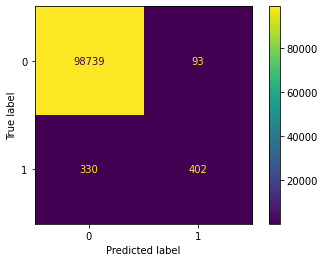

In [81]:
# Confusion matrix on test 
metrics.plot_confusion_matrix(
    catboost_model,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


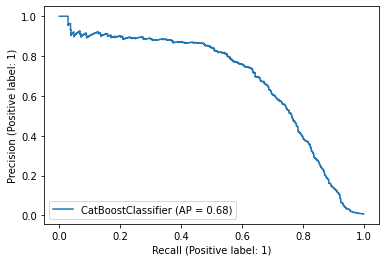

In [82]:
# Precision-Recall curve on test 
metrics.plot_precision_recall_curve(
    catboost_model,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


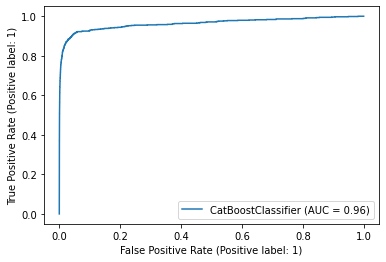

In [83]:
# ROC-AUC on test 
metrics.plot_roc_curve(
    catboost_model,
    X_test,
    y_test
)

In [84]:
# Metrics on test
print(metrics.classification_report(
    y_test,
    catboost_model.predict(X_test)
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98832
           1       0.81      0.55      0.66       732

    accuracy                           1.00     99564
   macro avg       0.90      0.77      0.83     99564
weighted avg       1.00      1.00      1.00     99564



In [90]:
# Saving catboost model
dump(
    catboost_model,
    '../models/catboost.joblib'
)

['../models/catboost.joblib']

## LightGBM

In [5]:
lgbm_model = LGBMClassifier(num_threads = 3)

In [71]:
# Grid search of the best hyperparameters
lgbm_grid = {
    'boosting': [
        'gbdt',
        'dart',
        'rf',
        'goss'
    ],
    'n_iter': range(100,1100,200),
    'eta': np.arange(0.05,0.25,0.05),
    
}

In [72]:
lgbm_gsearch = GridSearchCV(
    param_grid = lgbm_grid,
    estimator = lgbm_model,
    cv = 3,
    verbose = 1
)

In [73]:
# Model training
lgbm_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _

C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.15000000000000002 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=100, n_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=300, n_iter=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=500, n_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=700, n_iter=700 will be ignored. Current value: num_iterations=700
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.2 will be ignored. Current value: learning_rate=0.1


C:\Program Files\Python\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Program Files\Python\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] num_iterations is set=900, n_iter=900 will be ignored. Current value: num_iterations=900
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.05 will be ignored. Current value: learning_rate=0.1


GridSearchCV(cv=3, estimator=LGBMClassifier(num_threads=3),
             param_grid={'boosting': ['gbdt', 'dart', 'rf', 'goss'],
                         'eta': array([0.05, 0.1 , 0.15, 0.2 ]),
                         'n_iter': range(100, 1100, 200)},
             verbose=1)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


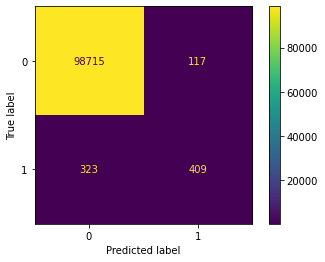

In [74]:
# Confusion matrix on test 
metrics.plot_confusion_matrix(
    lgbm_gsearch,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


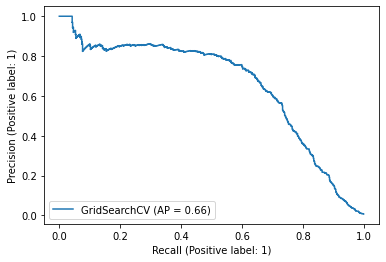

In [75]:
# Precision-Recall curve on test 
metrics.plot_precision_recall_curve(
    lgbm_gsearch,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


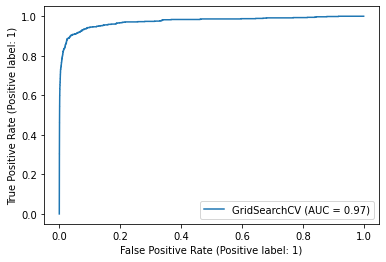

In [76]:
# ROC-AUC on test 
metrics.plot_roc_curve(
    lgbm_gsearch,
    X_test,
    y_test
)

In [77]:
# Metrics on test
print(metrics.classification_report(
    y_test,
    lgbm_gsearch.predict(X_test)
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98832
           1       0.78      0.56      0.65       732

    accuracy                           1.00     99564
   macro avg       0.89      0.78      0.82     99564
weighted avg       1.00      1.00      1.00     99564



In [78]:
# Saving best model
dump(
    lgbm_gsearch.best_estimator_,
    '../models/lgbm.joblib'
)

['../models/lgbm.joblib']